# Explore the data extracted from the videos

In [1]:
import cv2
import tensorflow as tf
import numpy as np
import os
import analyse
import matplotlib.pyplot as plt
import math
import analyse
import utils
import json
import common

from common import preprocess, estimate_pose, draw_humans
from networks import get_network
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/puyihao/anaconda/envs/openpose/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### set parameters

In [2]:
# # set parameters
# stage_level = 6
# input_height = 368
# input_width = 368
# model = 'cmu'
# input_node = tf.placeholder(tf.float32, shape=(1, input_height, input_width, 3), name='image')
# sess = tf.Session()
# net, _, last_layer = get_network(model, input_node, sess)

### set paths

In [3]:
# set base paths
video_base = './video'
result_base = './result'
result_dirs = os.listdir(result_base)
result_dirs.remove('.DS_Store')

### get json data

In [4]:
# get json files to result_json
result_json = {}
for result_dir in result_dirs:
    json_path = os.path.join(result_base, '{}/json'.format(result_dir))
    json_file = os.listdir(json_path)[0]
    with open(os.path.join(json_path, json_file),'r') as json_file:
        json_data = json.load(json_file)
        for human_id,data in json_data.items():
            avg_vertical_leg = utils.get_average(data['theta_vertical_8_9'], data['theta_vertical_11_12'])
            avg_leg = utils.get_average(data['theta_1_8_9'], data['theta_1_11_12'])
            avg_knee = utils.get_average(data['theta_8_9_10'], data['theta_11_12_13'])
            avg = utils.get_average(utils.get_average(avg_vertical_leg, avg_leg), avg_knee)
            json_data[human_id]['avg_vertical_leg'] = avg_vertical_leg
            json_data[human_id]['avg_leg'] = avg_leg
            json_data[human_id]['avg_knee'] = avg_knee
            json_data[human_id]['avg'] = avg
        result_json[result_dir] = json_data

### Display graphs

#### set parameters

In [5]:
oriented = [
#             'theta_1_8_9', 
#             'theta_vertical_8_9', 
#             'theta_1_11_12', 
#             'theta_vertical_11_12', 
#             'theta_8_9_10', 
#             'theta_11_12_13',
            'theta_8_1_11',
#             'avg_vertical_leg',
#             'avg_leg',
#             'avg_knee',
            'avg',
]

#### draw figures of example_3

IMG_*

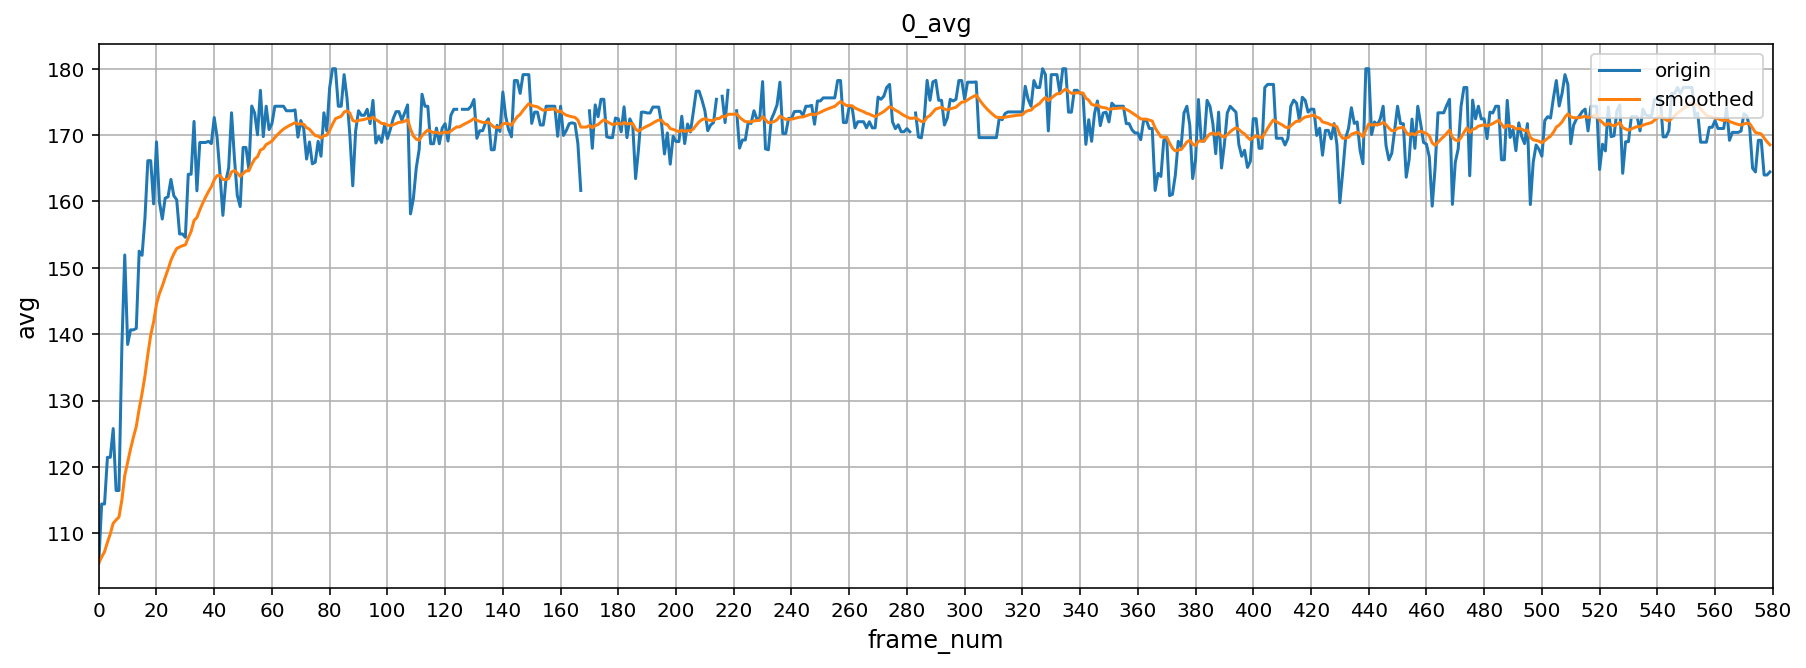

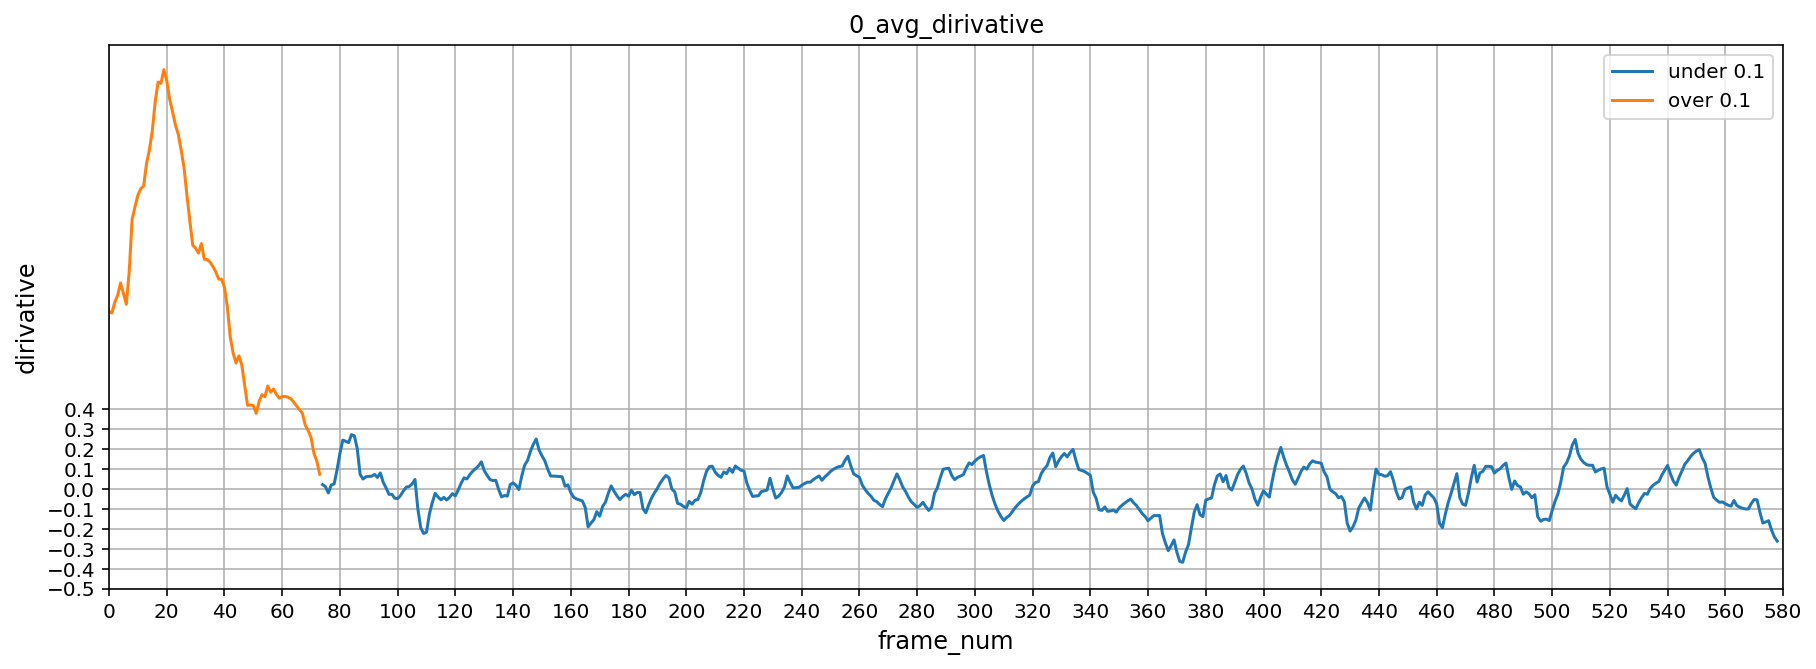

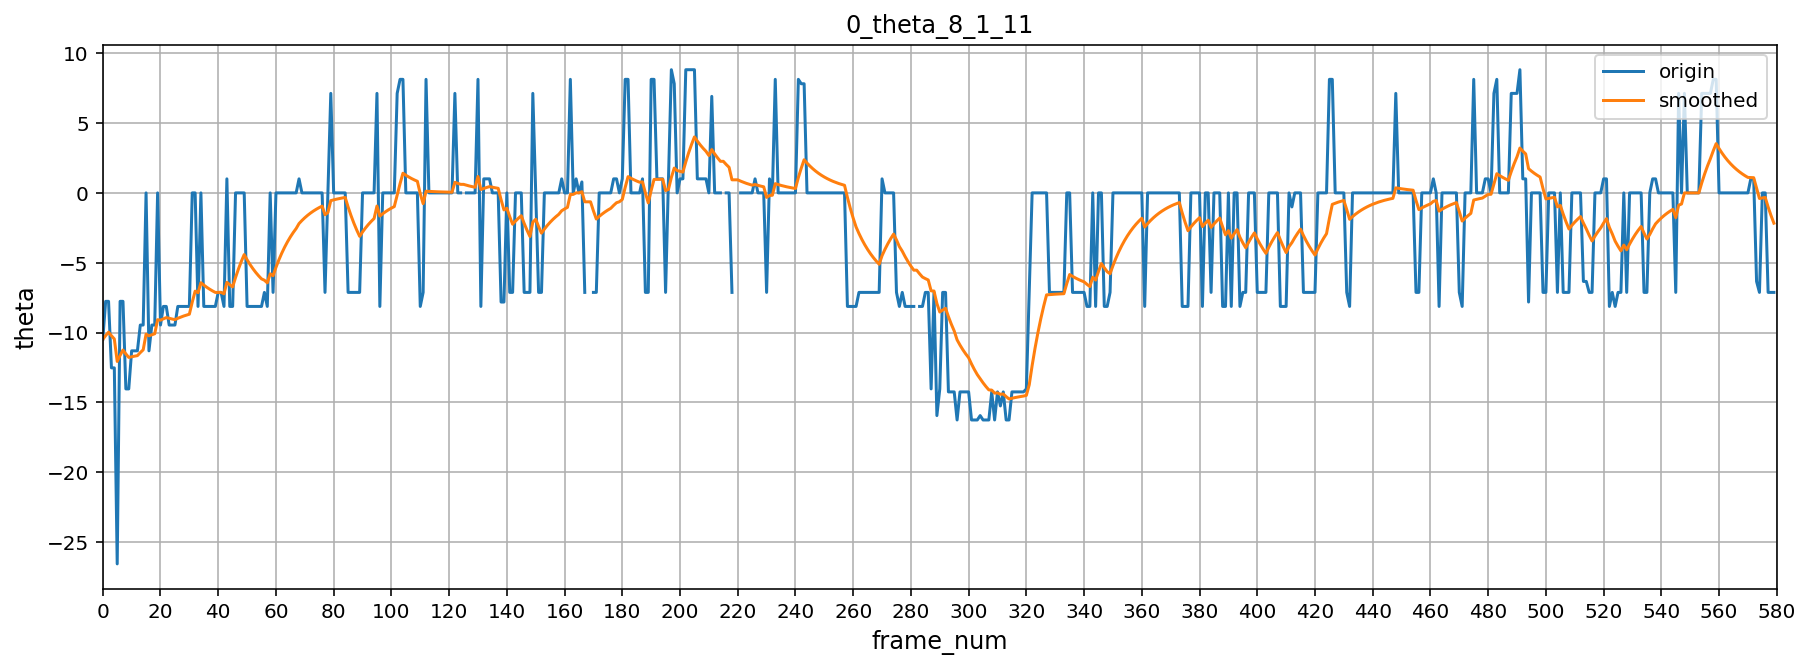

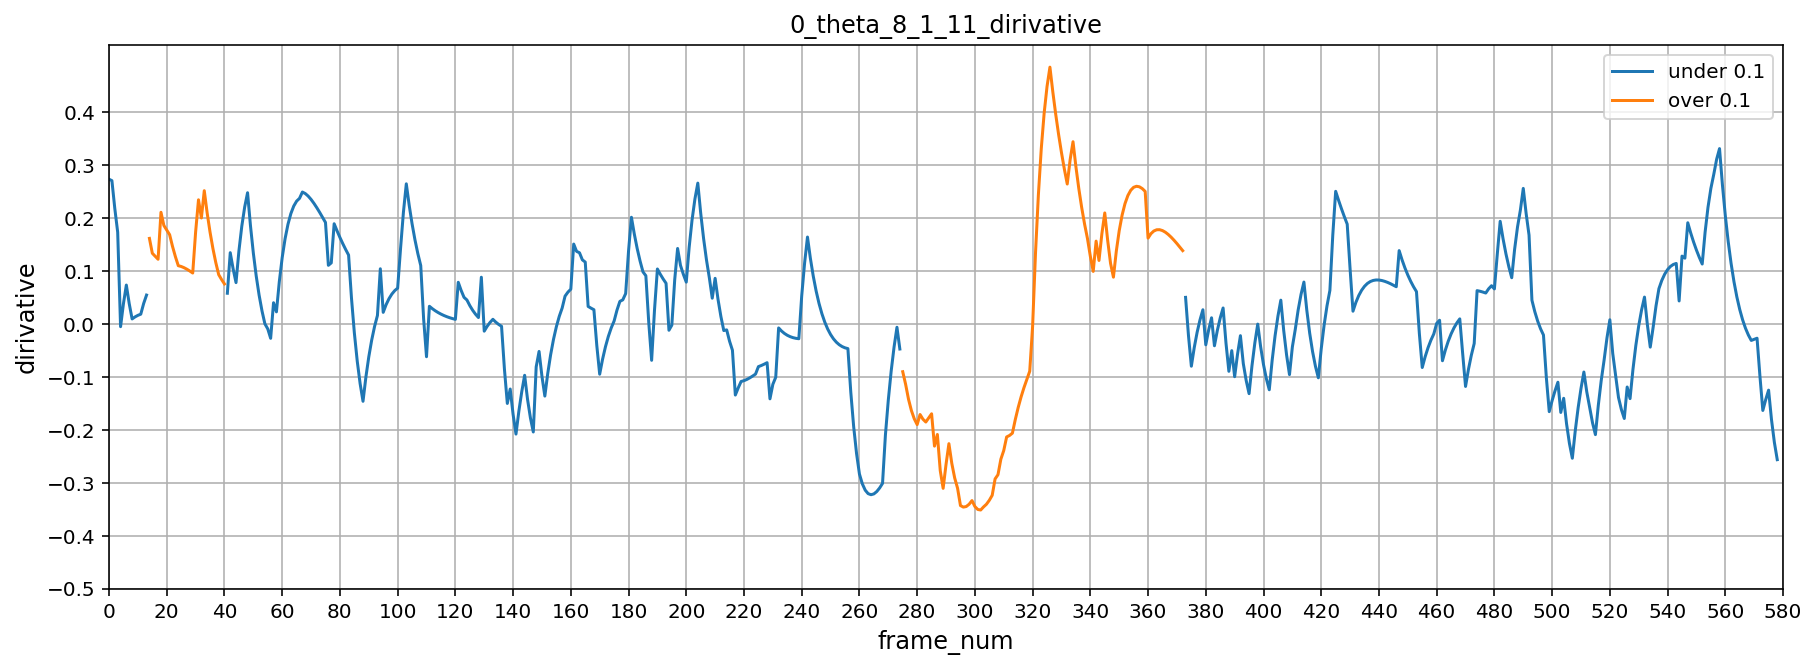

In [6]:
video_name = "IMG_4175"
key = '{}_result'.format(video_name)
utils.draw_curves(video_name, result_json[key], oriented=oriented, smooth_rate=0.1, threshold = 0.07)

example_3

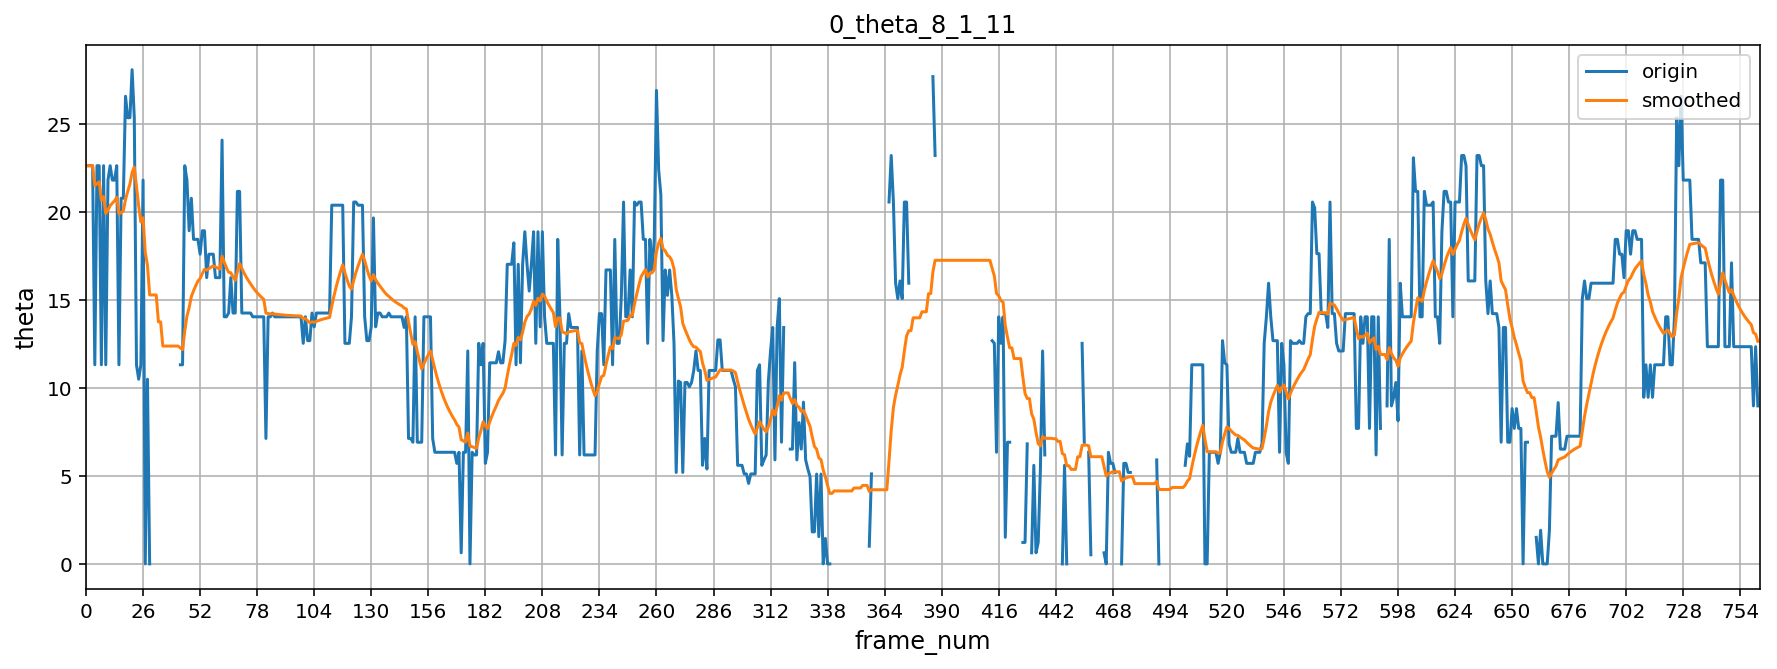

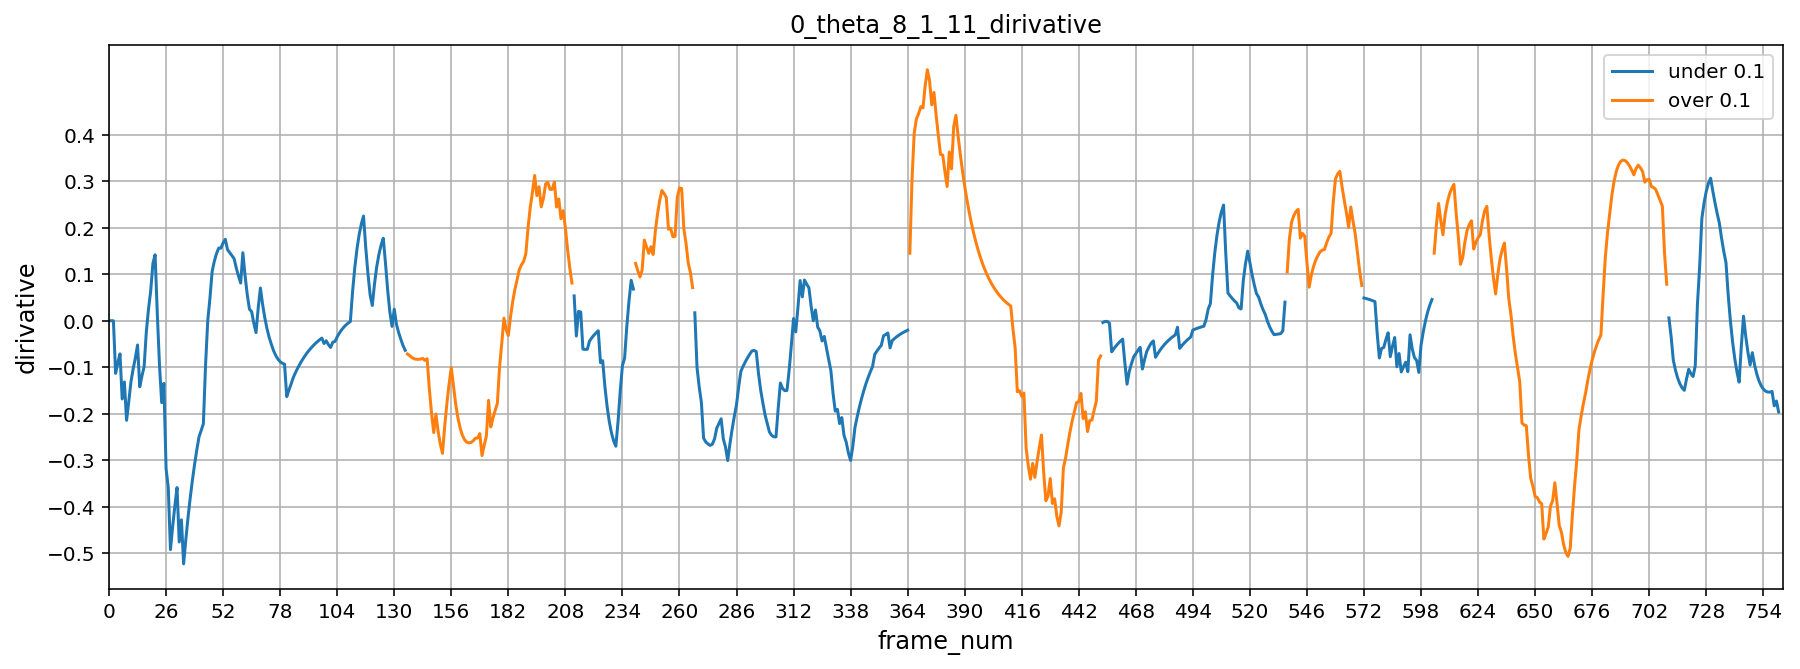

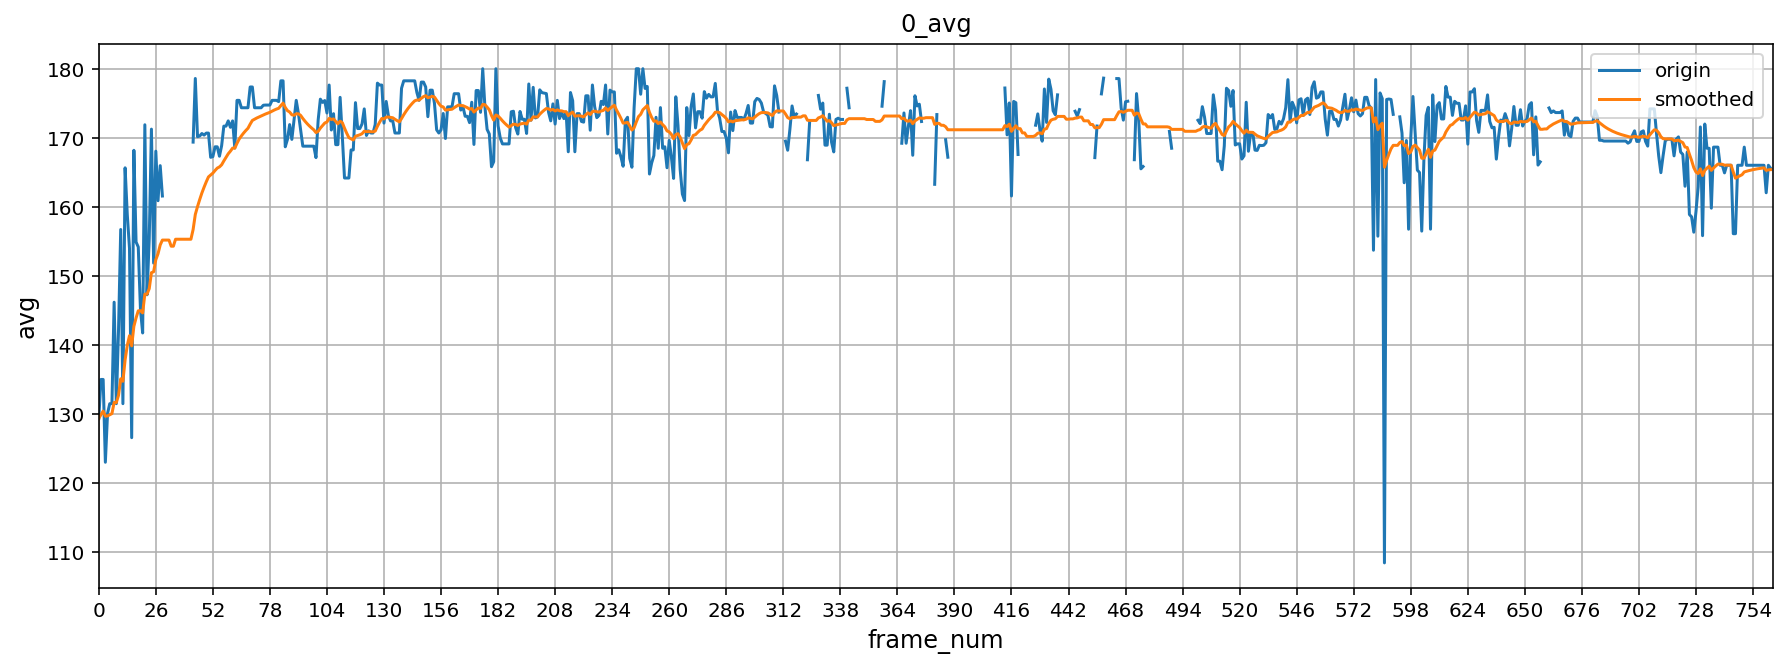

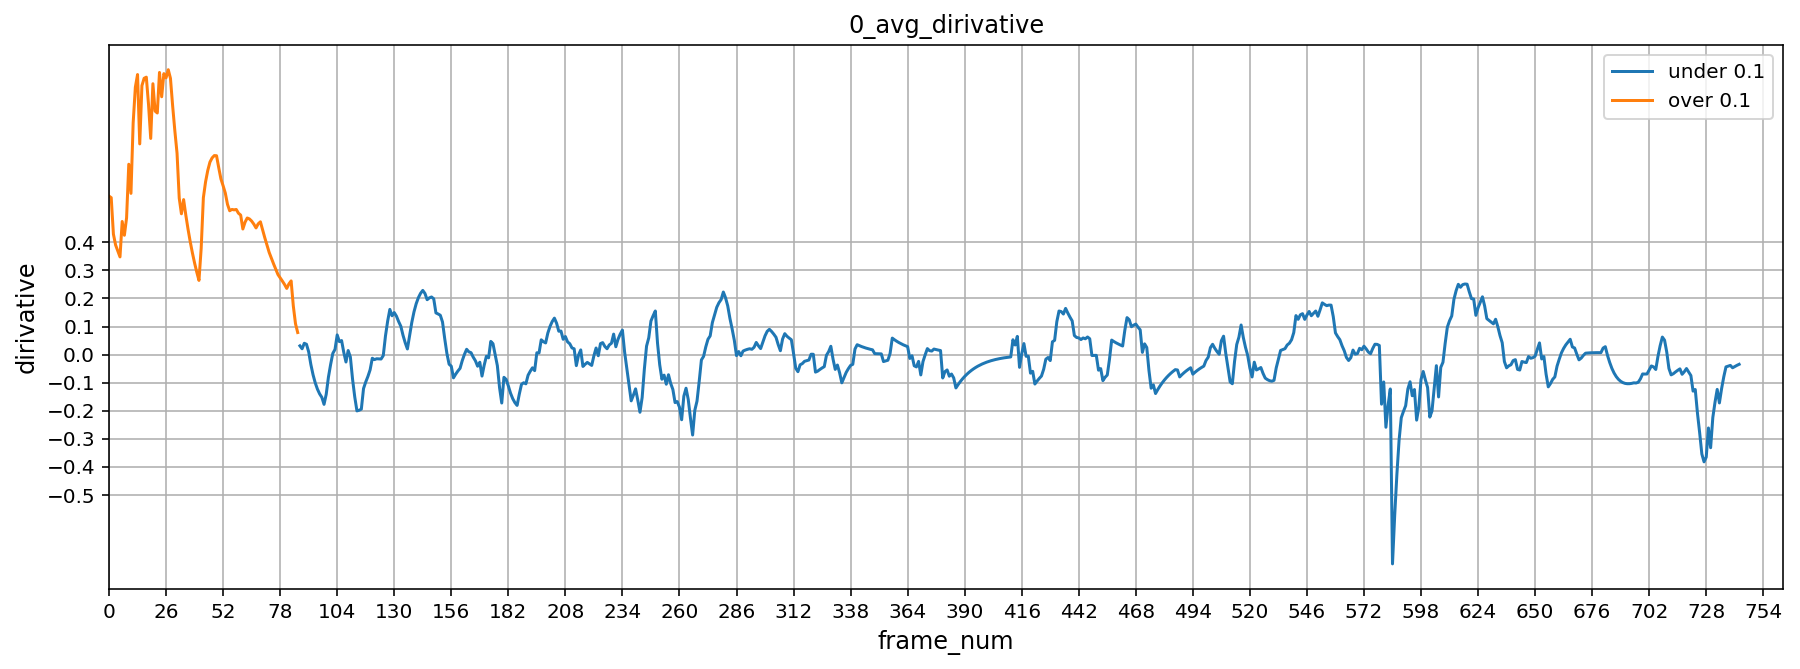

In [7]:
video_name = "example_3"
key = '{}_result'.format(video_name)
utils.draw_curves(video_name, result_json[key], oriented=oriented, smooth_rate=0.1, threshold = 0.07)

example_1

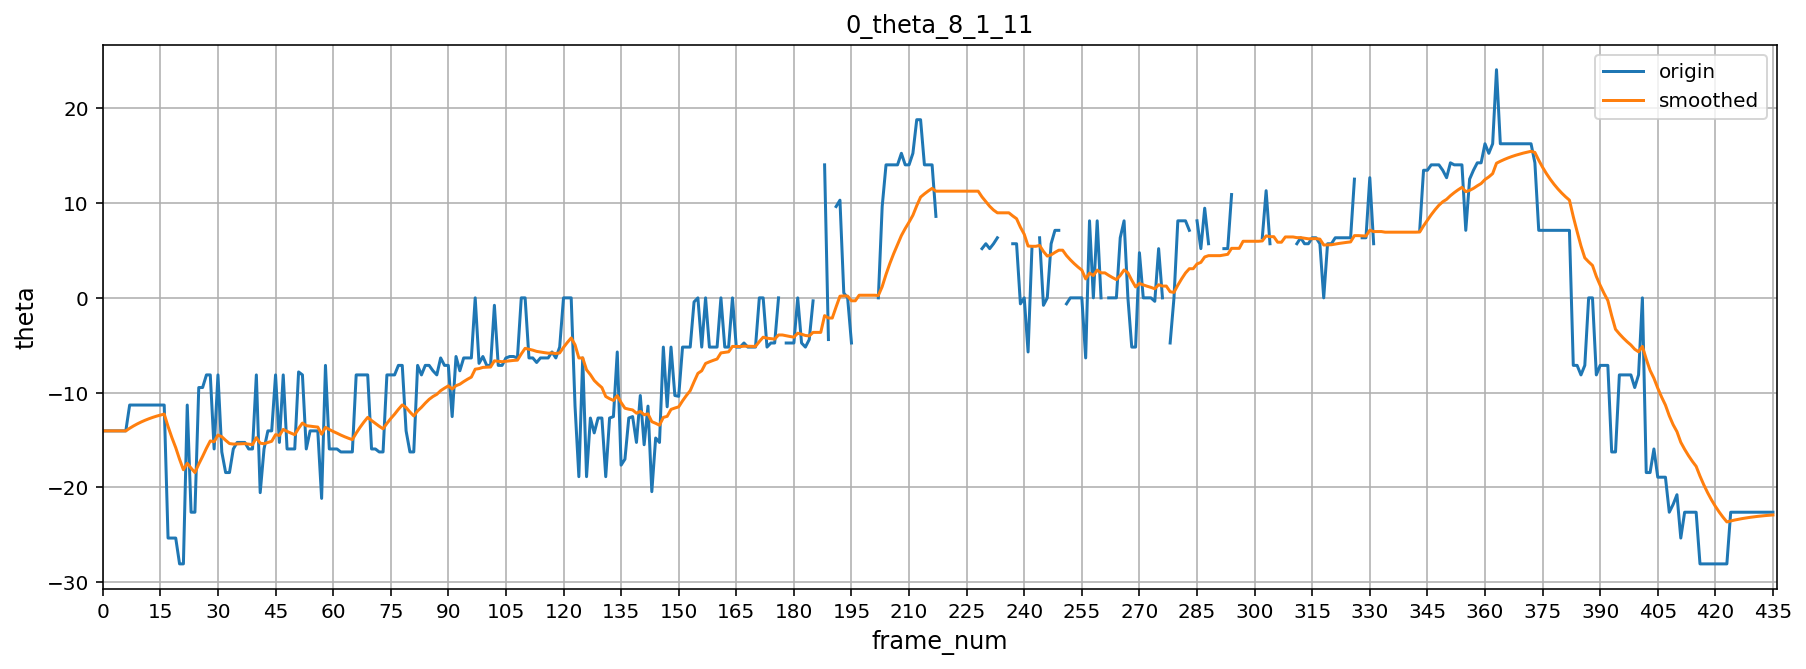

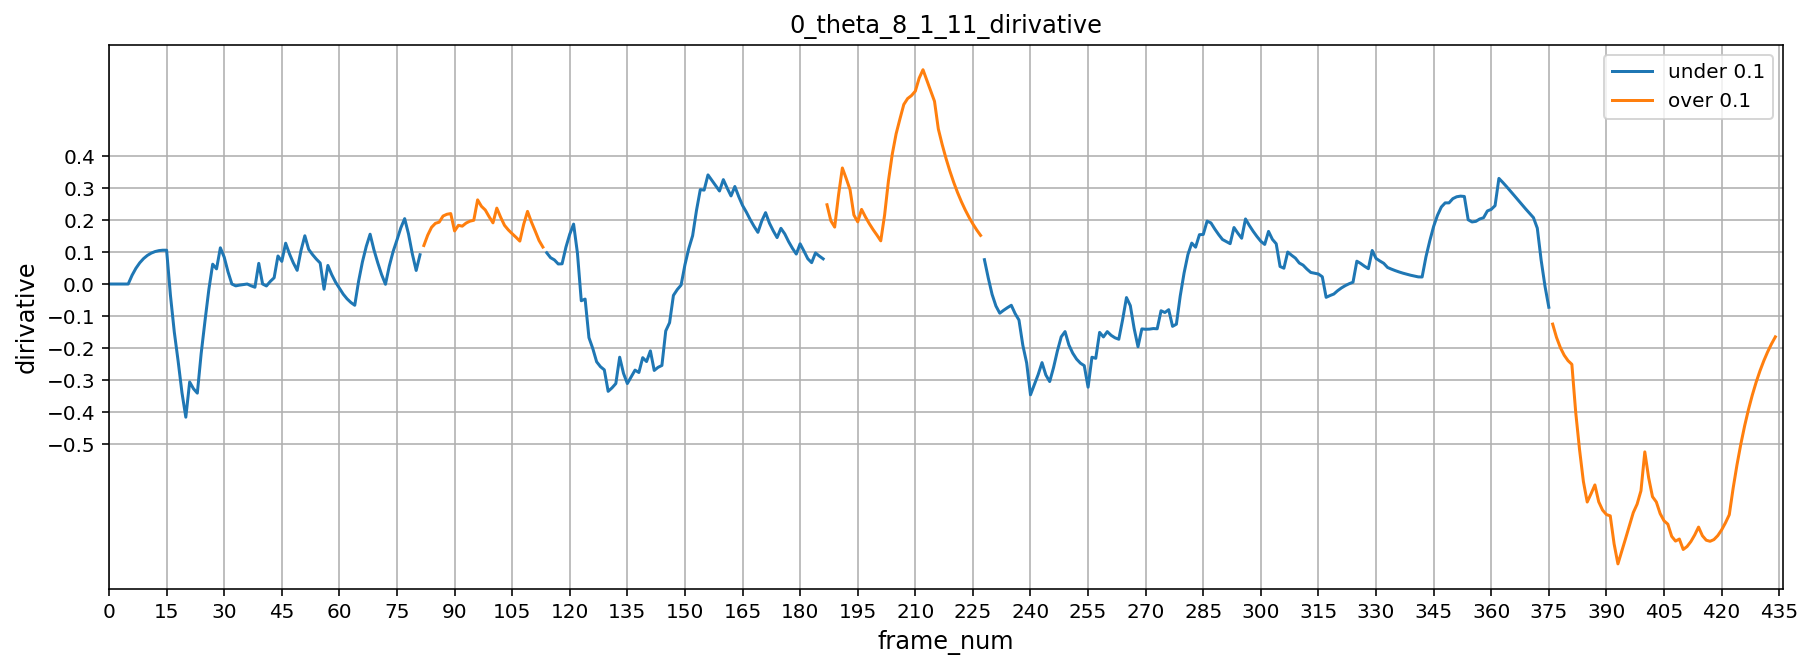

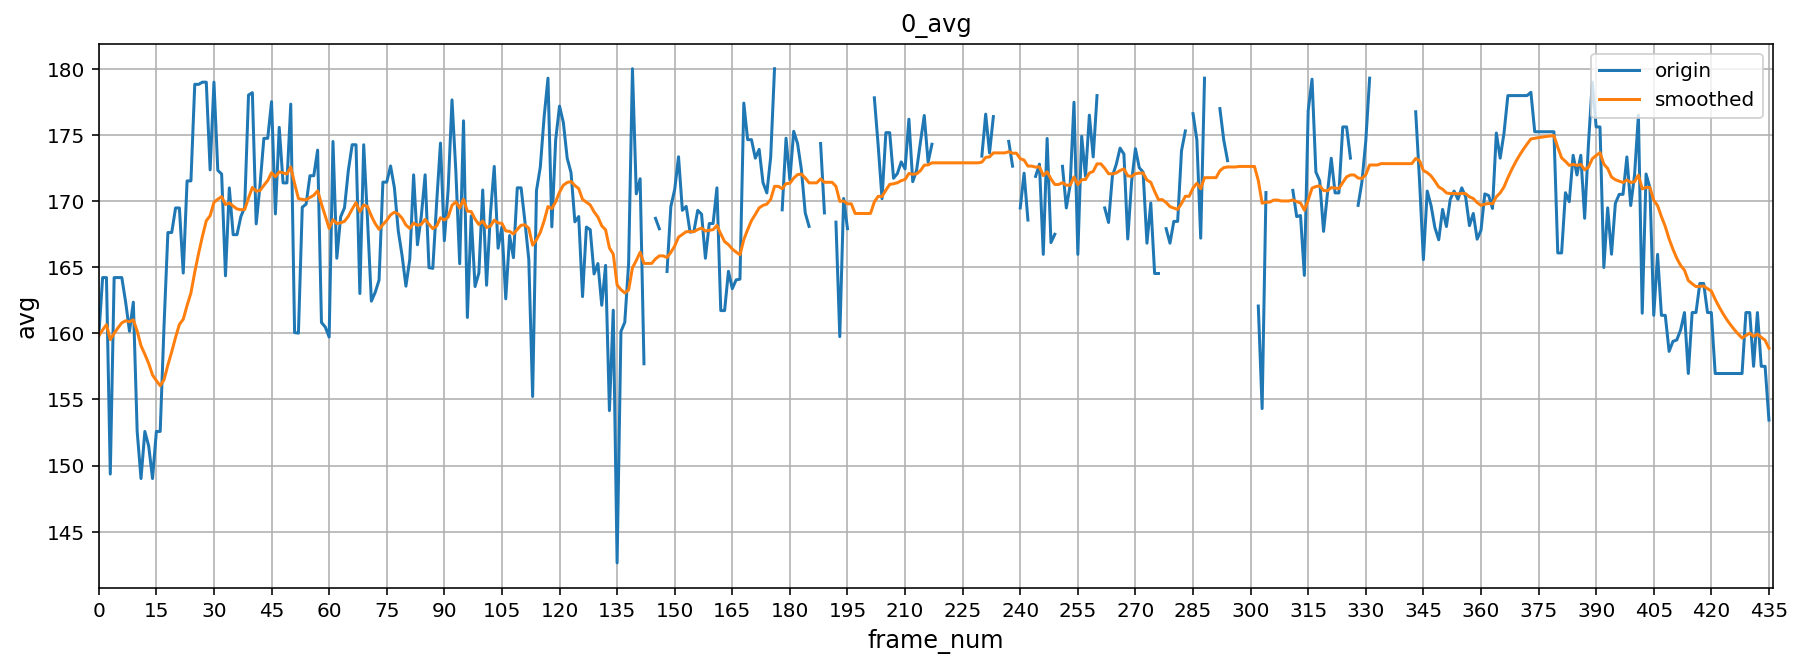

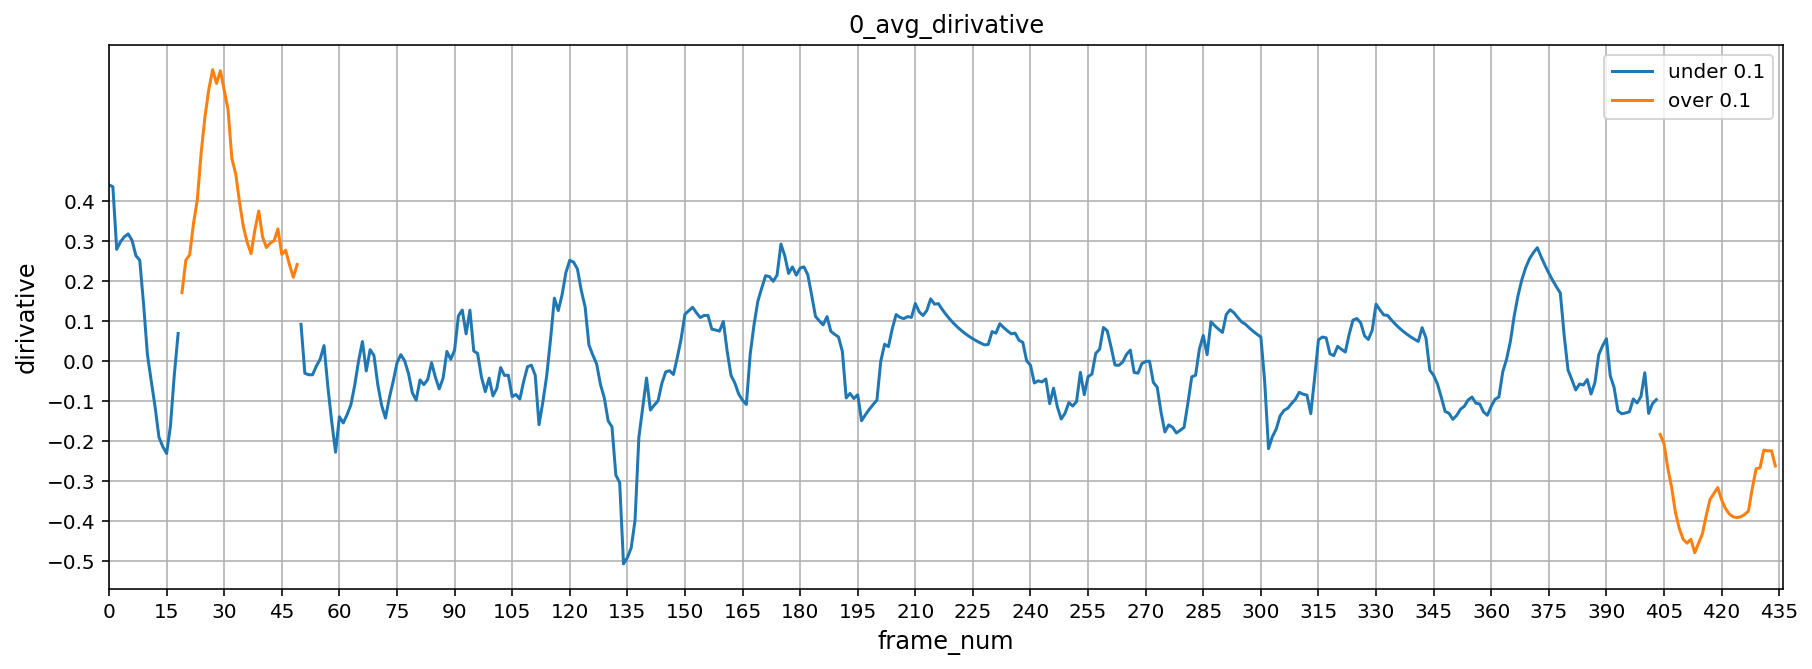

In [6]:
video_name = "example_1"
key = '{}_result'.format(video_name)
utils.draw_curves(video_name, result_json[key], oriented=oriented, smooth_rate=0.1, threshold = 0.1)

#### draw figures of multi-aciton

sit&stand&walk_1

In [13]:
video_name = "sit&stand&walk_1"
key = '{}_result'.format(video_name)
utils.draw_curves(video_name, result_json[key], oriented=oriented, smooth_rate=0.1, threshold = 0.1)

KeyError: 'sit&stand&walk_1_result'

turnback&sit_1

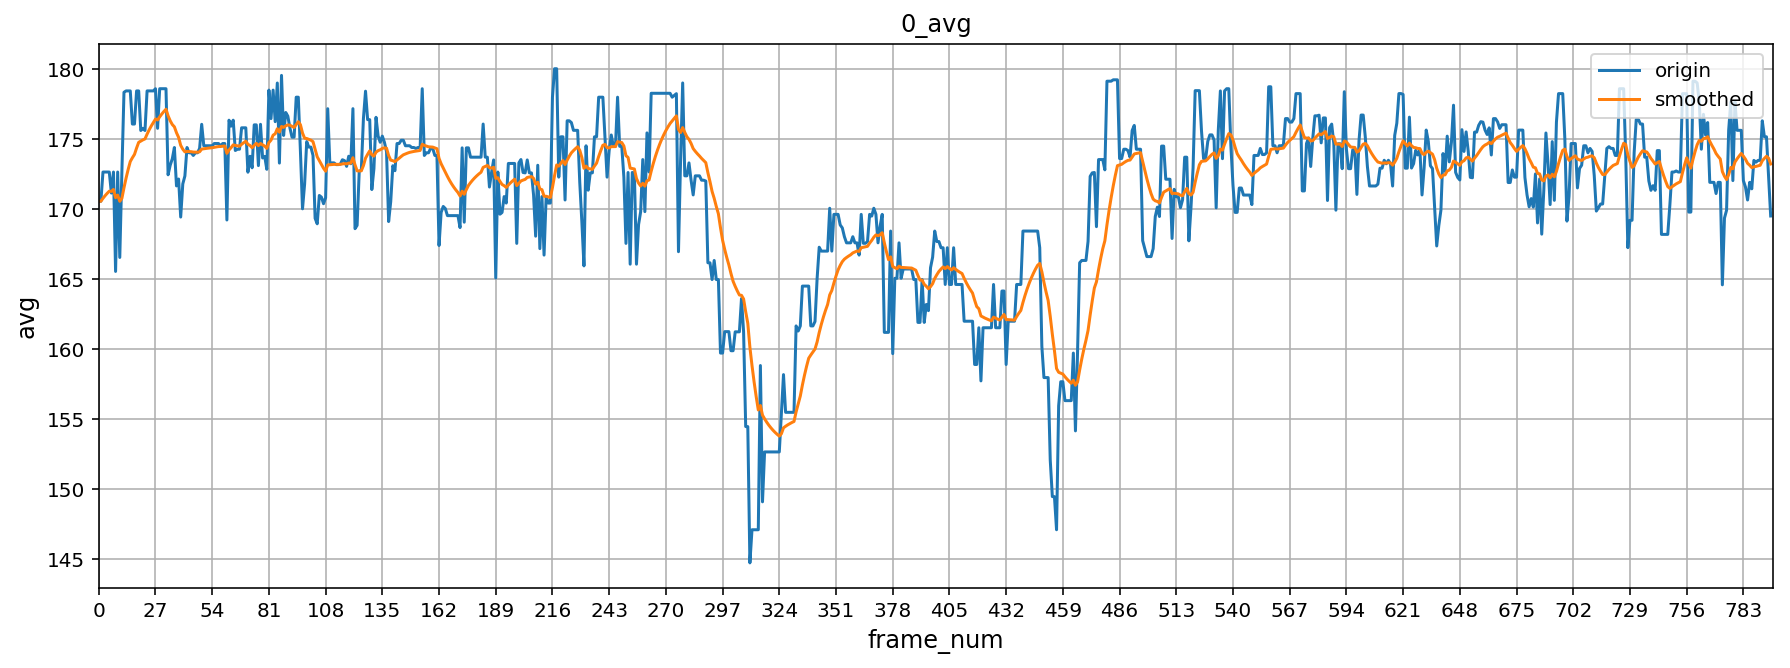

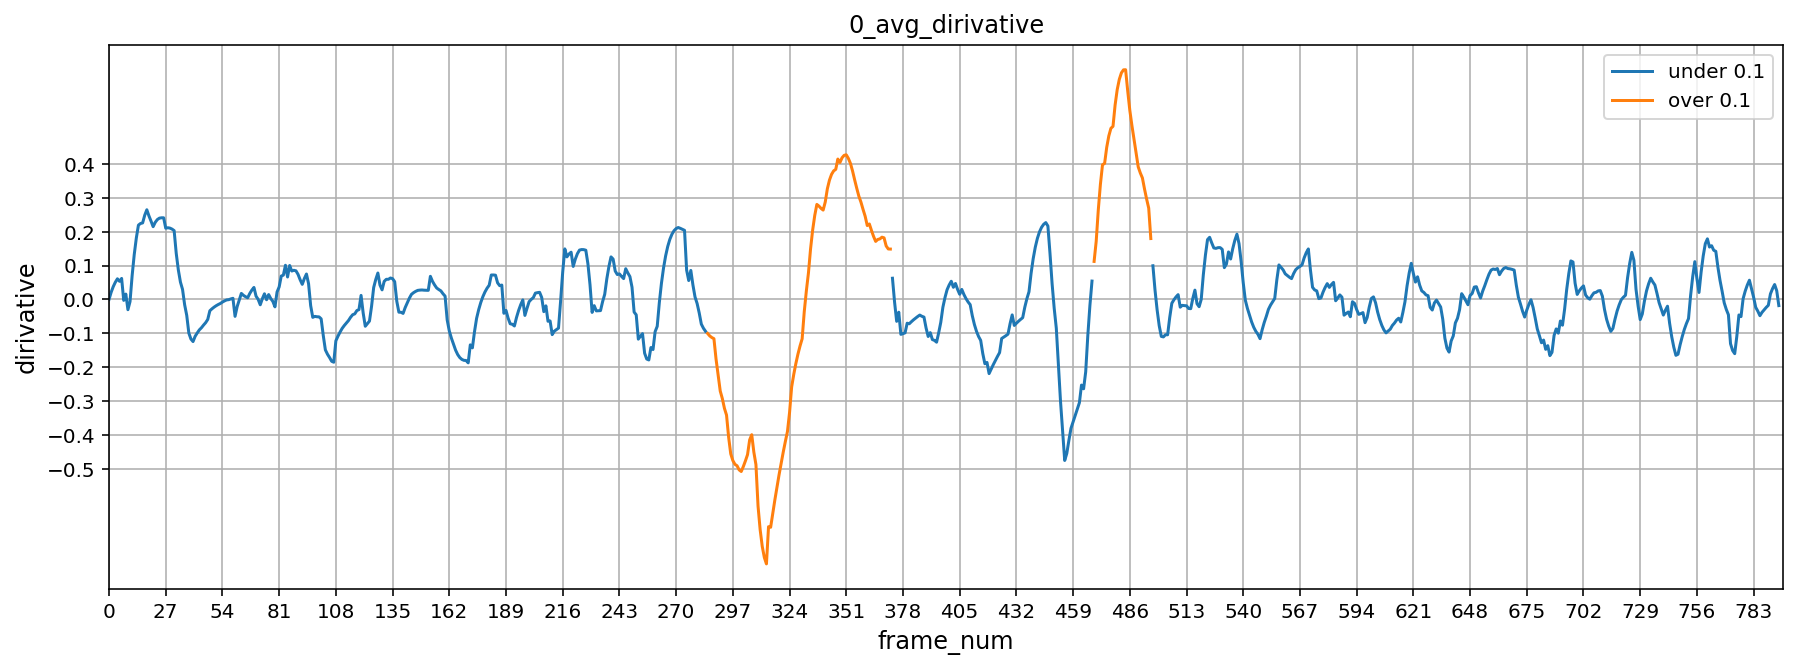

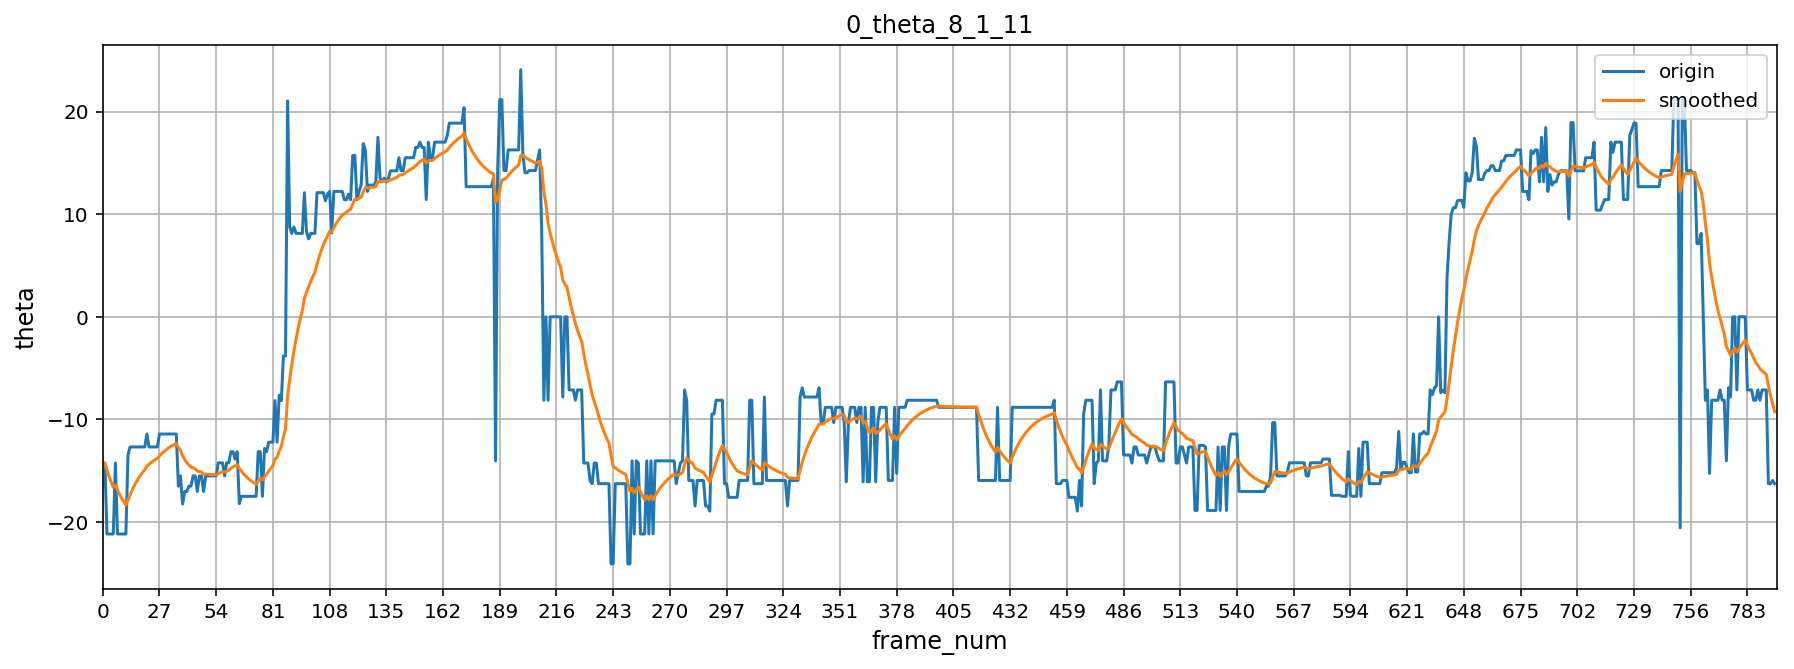

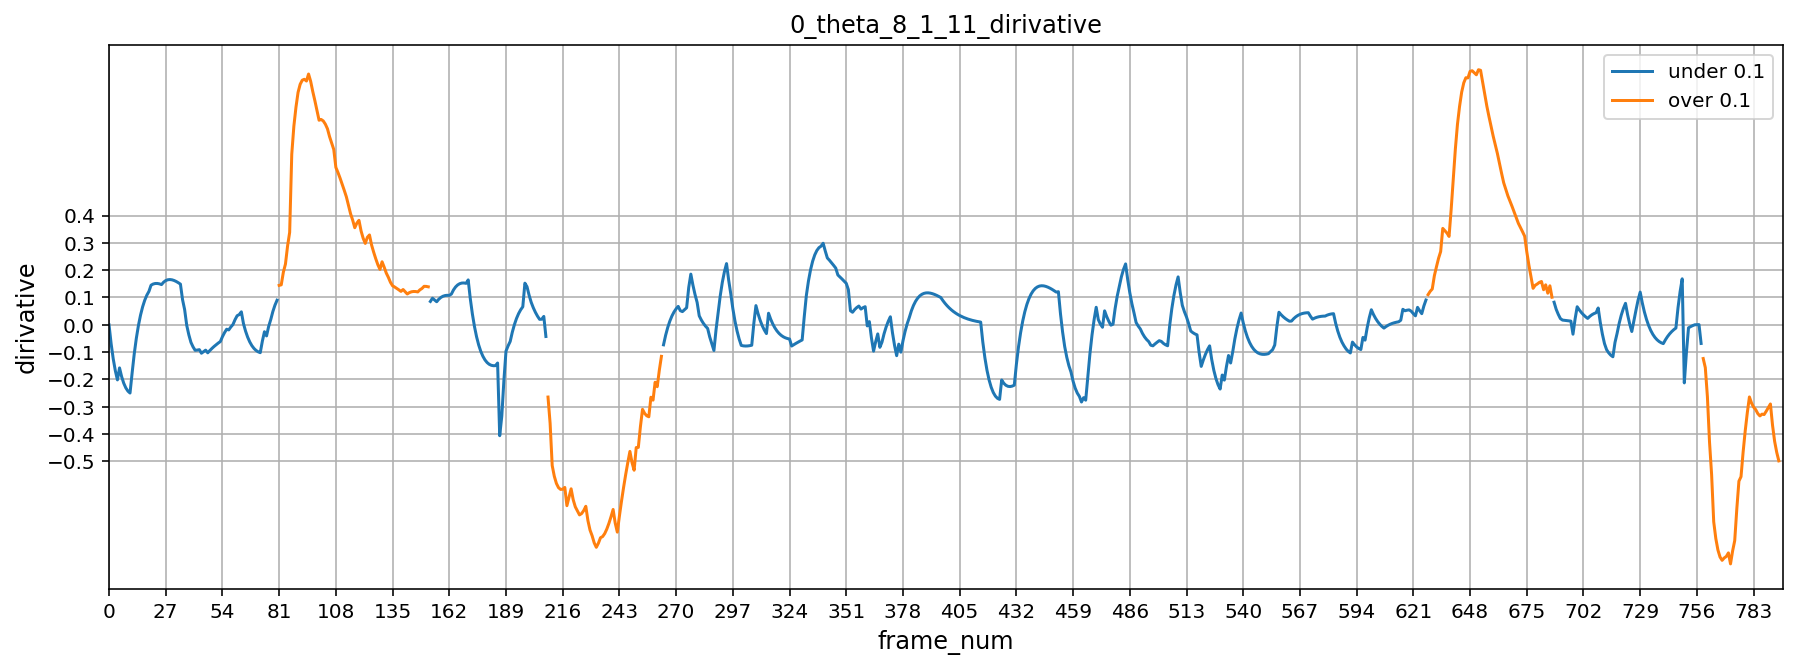

In [35]:
video_name = "turnback&sit_1"
key = '{}_result'.format(video_name)
utils.draw_curves(video_name, result_json[key], oriented=oriented, smooth_rate=0.1, threshold = 0.1)

#### draw figures of turnback

turnback_1

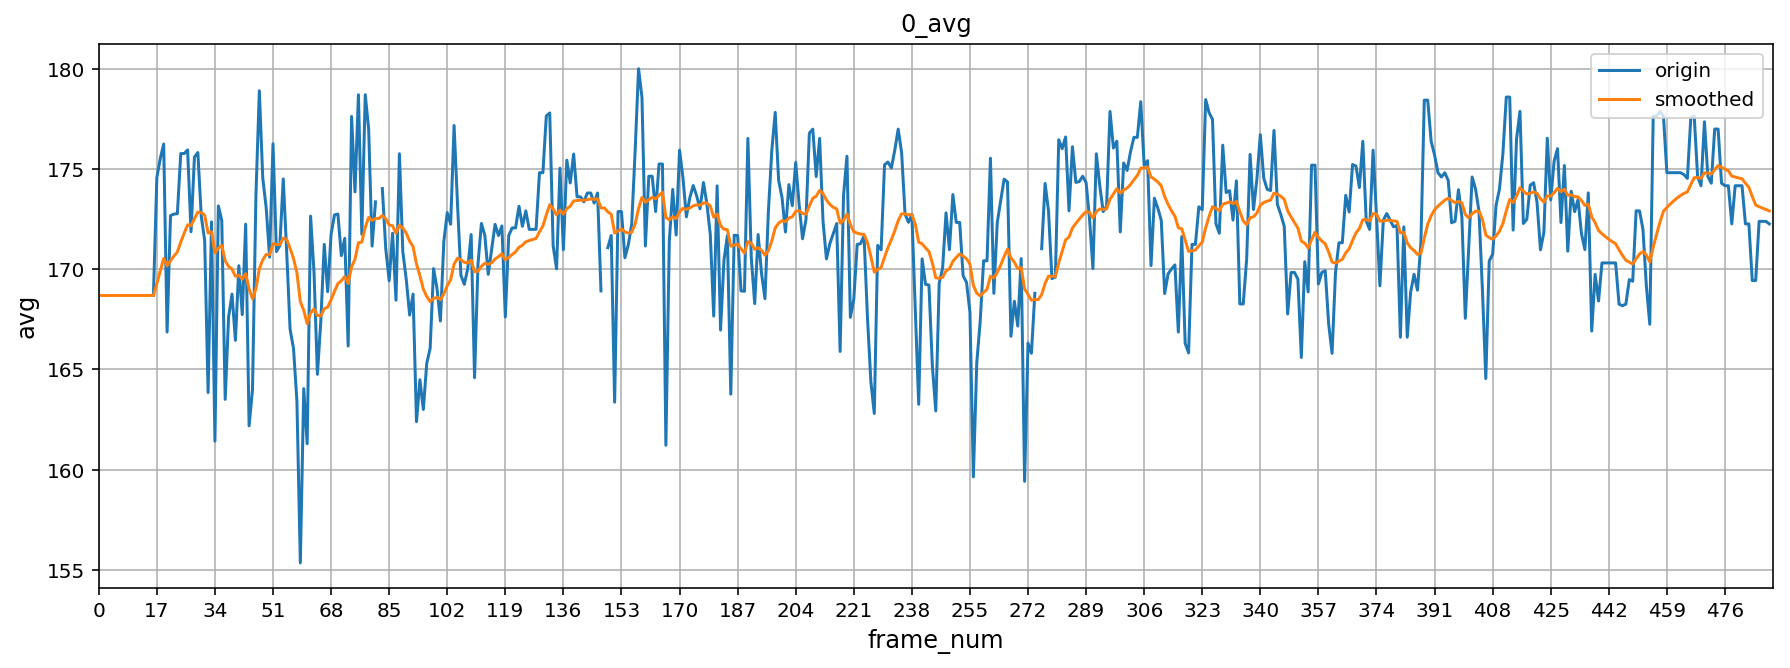

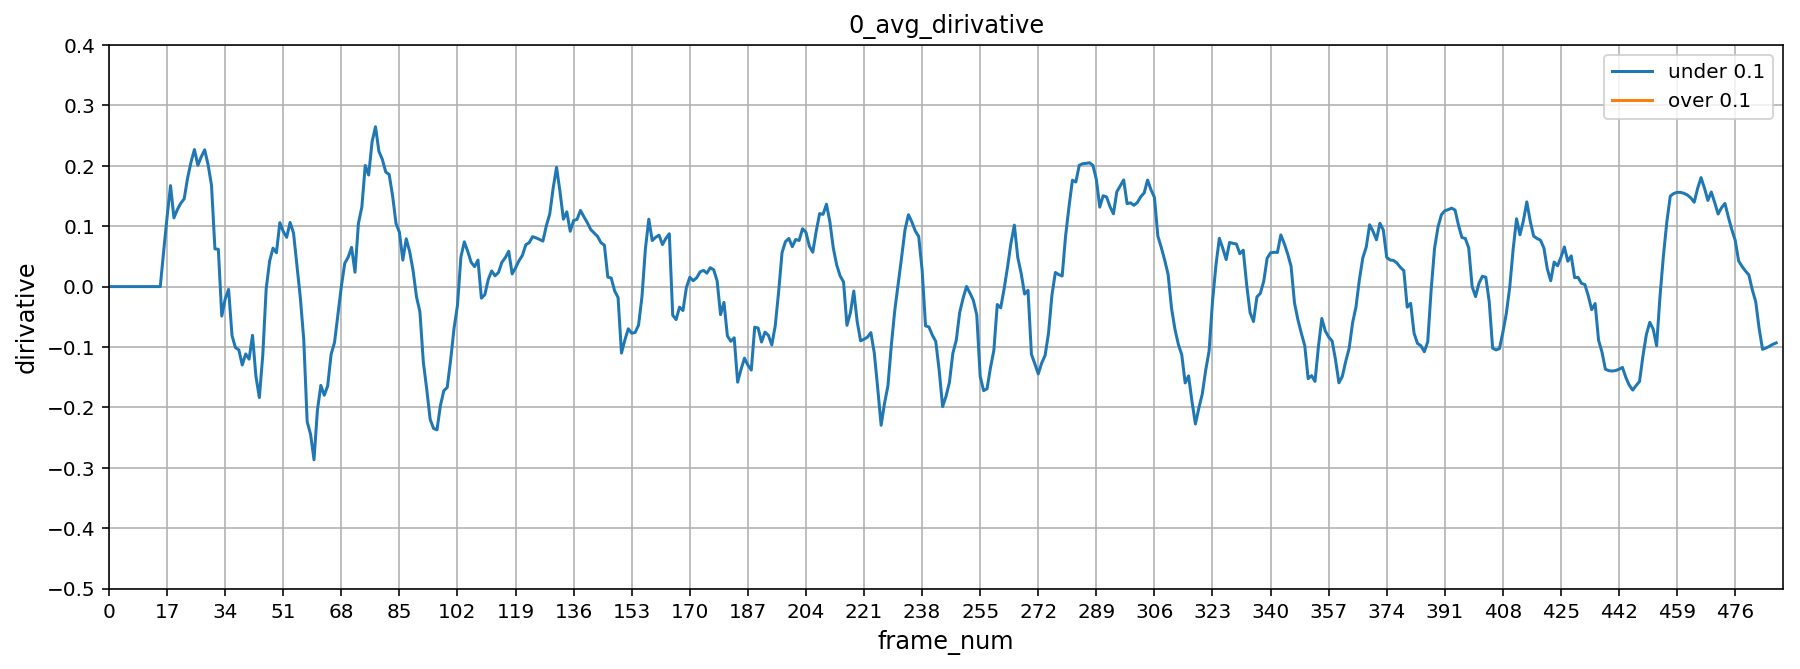

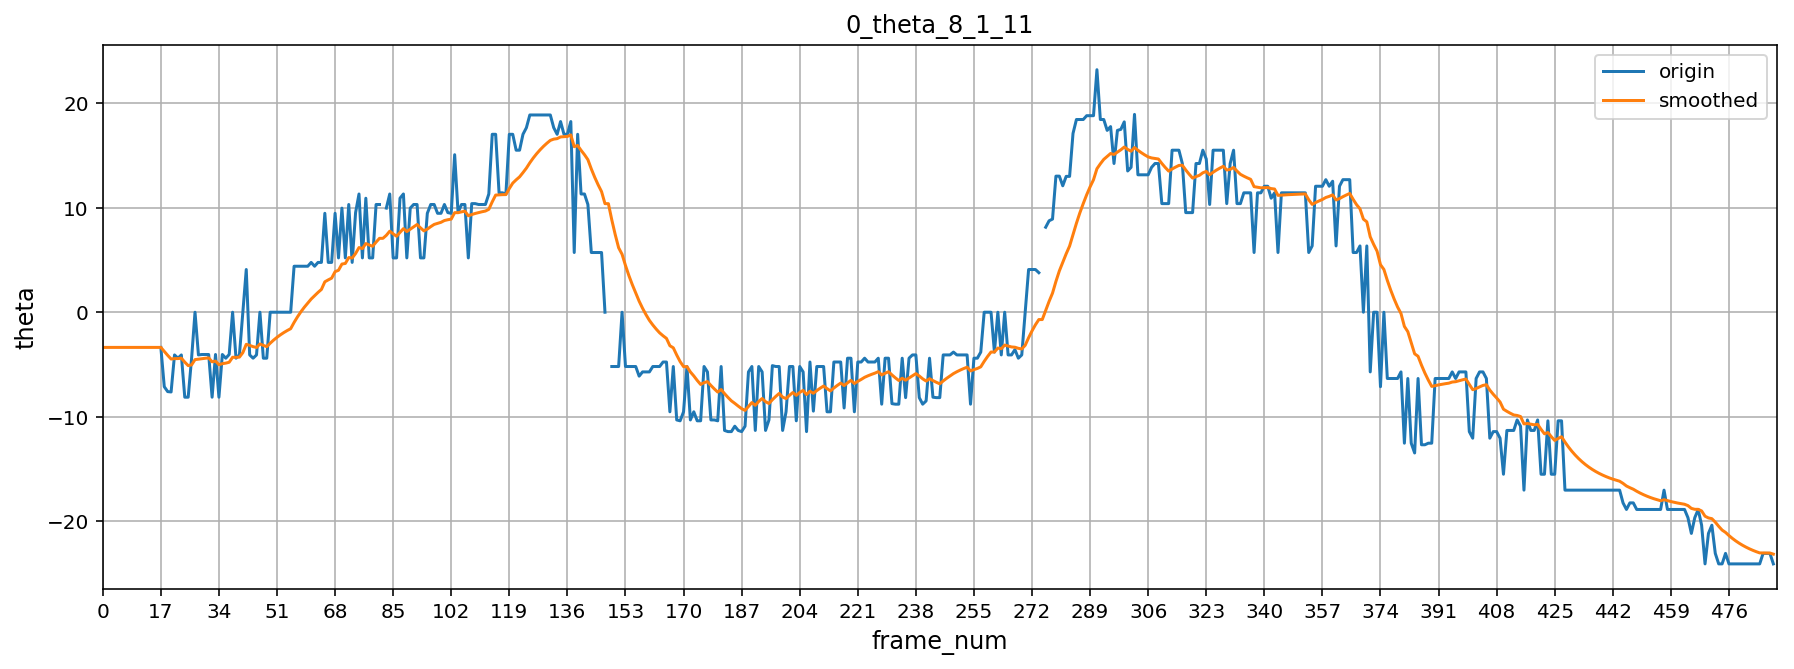

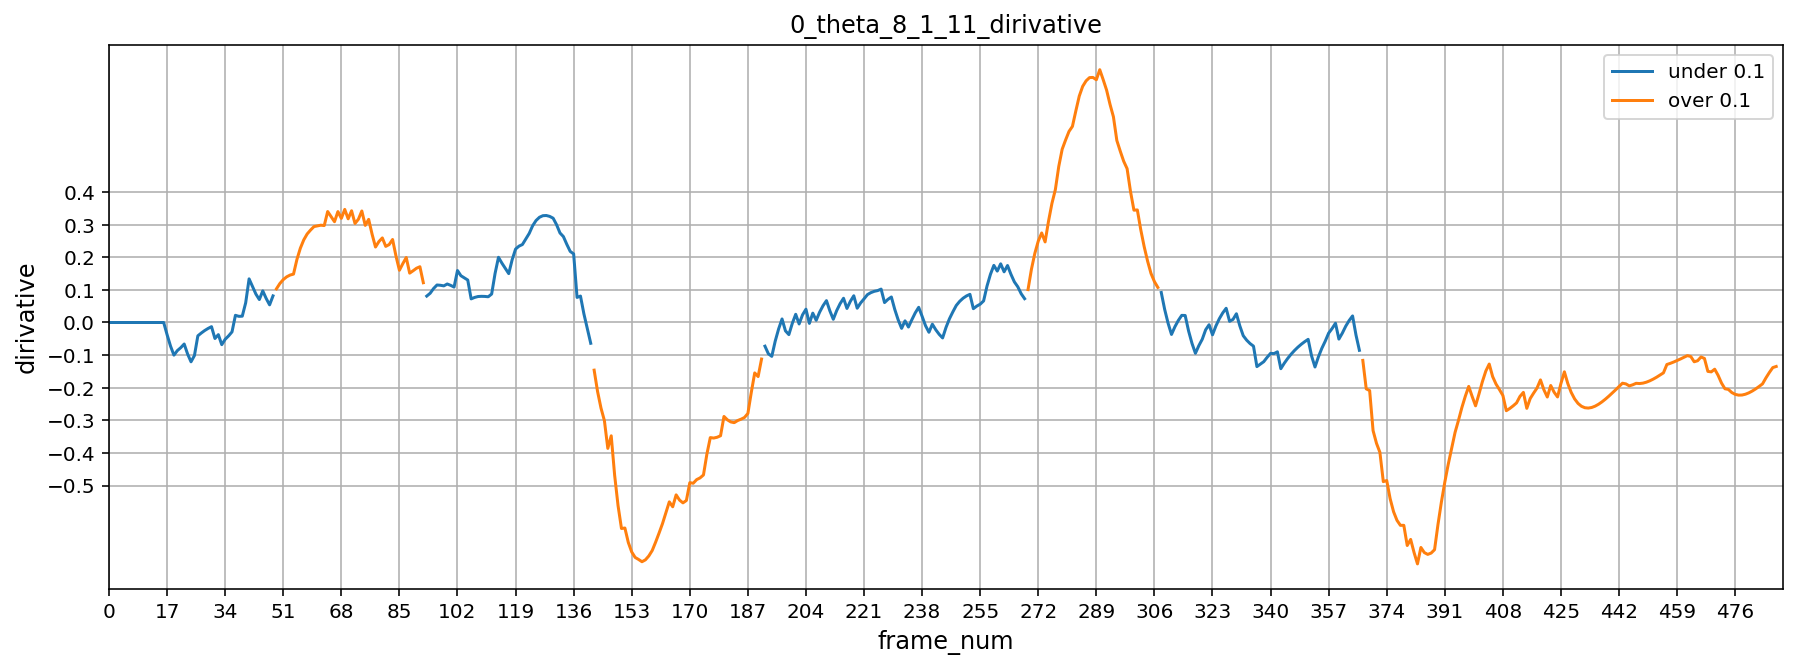

In [36]:
video_name = "turnback_1"
key = '{}_result'.format(video_name)
utils.draw_curves(video_name, result_json[key], oriented=oriented, smooth_rate=0.1, threshold = 0.1)

turnback_2

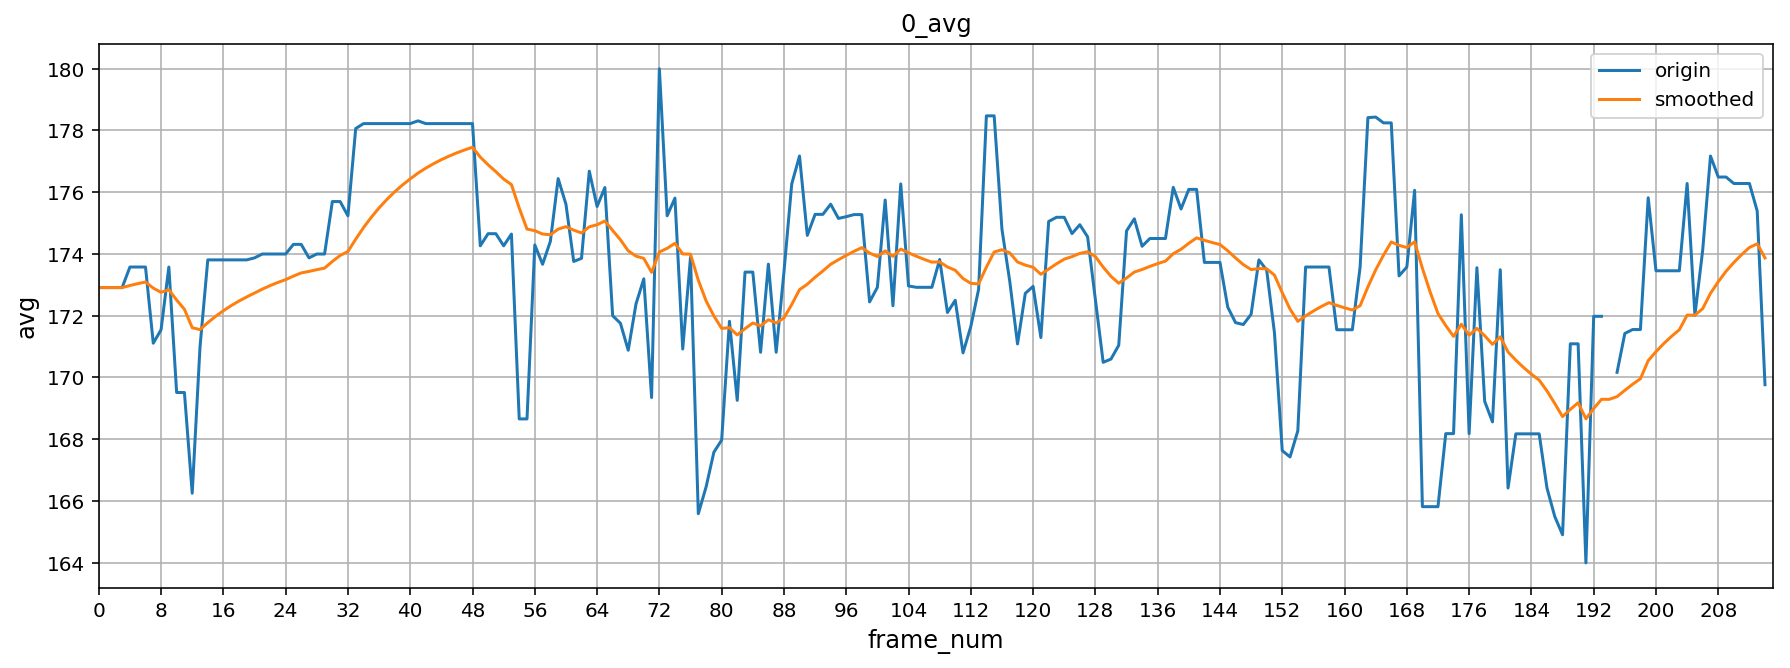

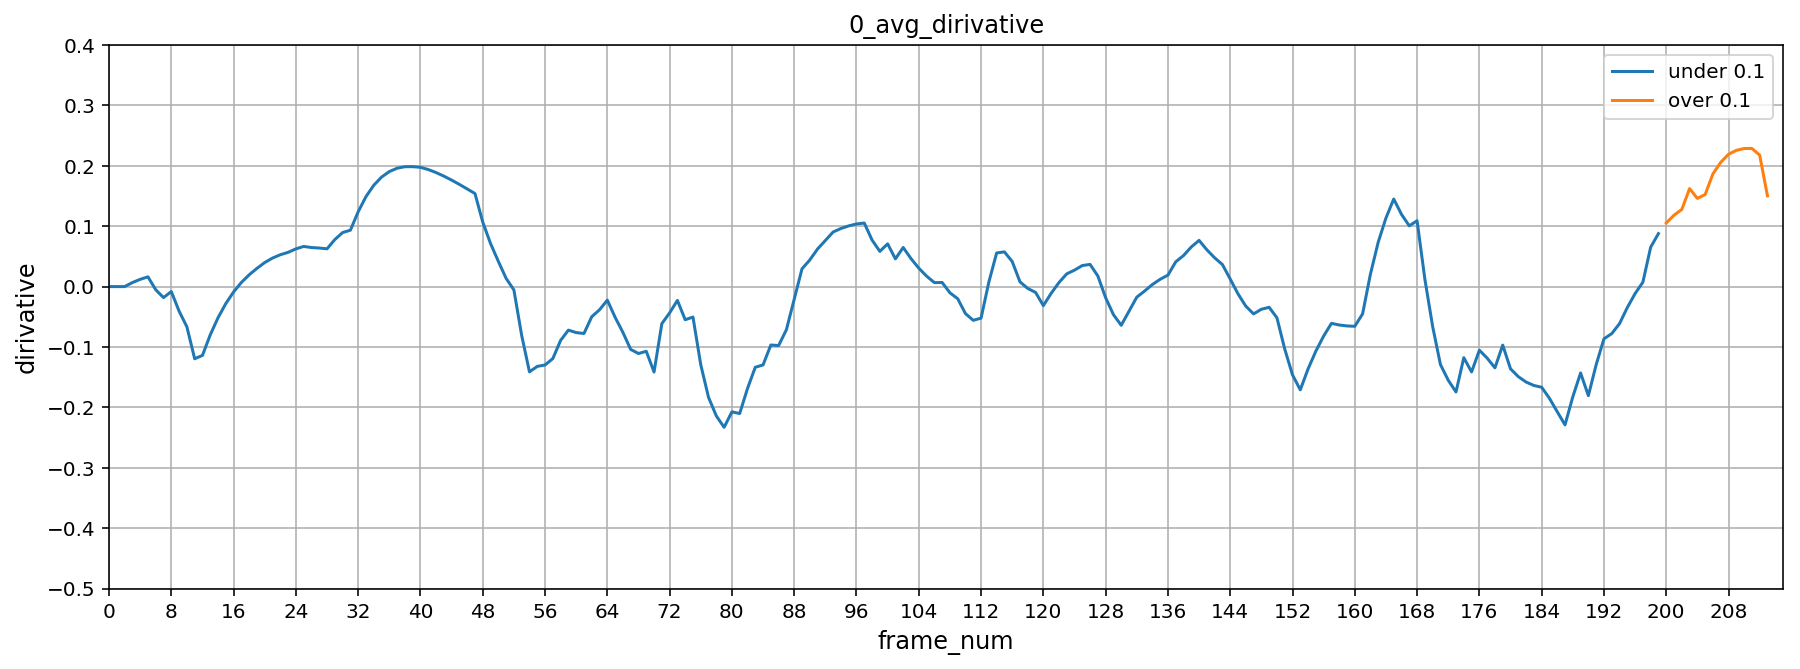

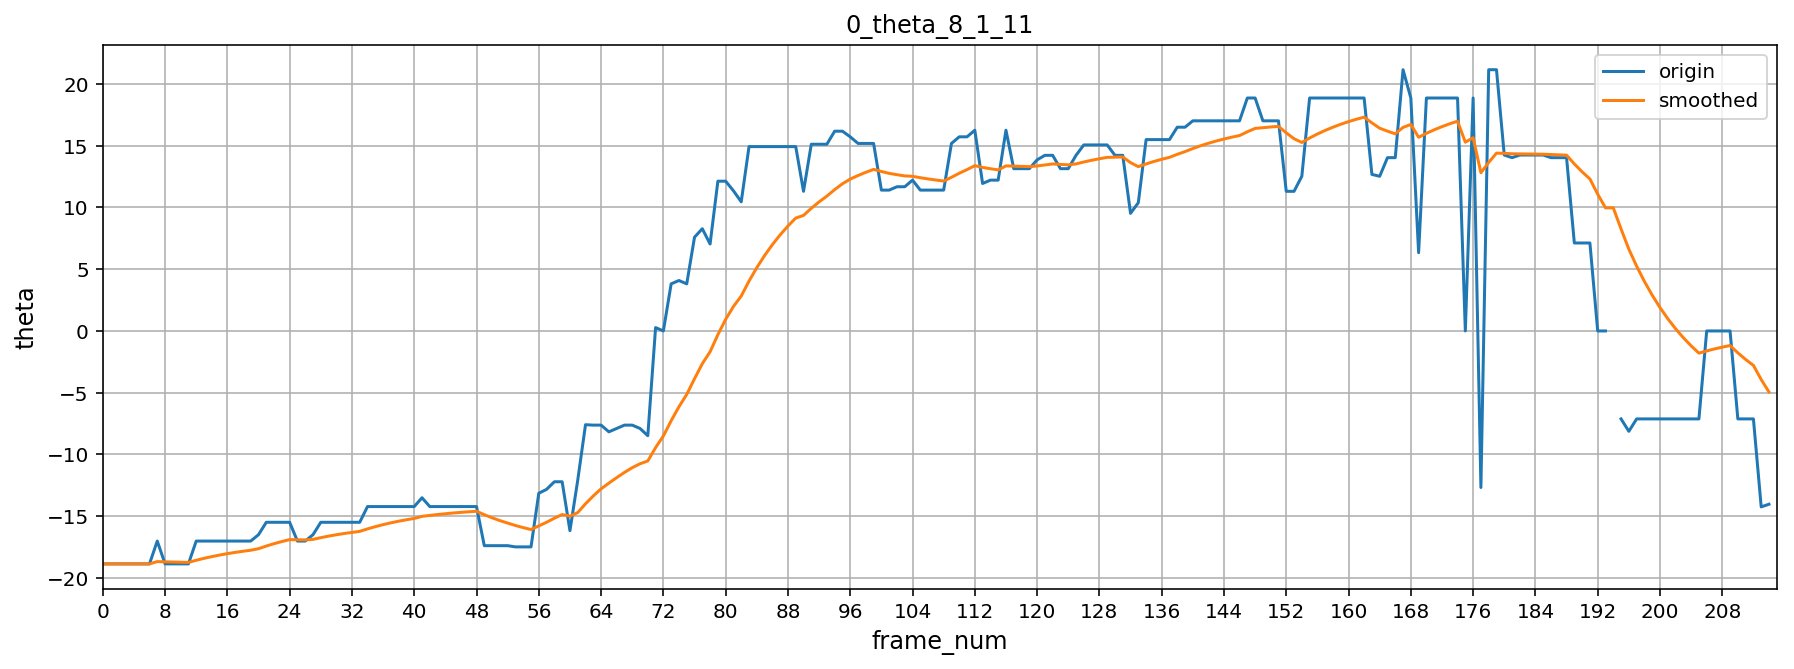

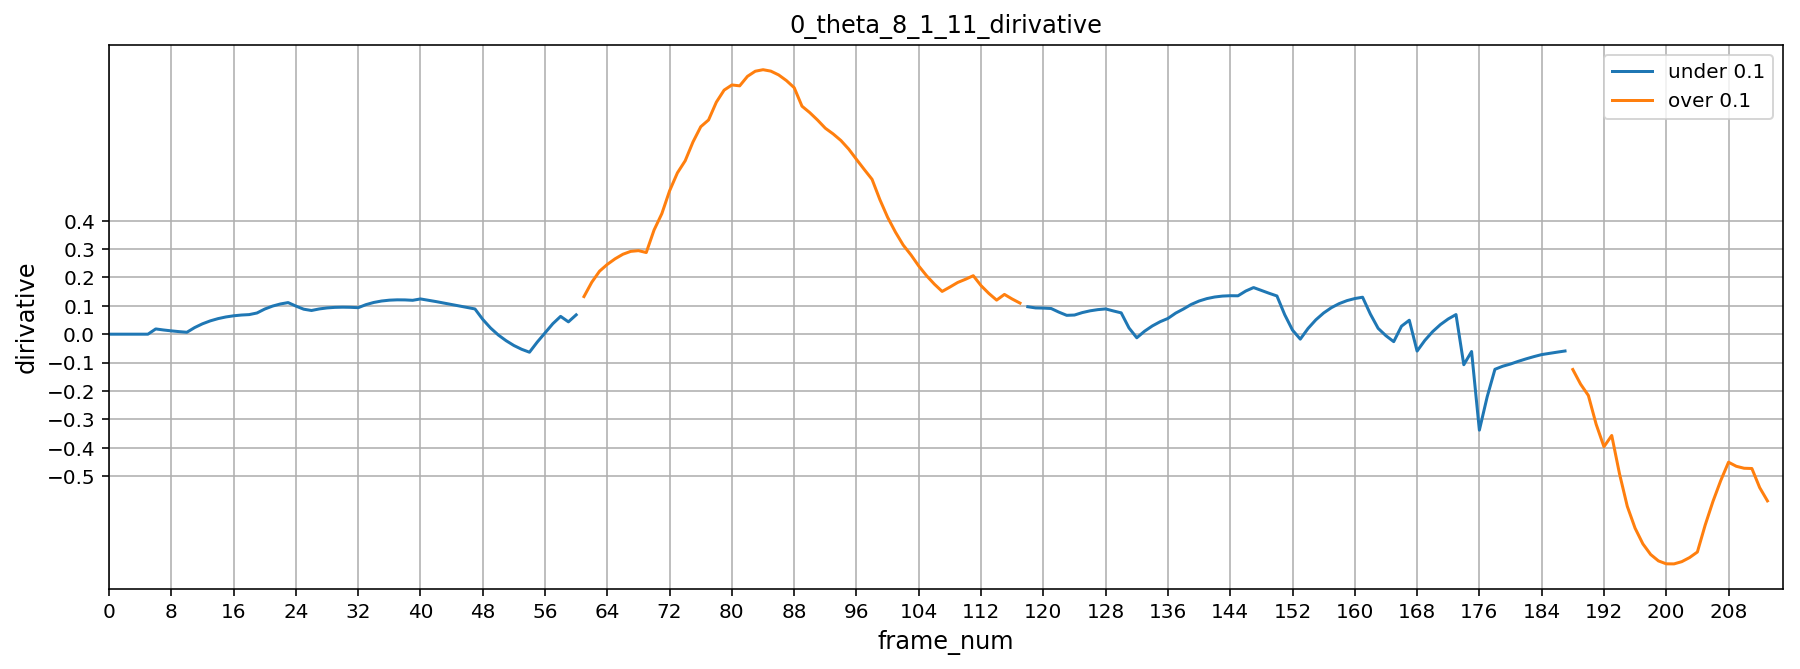

In [37]:
video_name = "turnback_2"
key = '{}_result'.format(video_name)
utils.draw_curves(video_name, result_json[key], oriented=oriented, smooth_rate=0.1, threshold = 0.1)

turnback_3

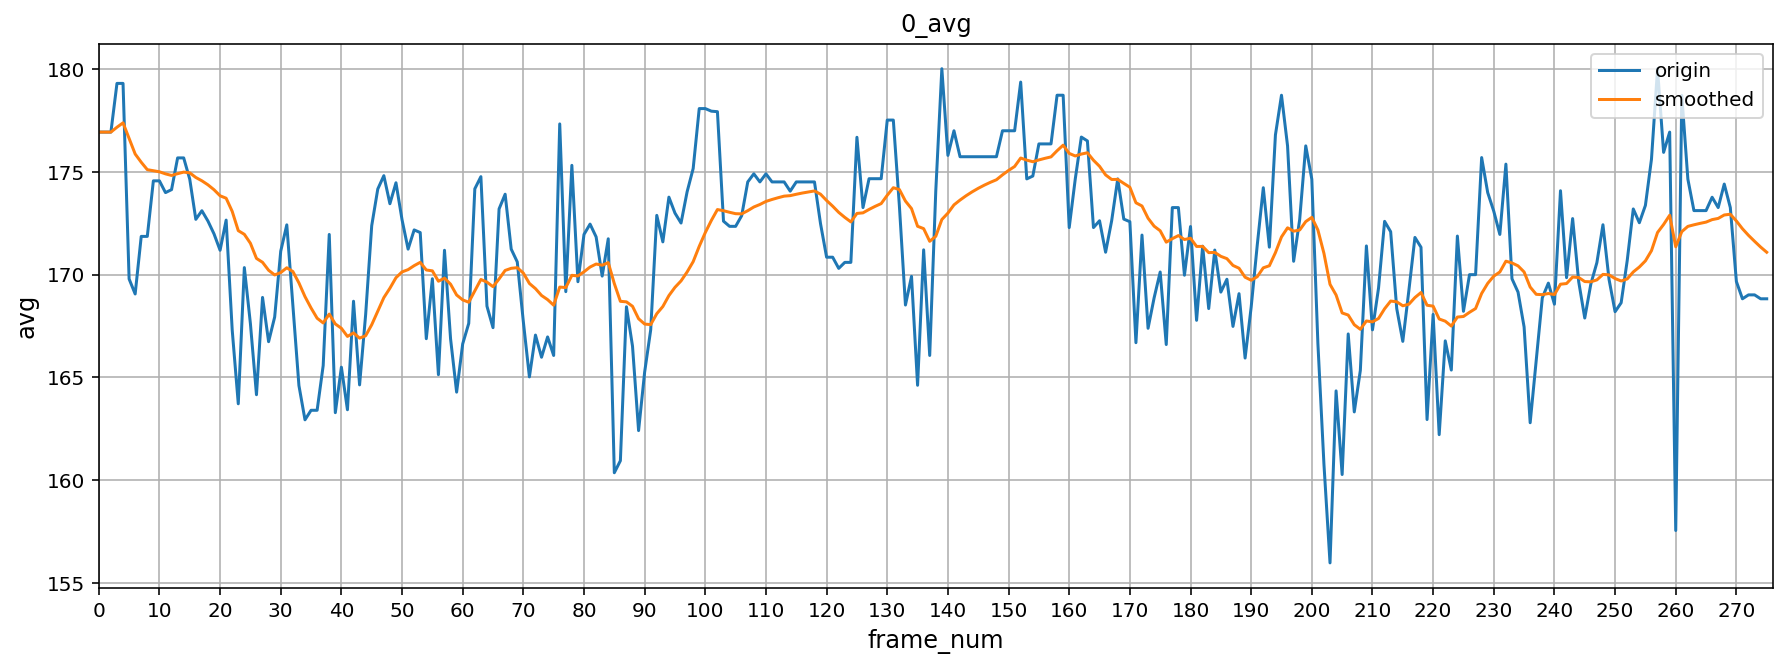

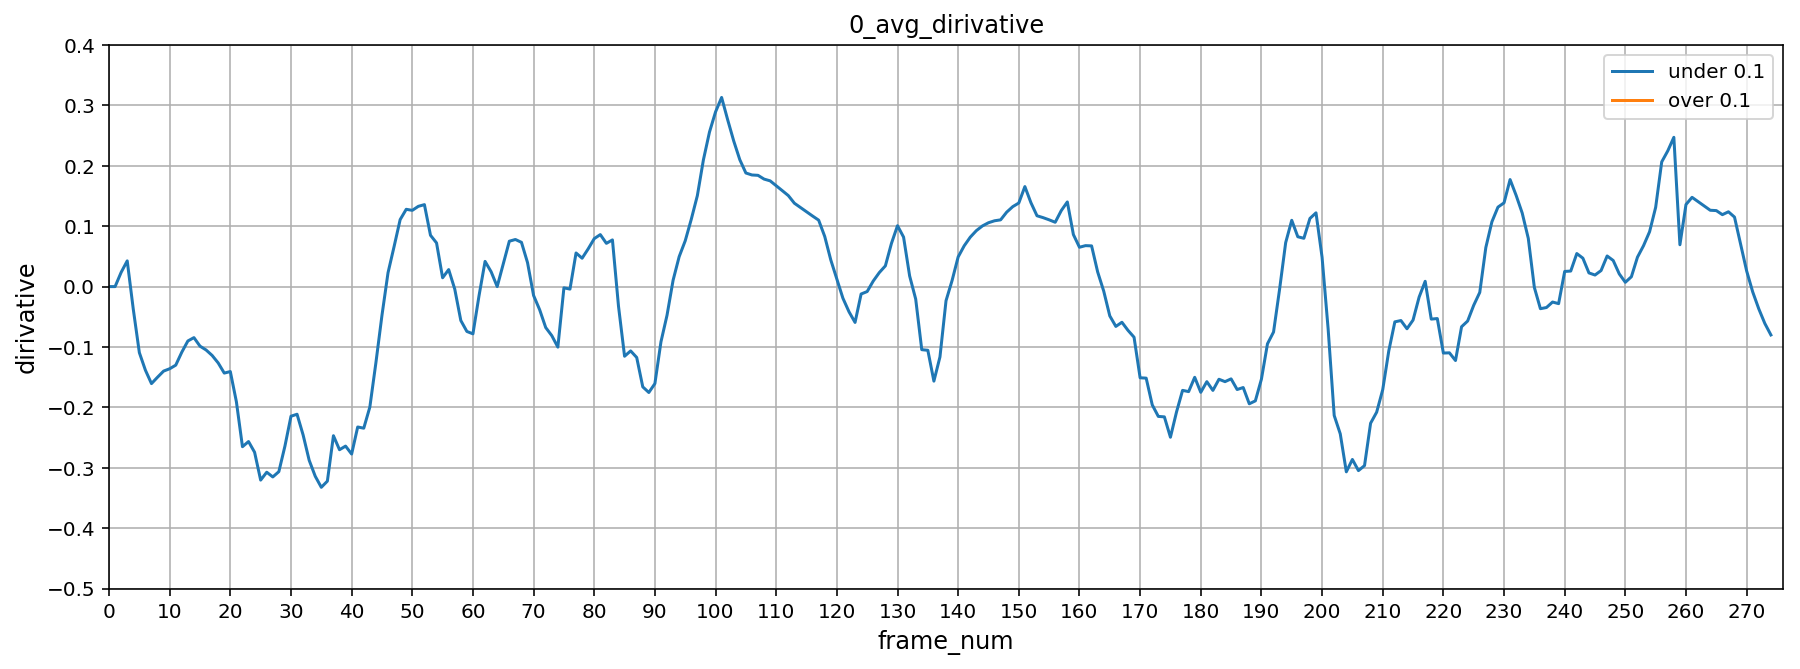

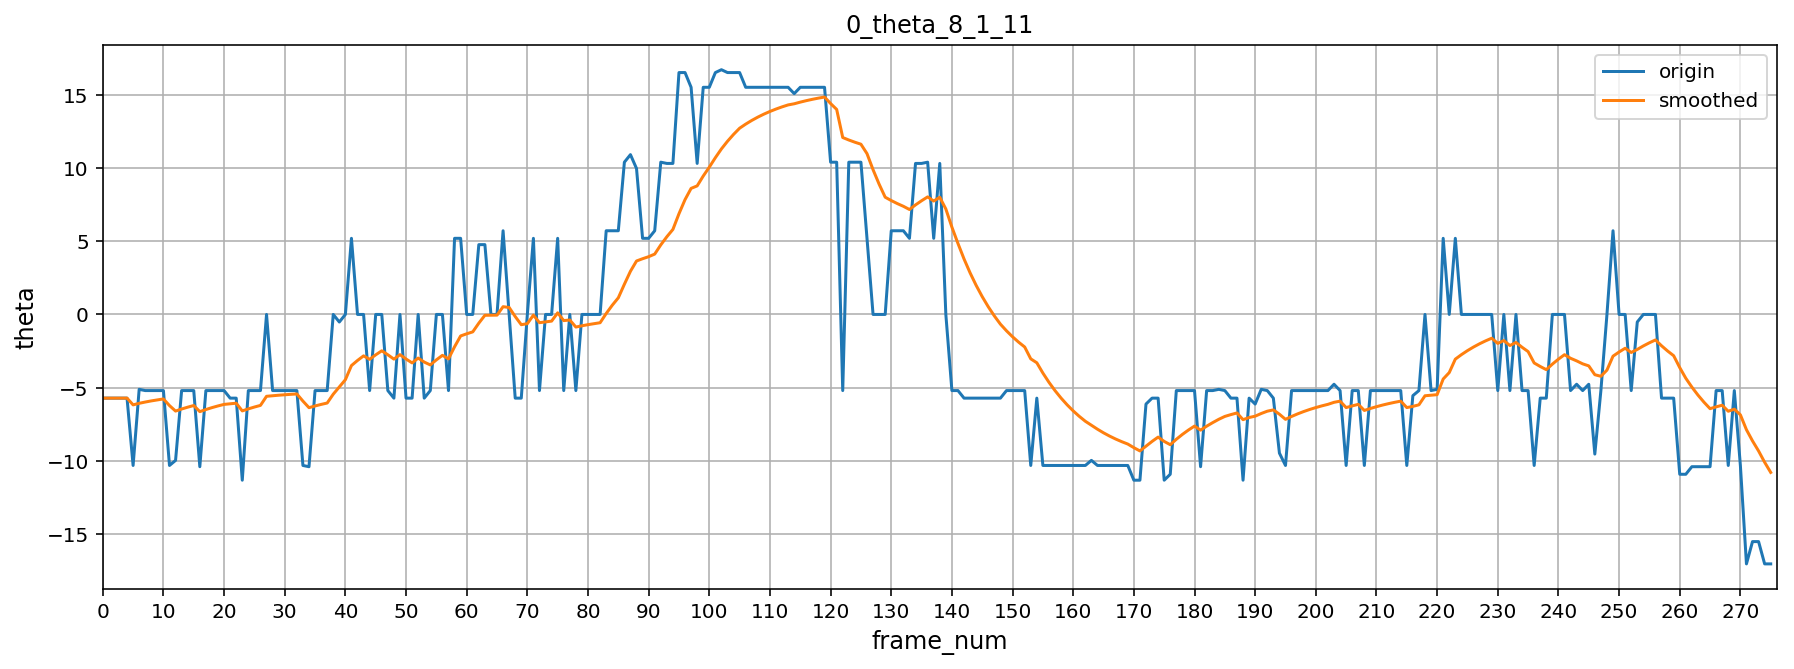

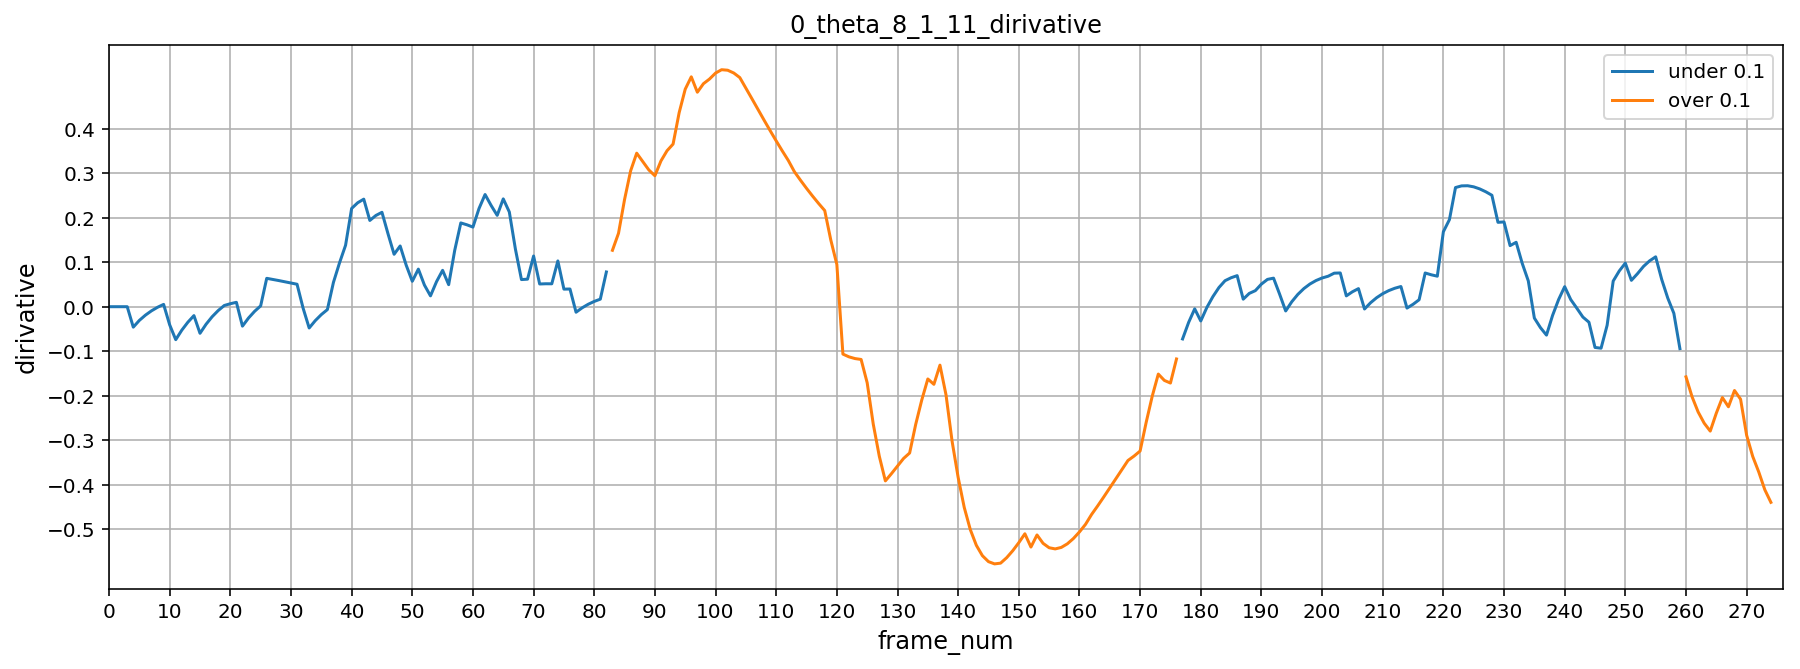

In [38]:
video_name = "turnback_3"
key = '{}_result'.format(video_name)
utils.draw_curves(video_name, result_json[key], oriented=oriented, smooth_rate=0.1, threshold = 0.1)

turnback_4

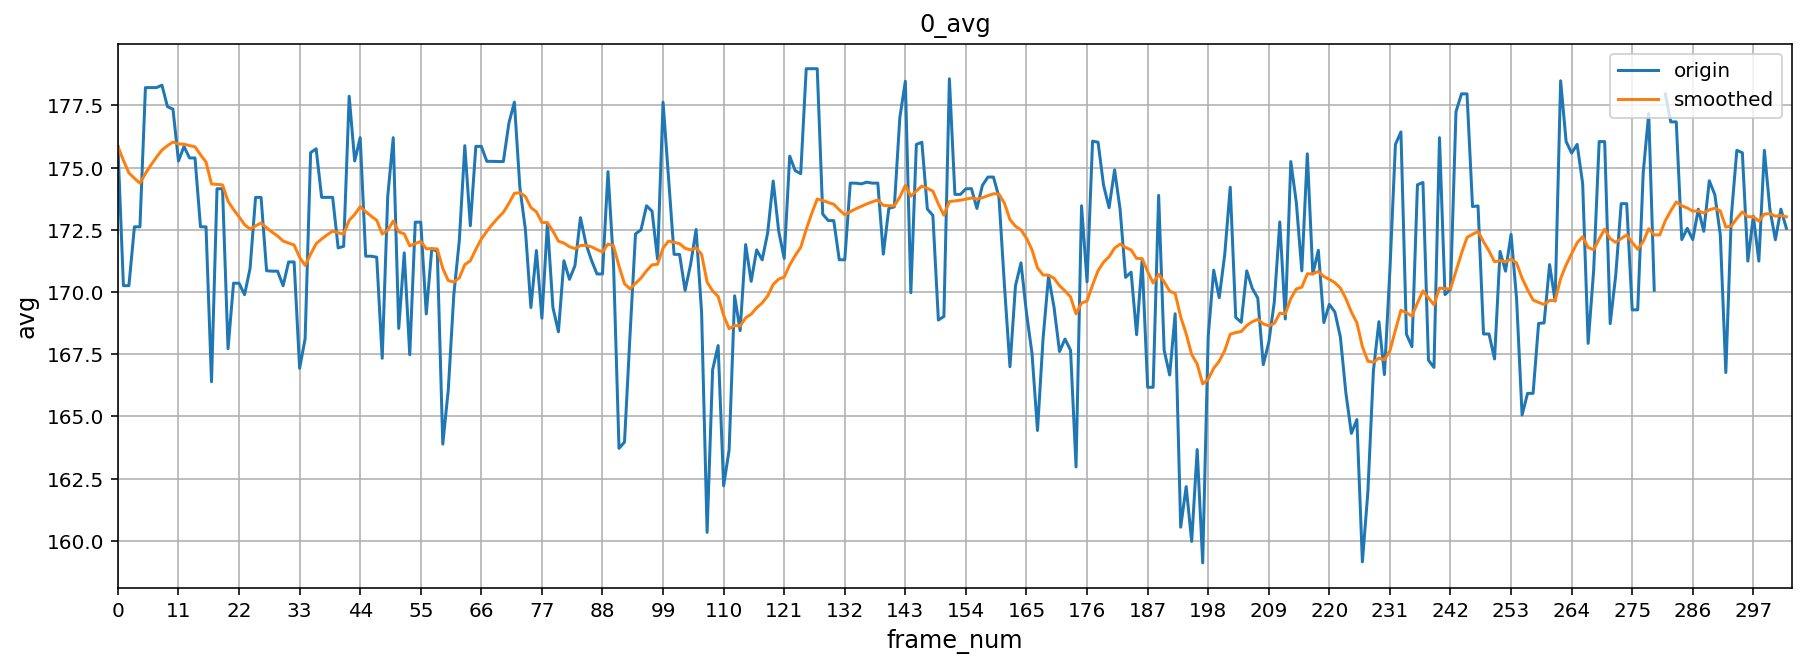

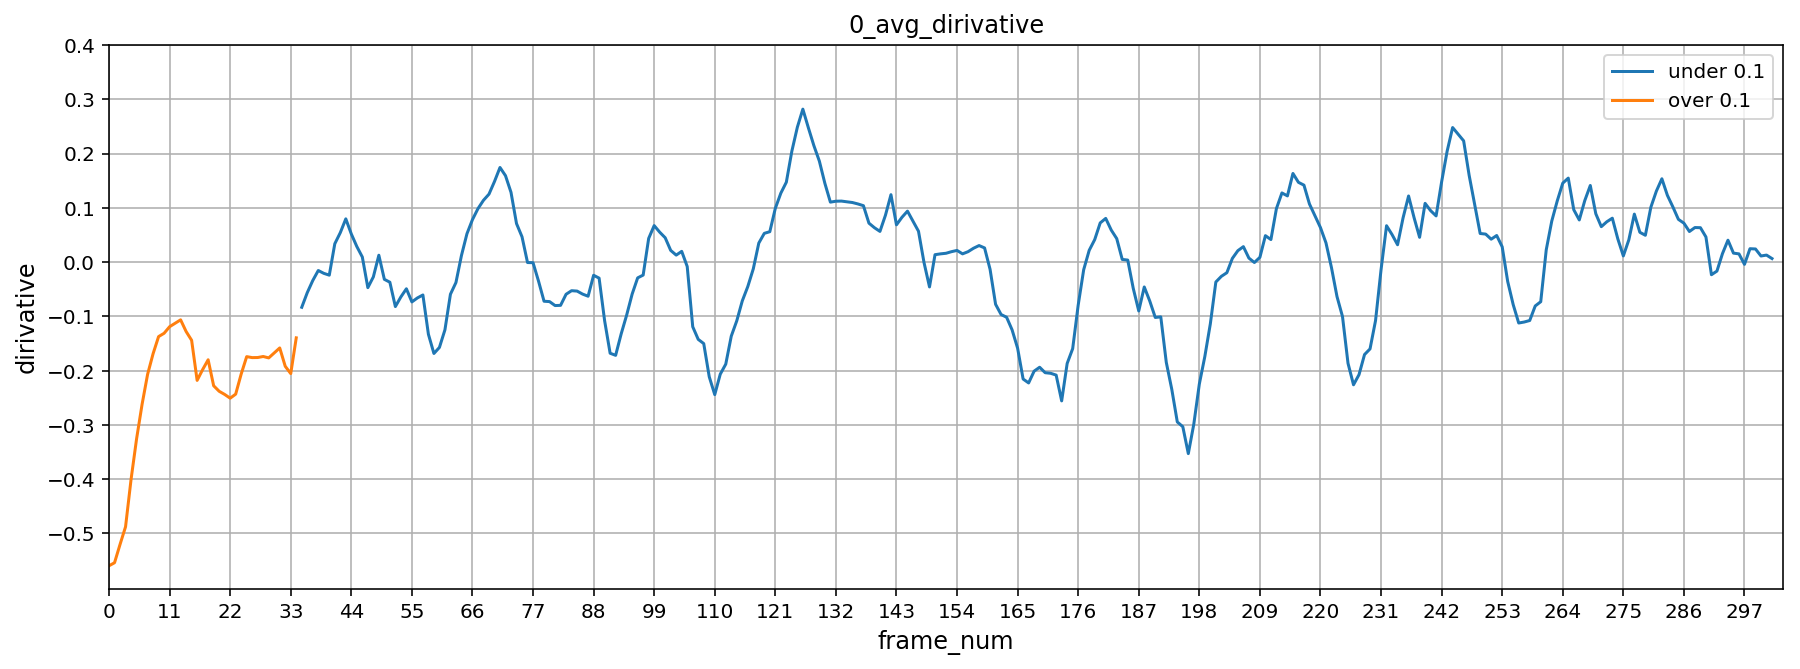

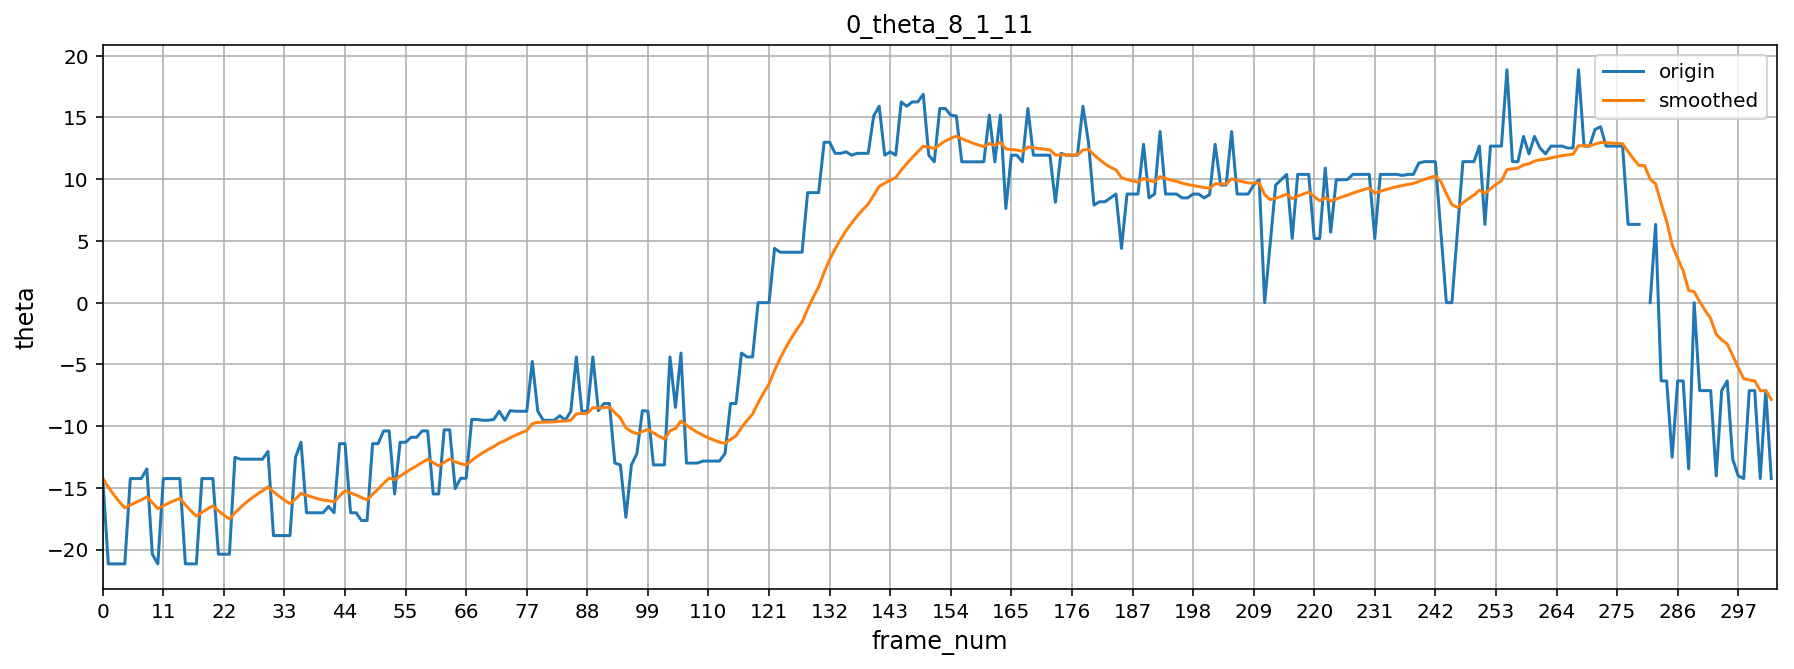

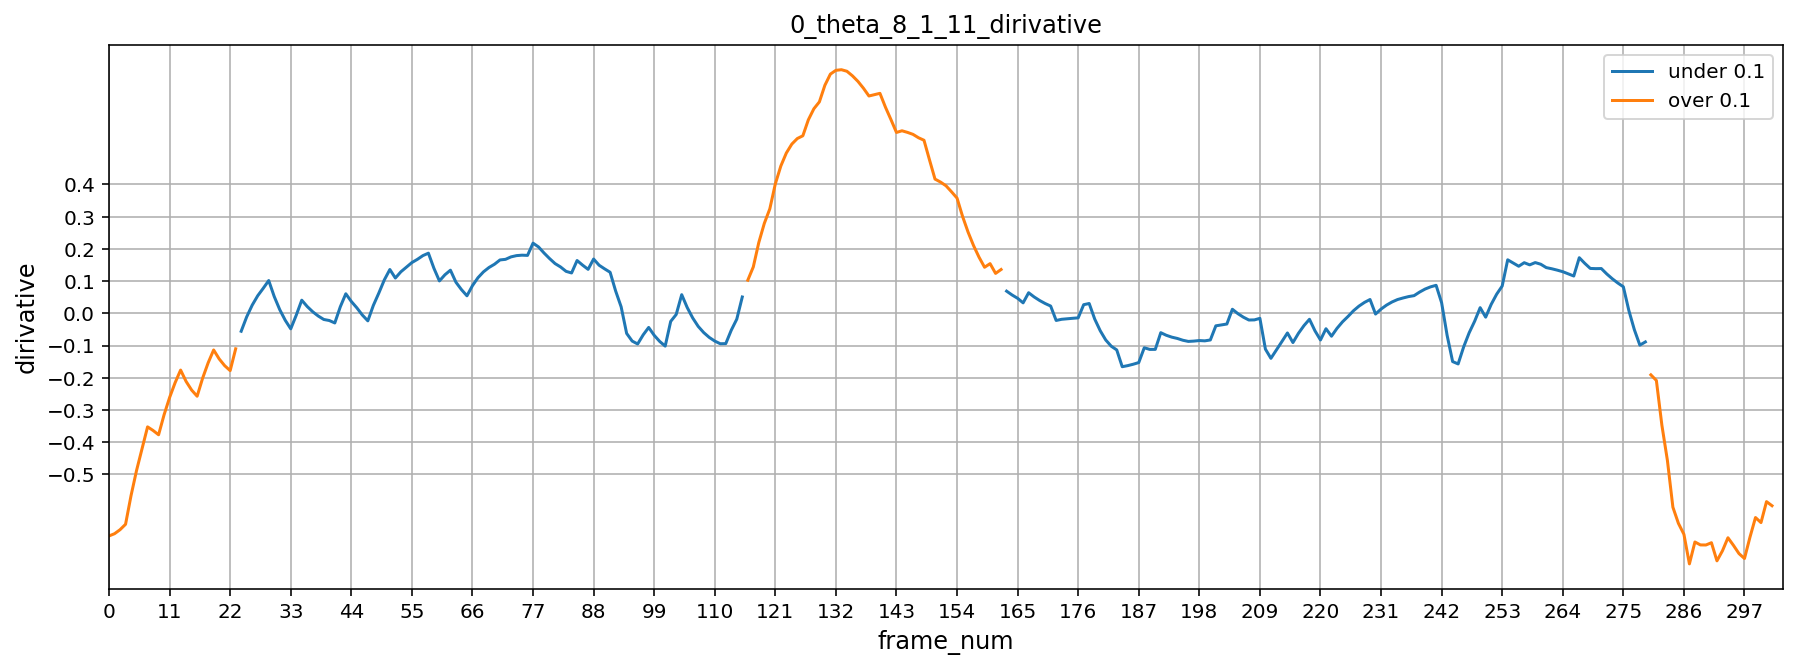

In [39]:
video_name = "turnback_4"
key = '{}_result'.format(video_name)
utils.draw_curves(video_name, result_json[key], oriented=oriented, smooth_rate=0.1, threshold = 0.1)

#### draw figures of walk

walk_front_1

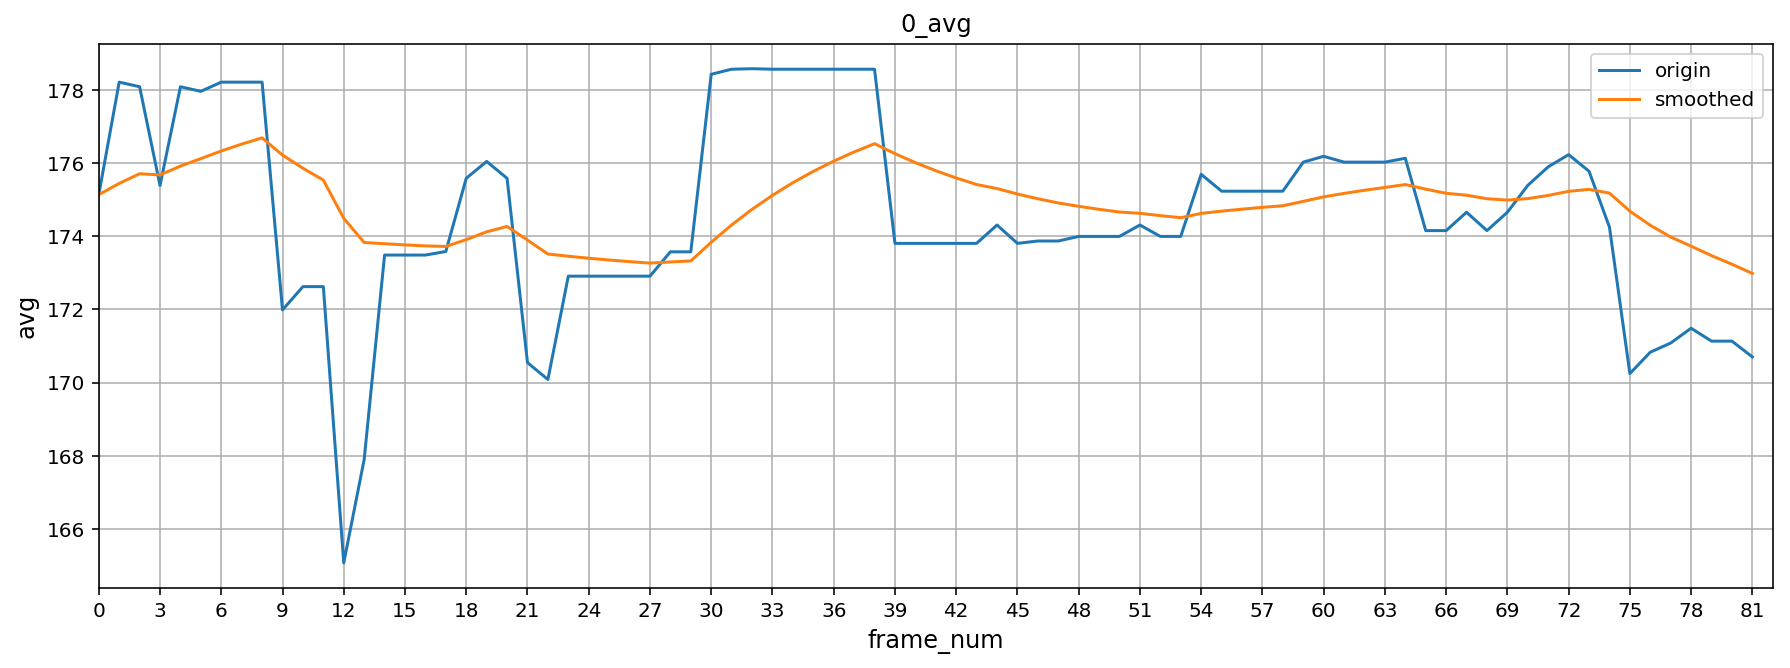

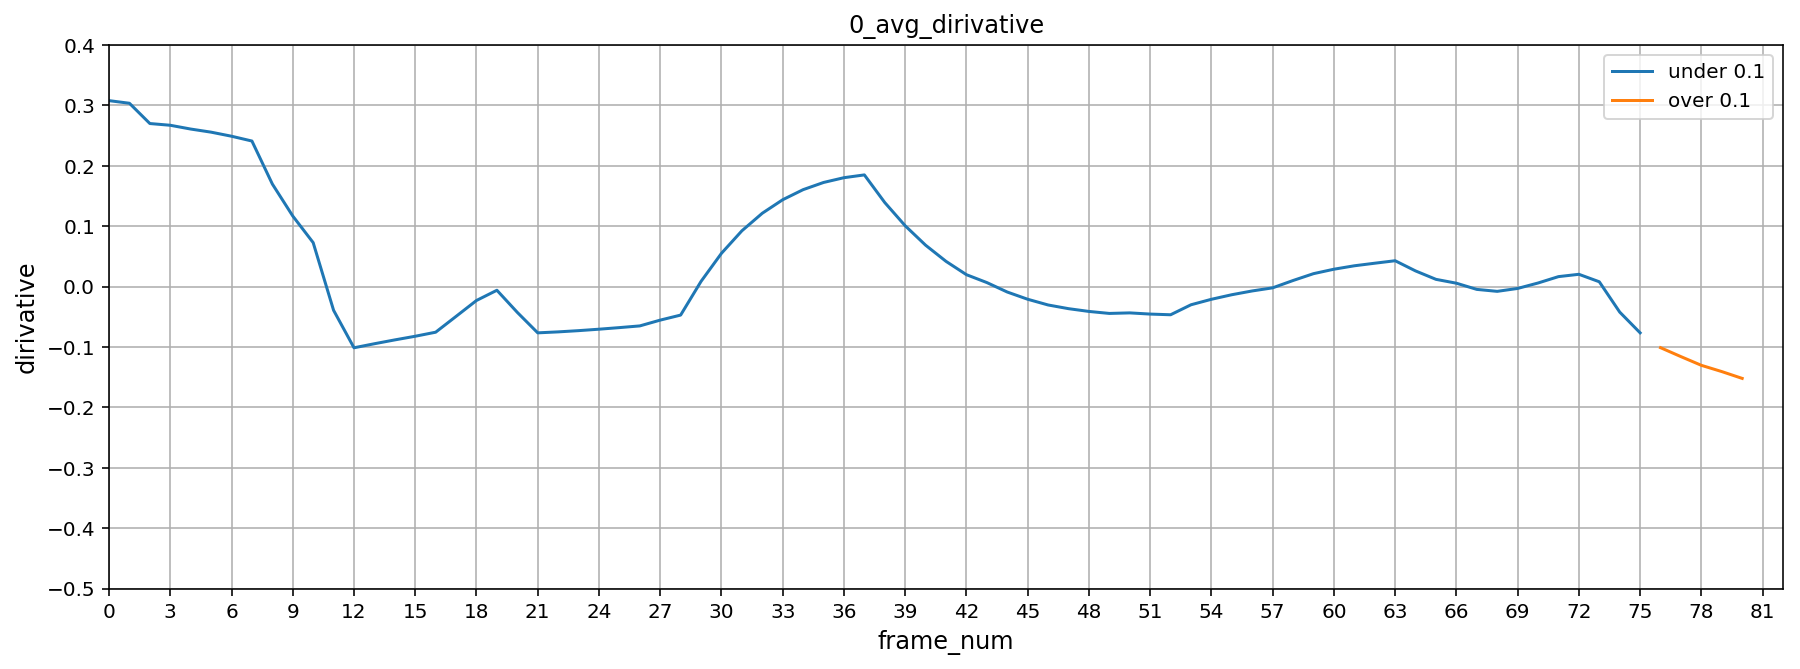

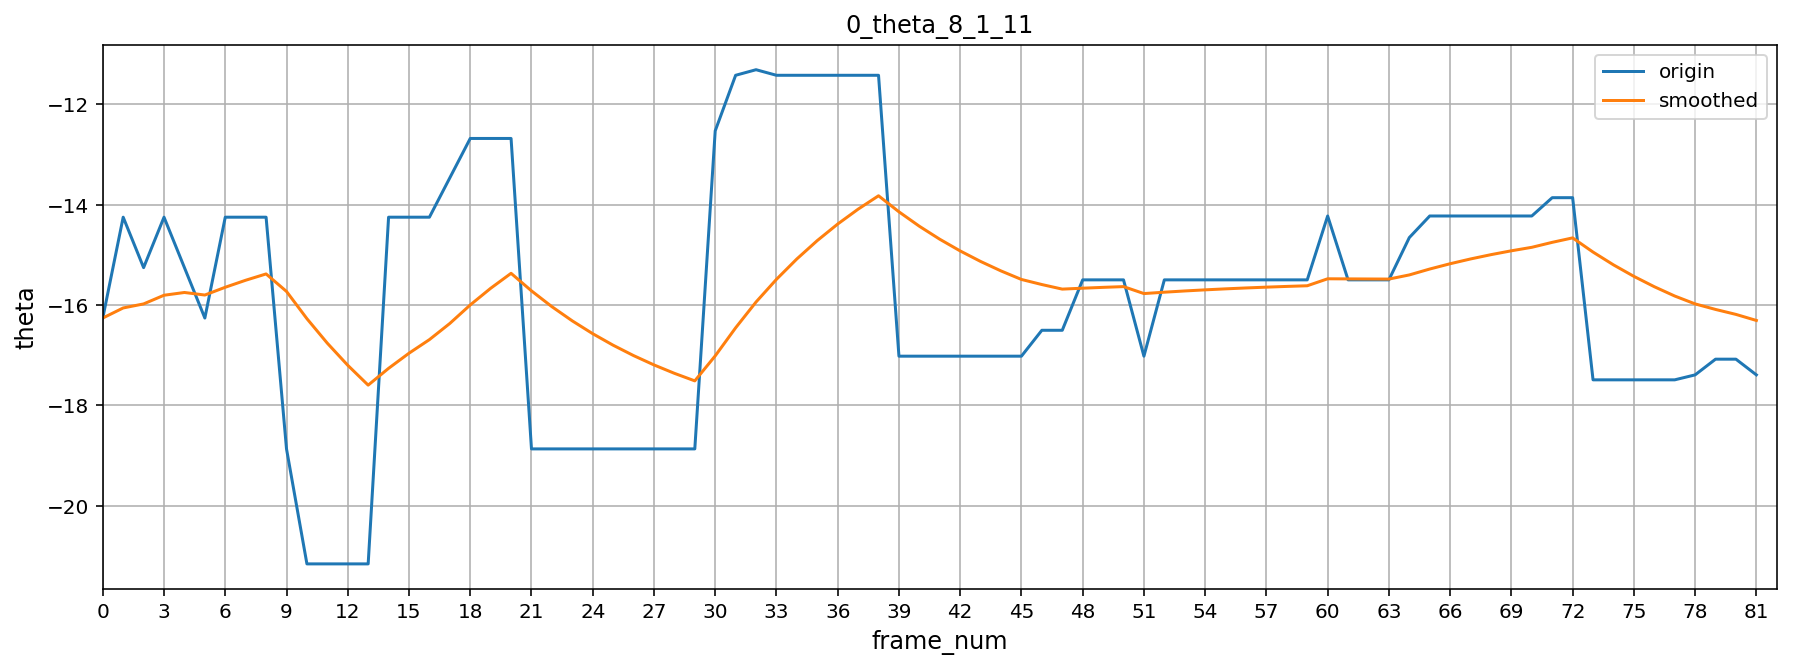

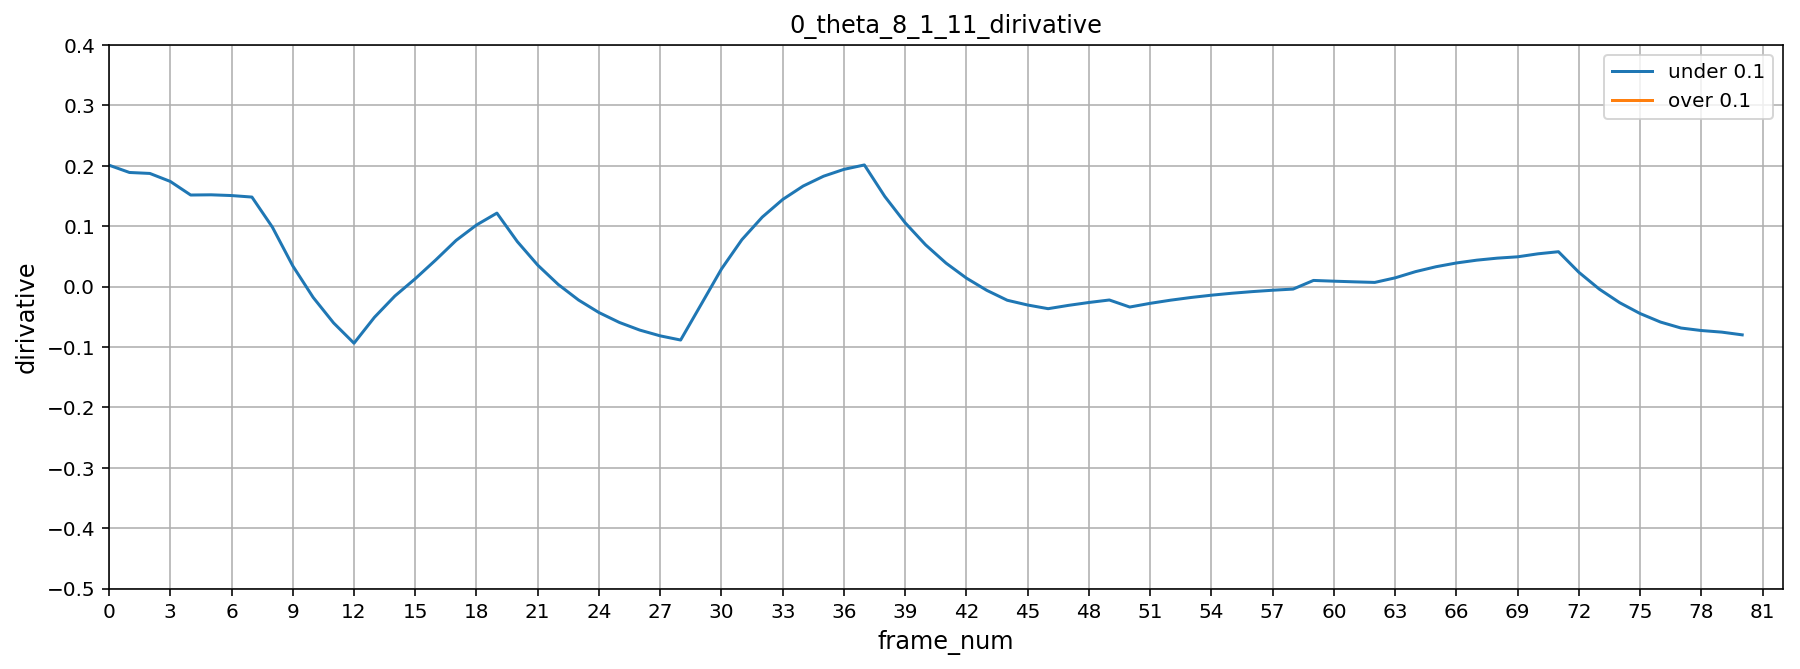

In [16]:
video_name = "walk_front_1"
key = '{}_result'.format(video_name)
utils.draw_curves(video_name, result_json[key], oriented=oriented, smooth_rate=0.1, threshold = 0.1)

walk_left_1

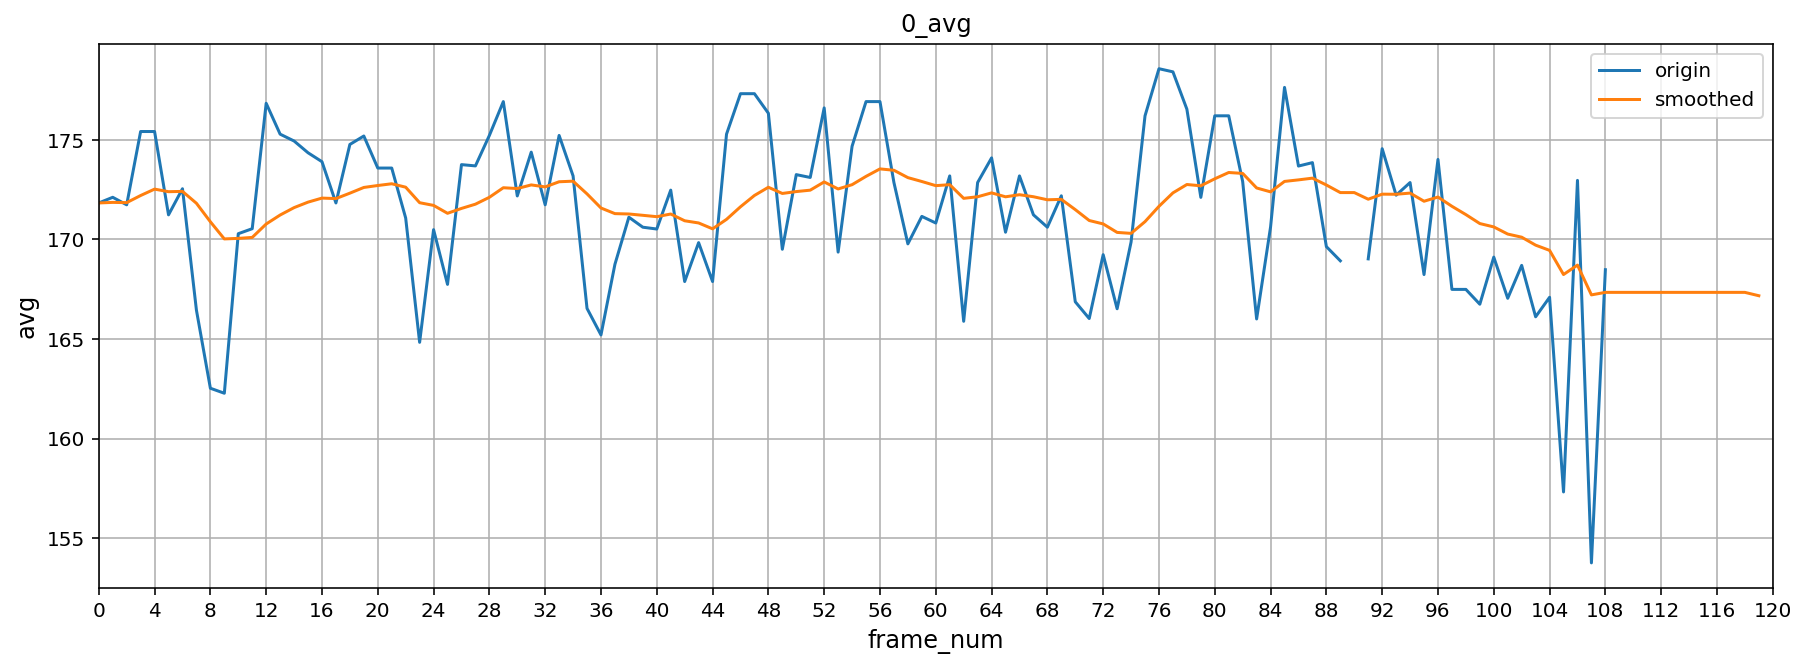

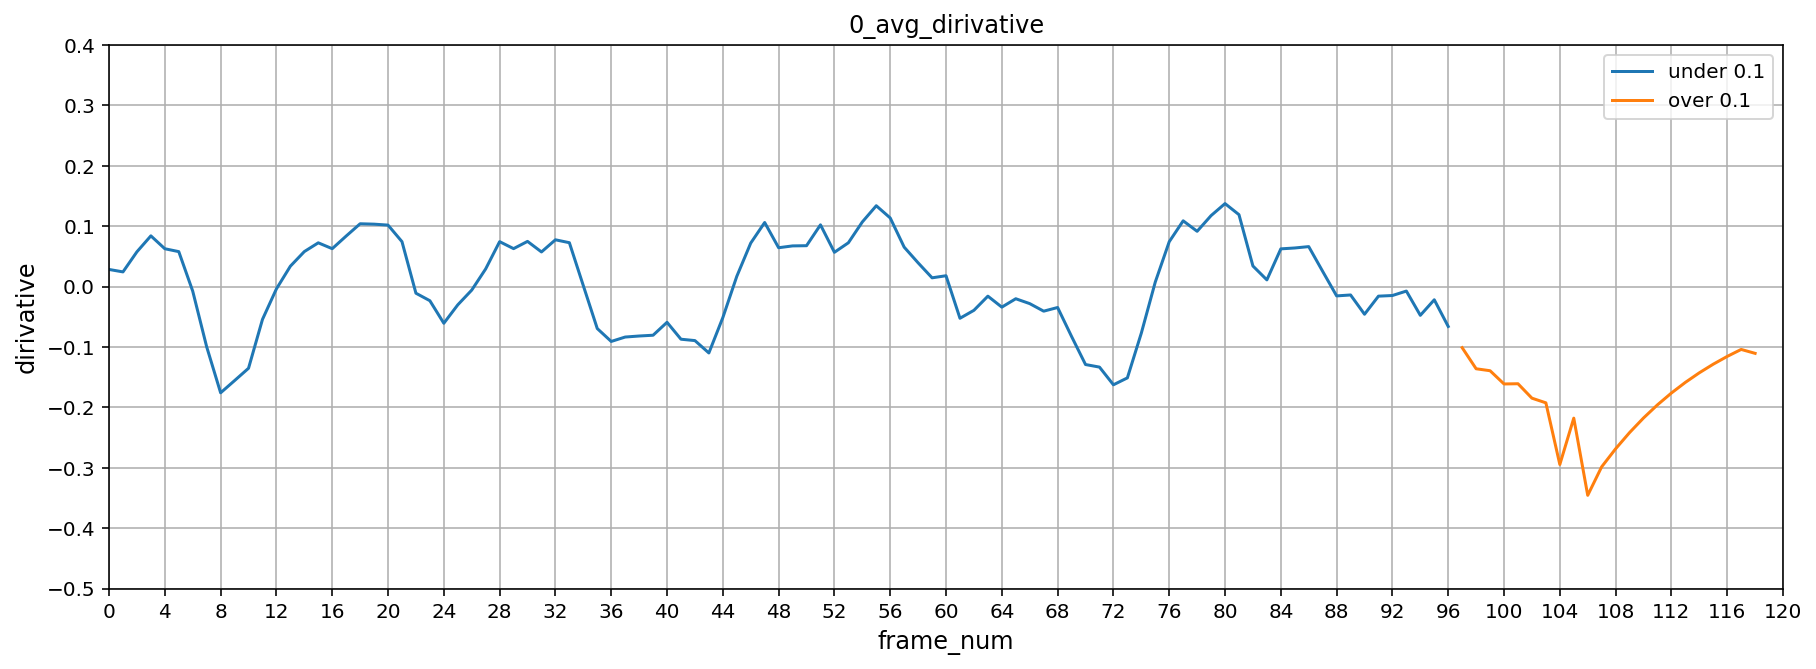

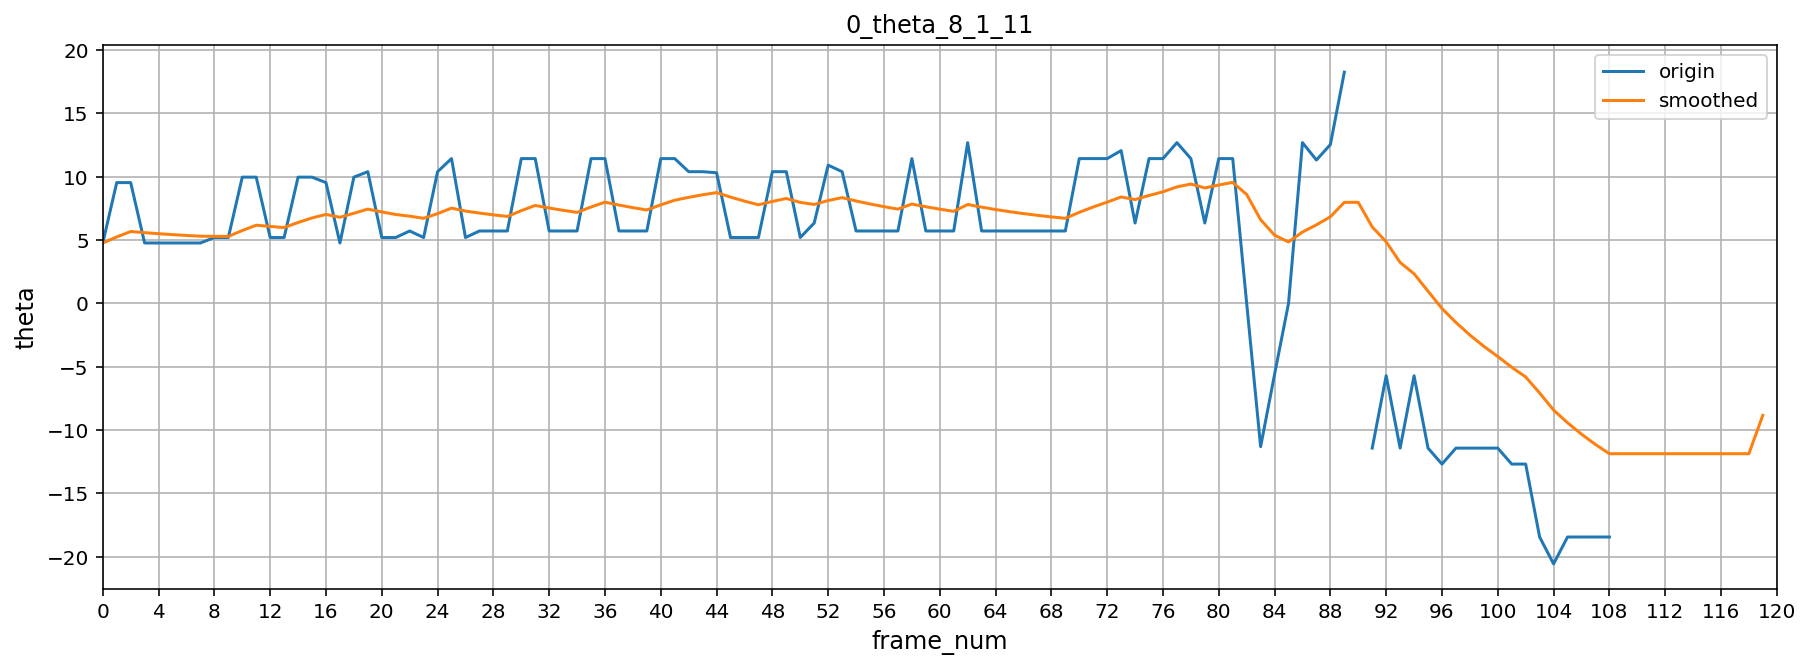

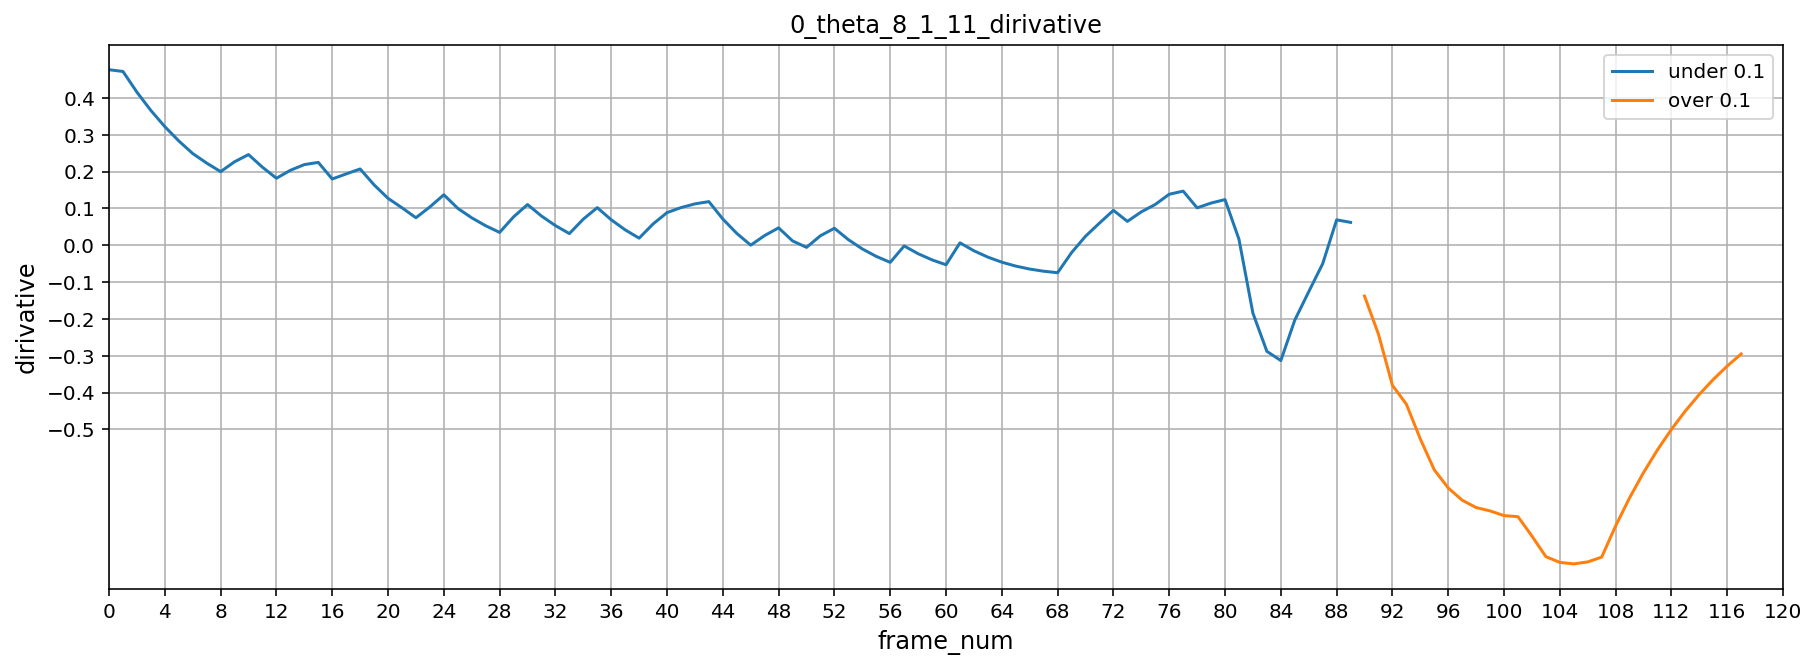

In [17]:
video_name = "walk_left_1"
key = '{}_result'.format(video_name)
utils.draw_curves(video_name, result_json[key], oriented=oriented, smooth_rate=0.1, threshold = 0.1)

walk_right_1

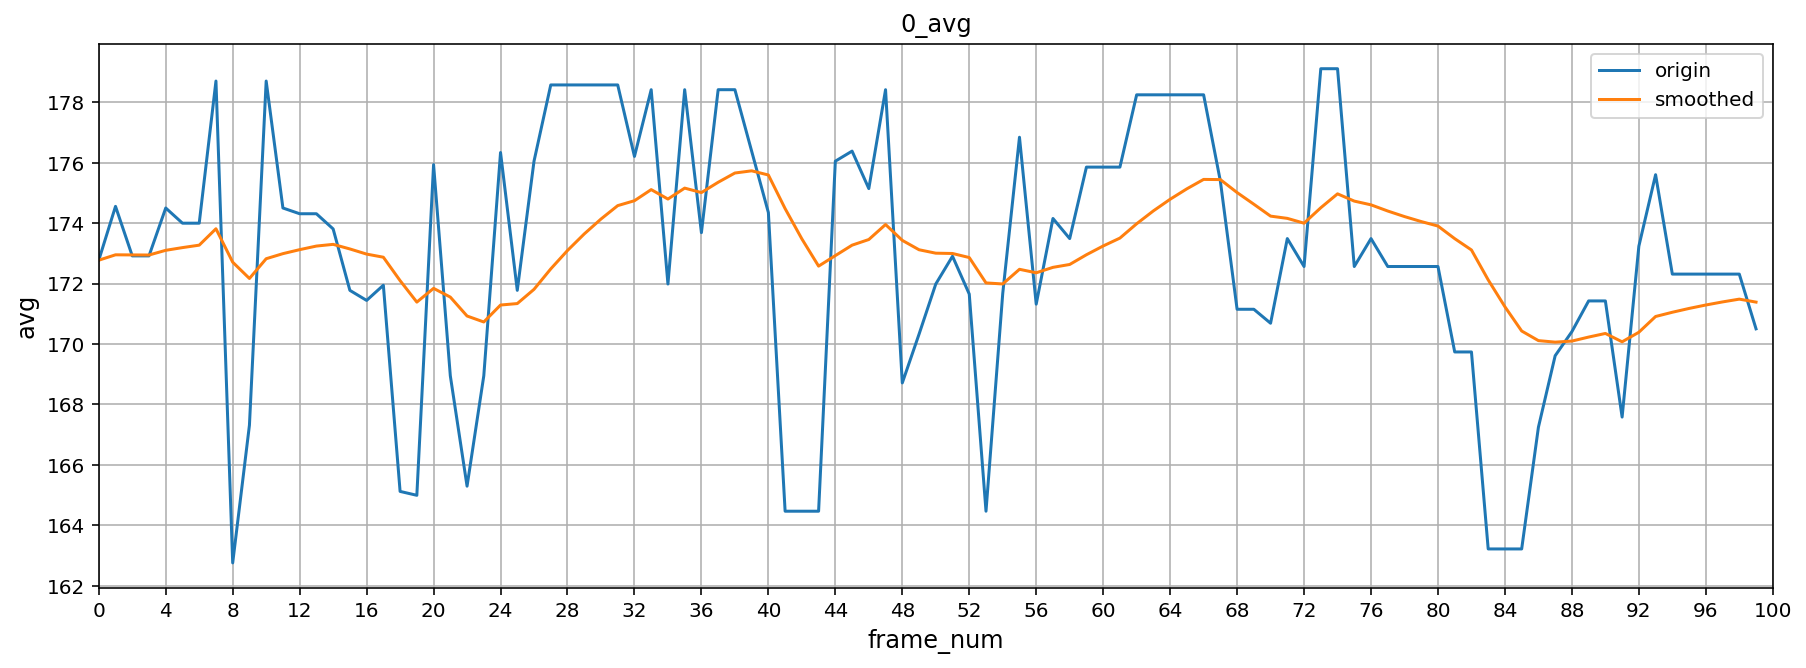

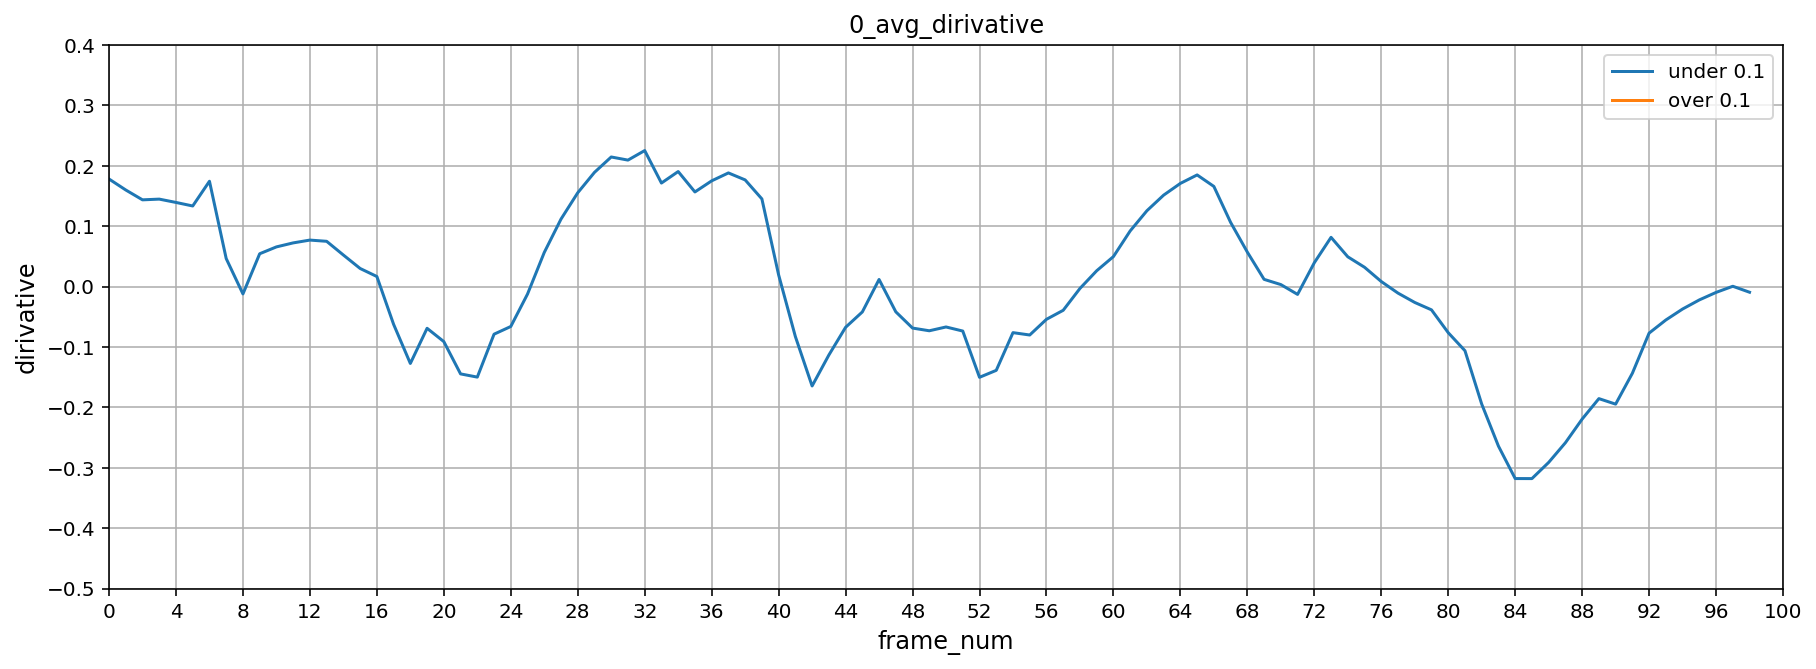

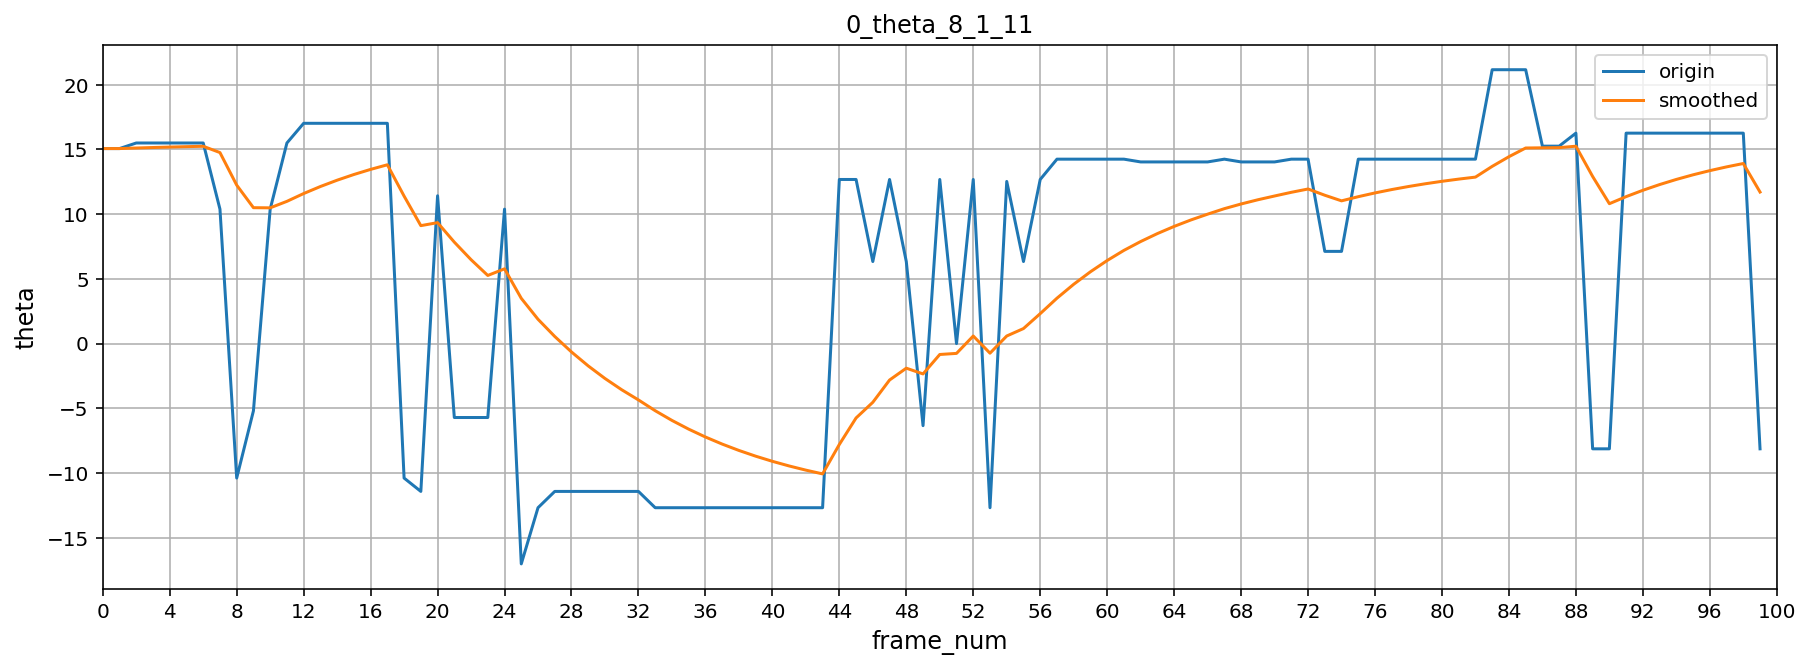

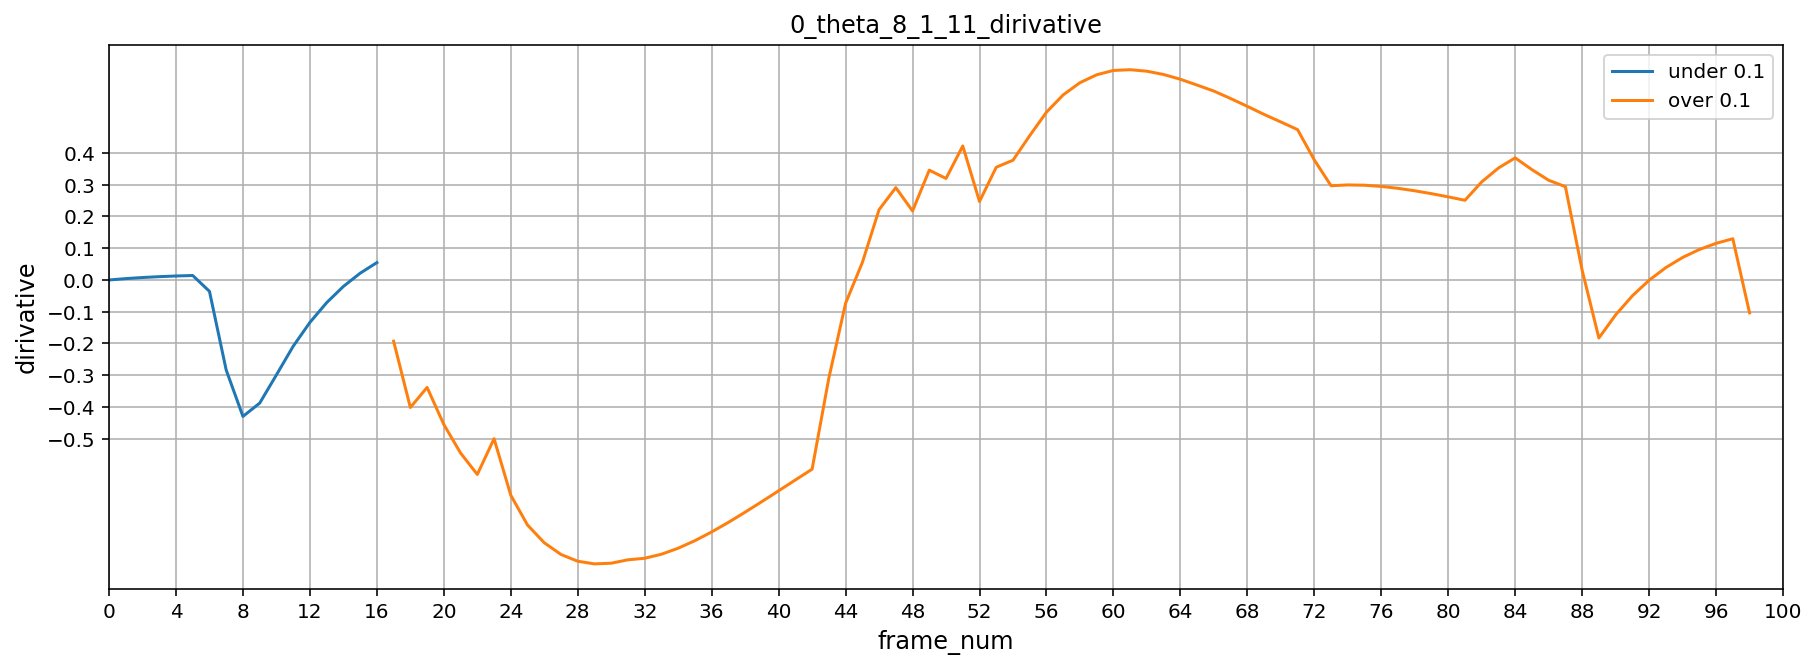

In [18]:
video_name = "walk_right_1"
key = '{}_result'.format(video_name)
utils.draw_curves(video_name, result_json[key], oriented=oriented, smooth_rate=0.1, threshold = 0.1)

#### draw figures of stand

stand_front_1

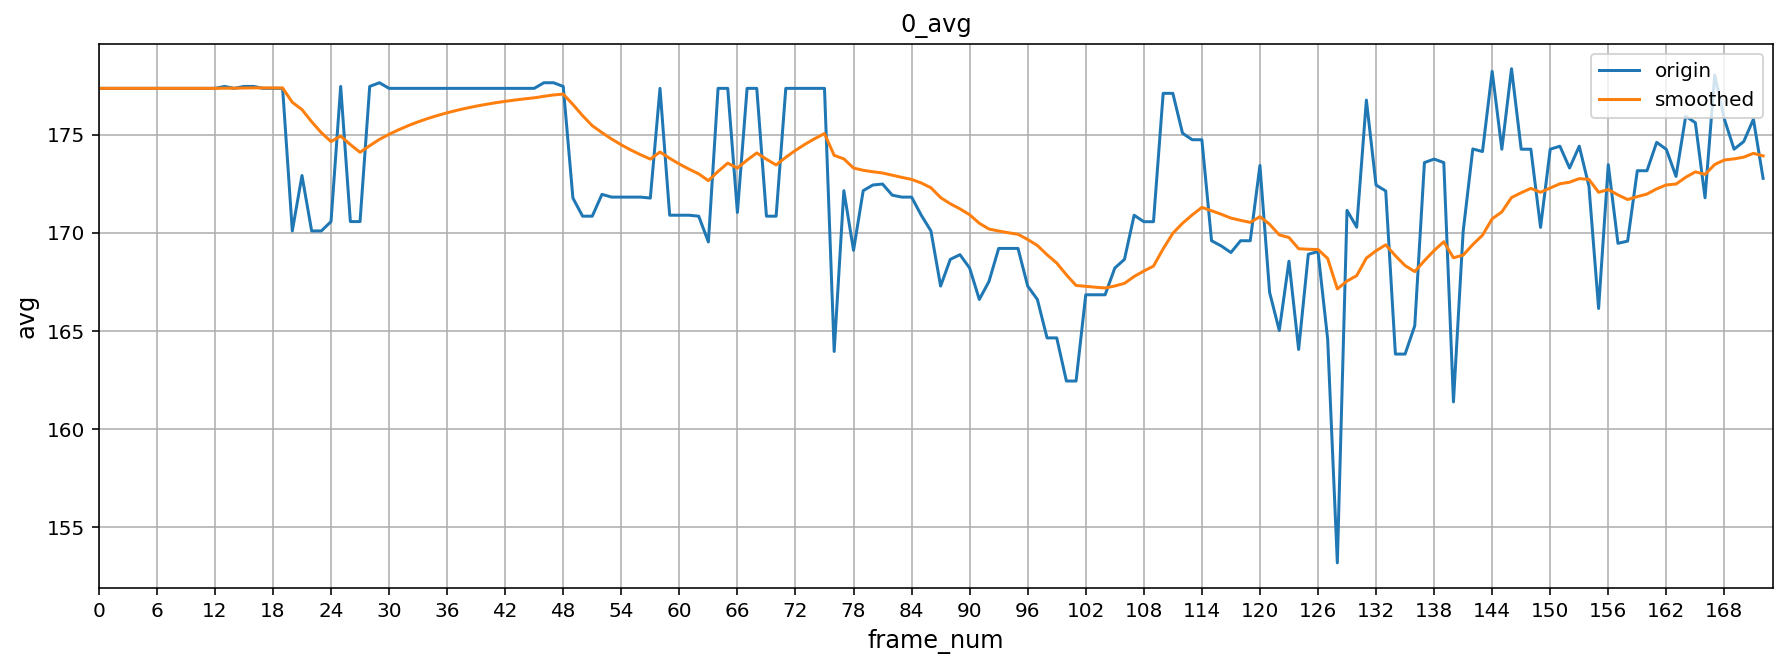

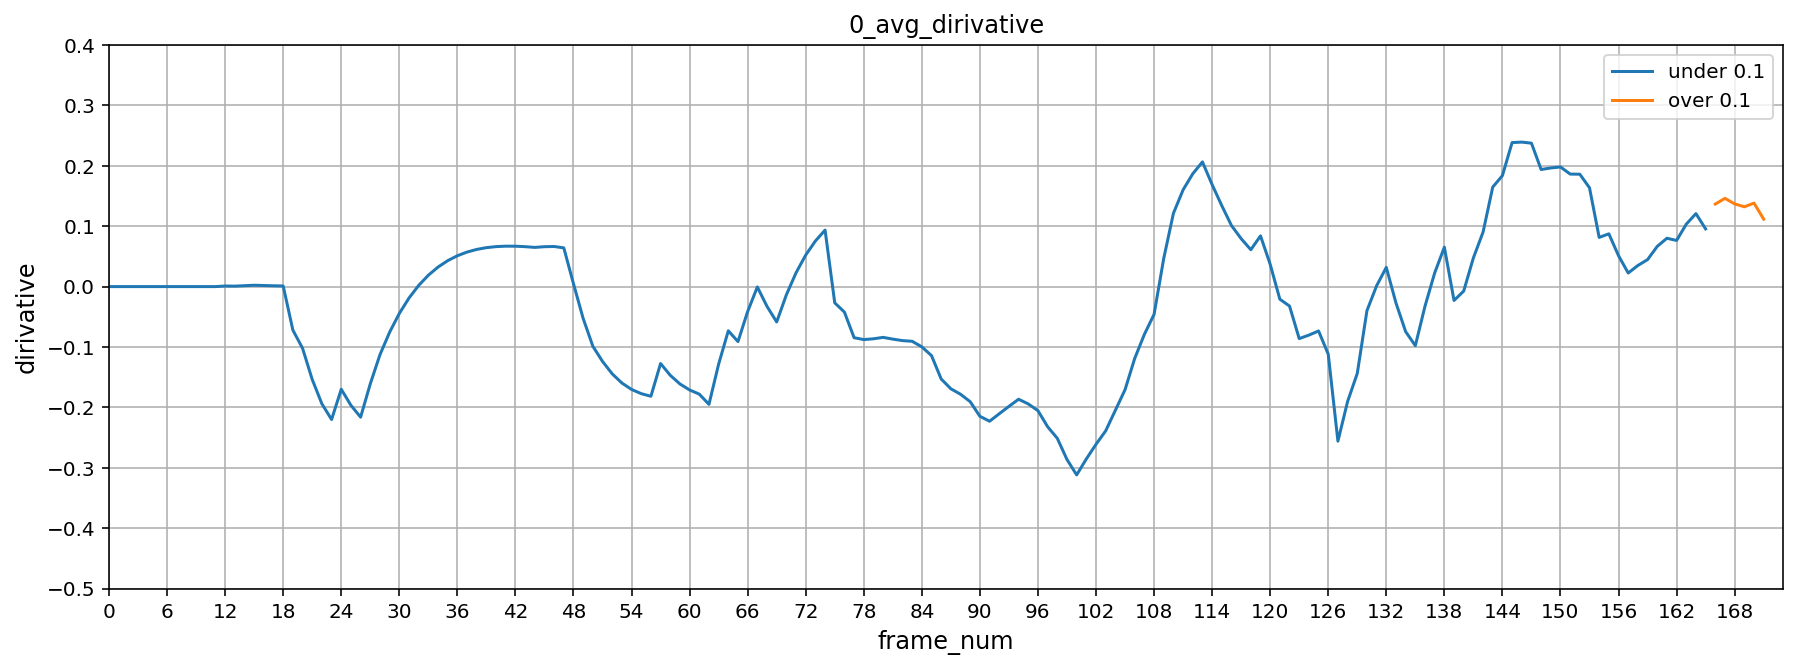

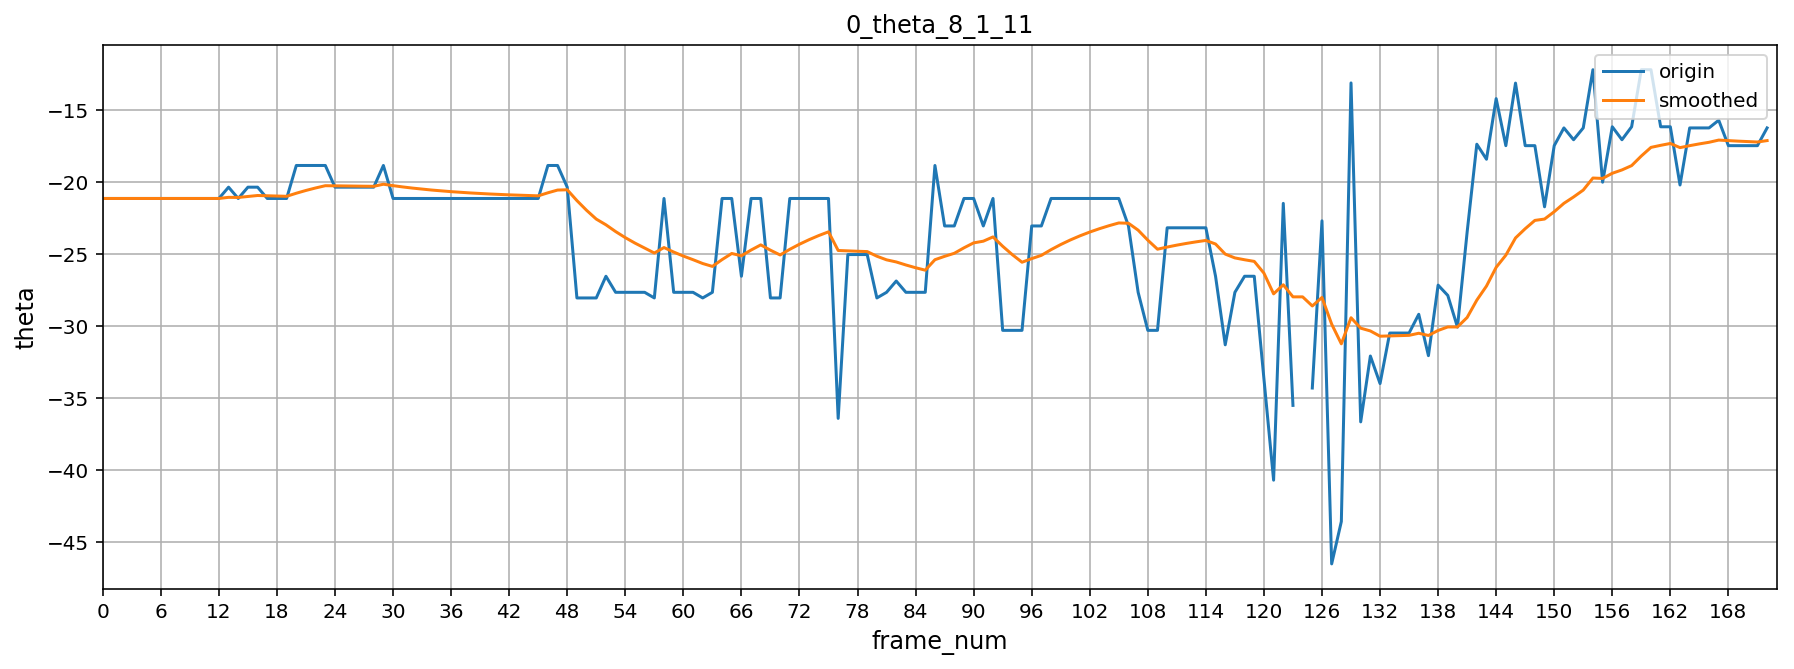

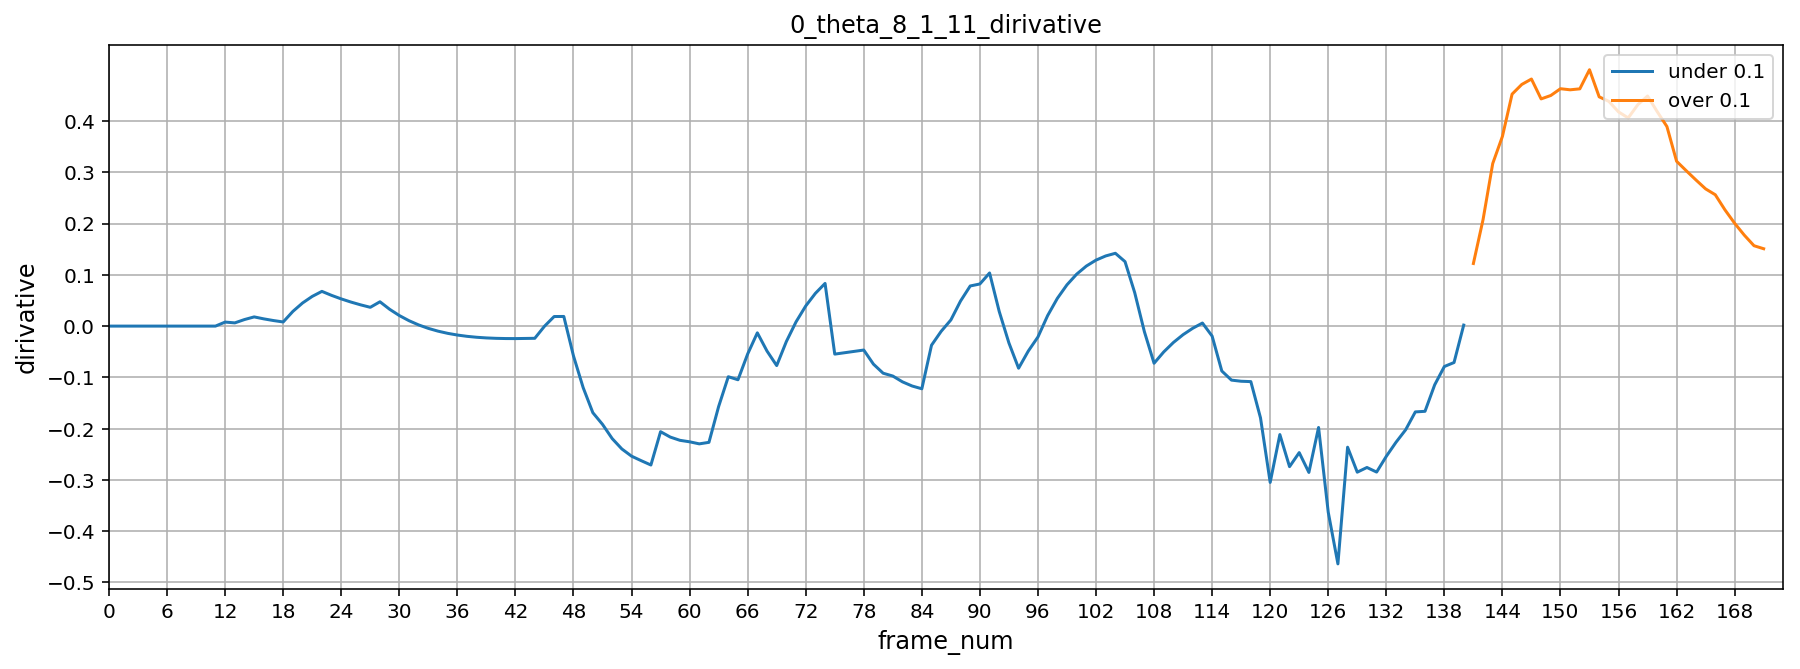

In [19]:
video_name = "stand_front_1"
key = '{}_result'.format(video_name)
utils.draw_curves(video_name, result_json[key], oriented=oriented, smooth_rate=0.1, threshold = 0.1)

stand_left_1

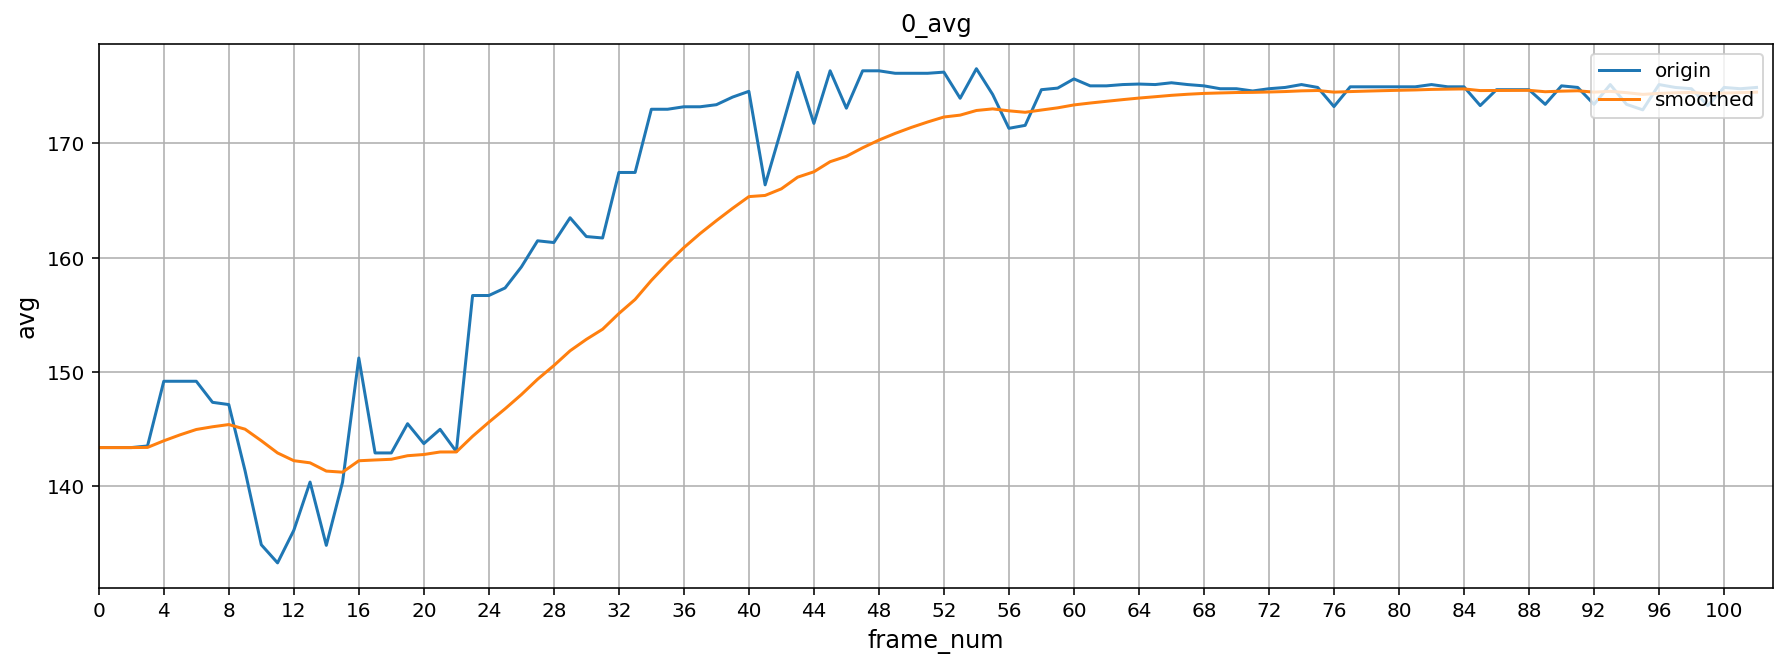

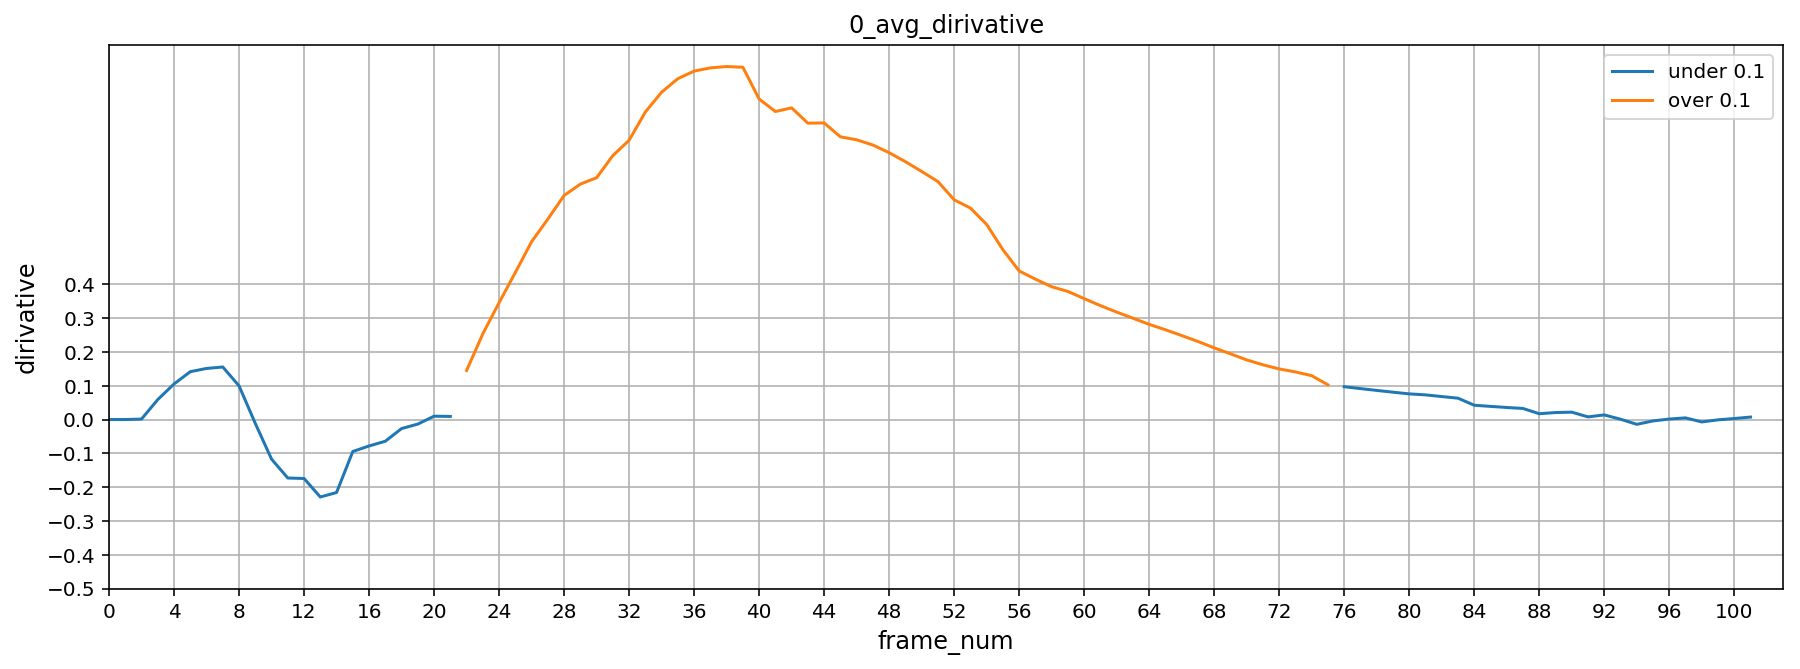

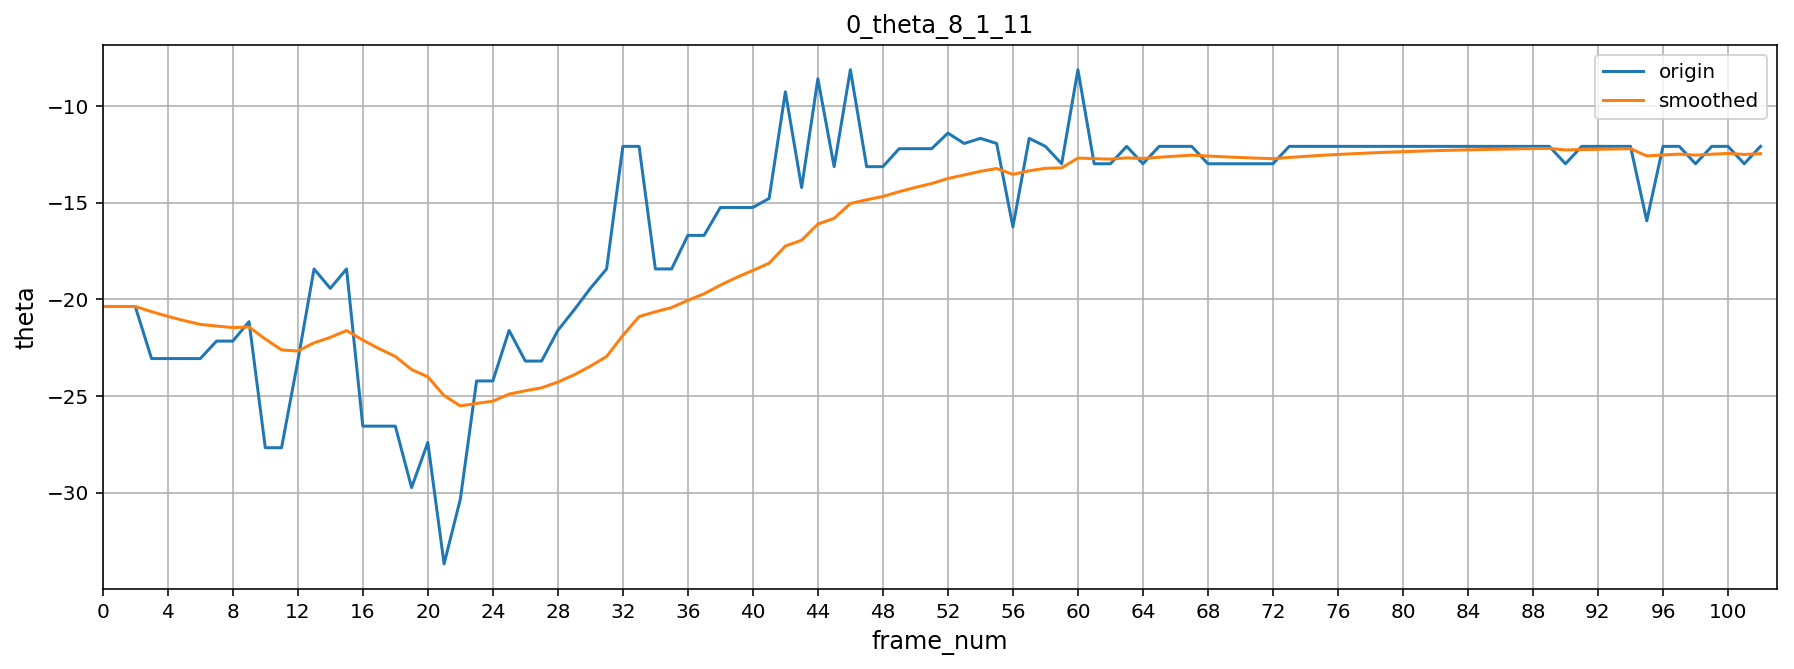

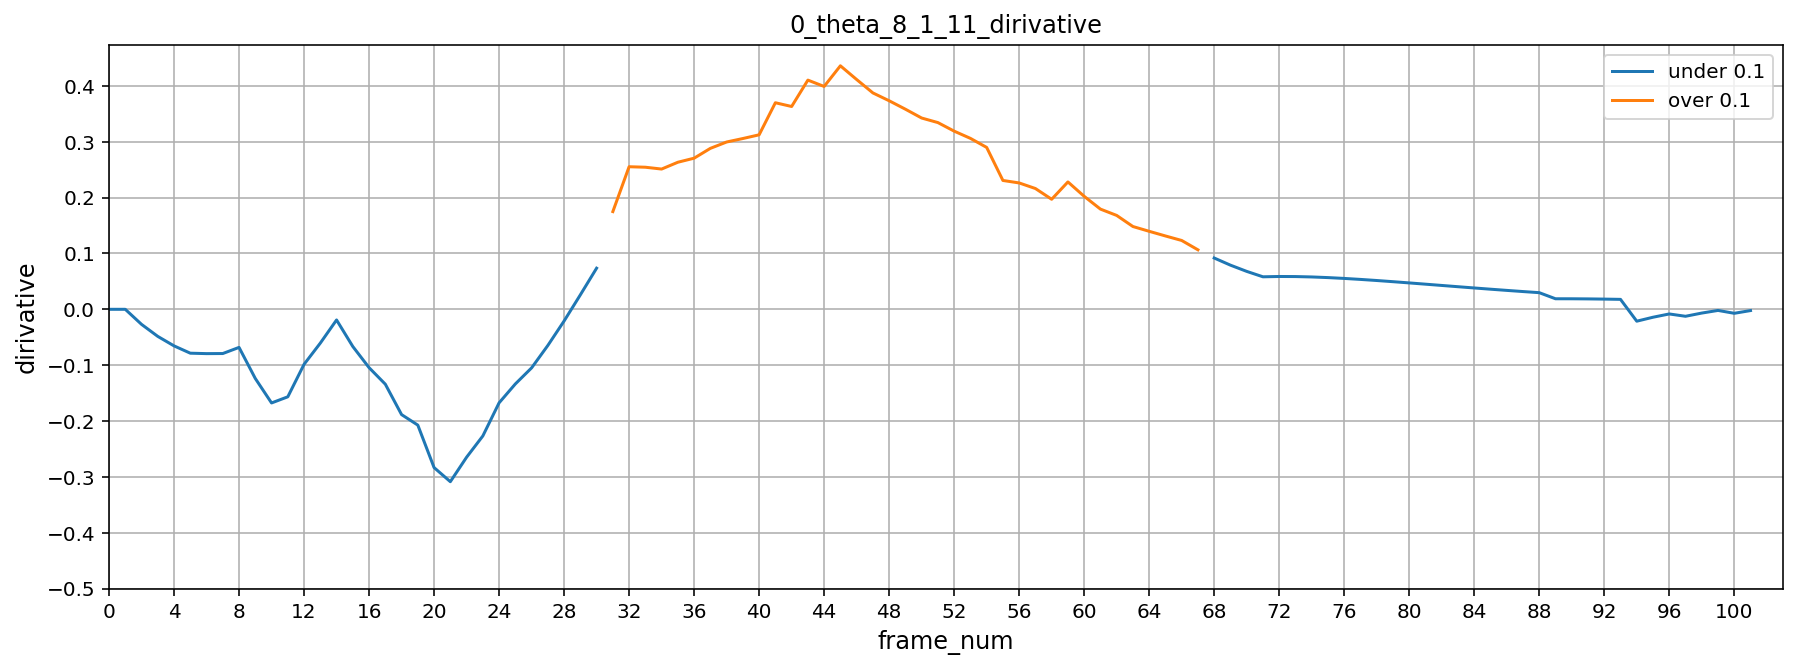

In [20]:
video_name = "stand_left_1"
key = '{}_result'.format(video_name)
utils.draw_curves(video_name, result_json[key], oriented=oriented, smooth_rate=0.1, threshold = 0.1)

stand_right_1

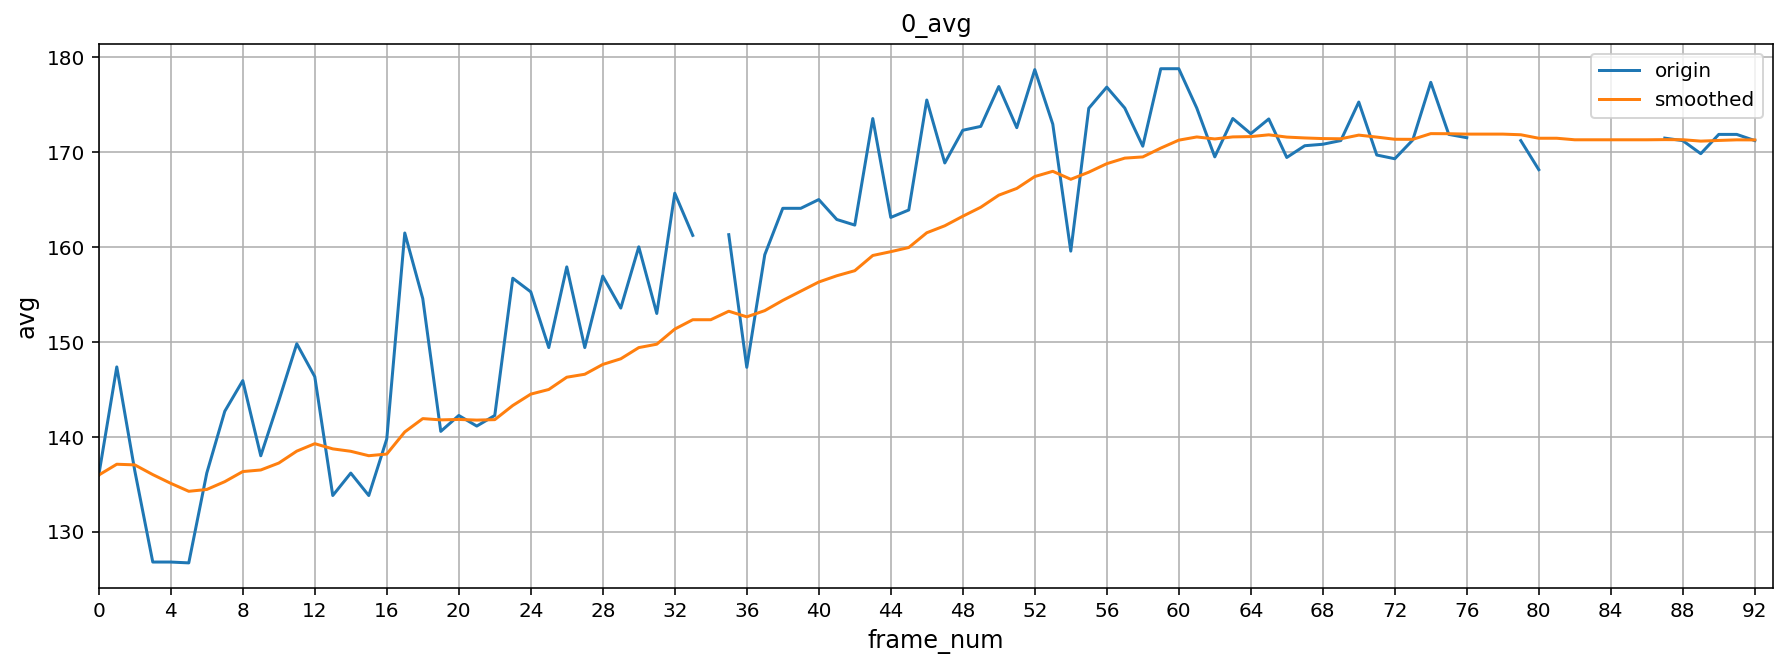

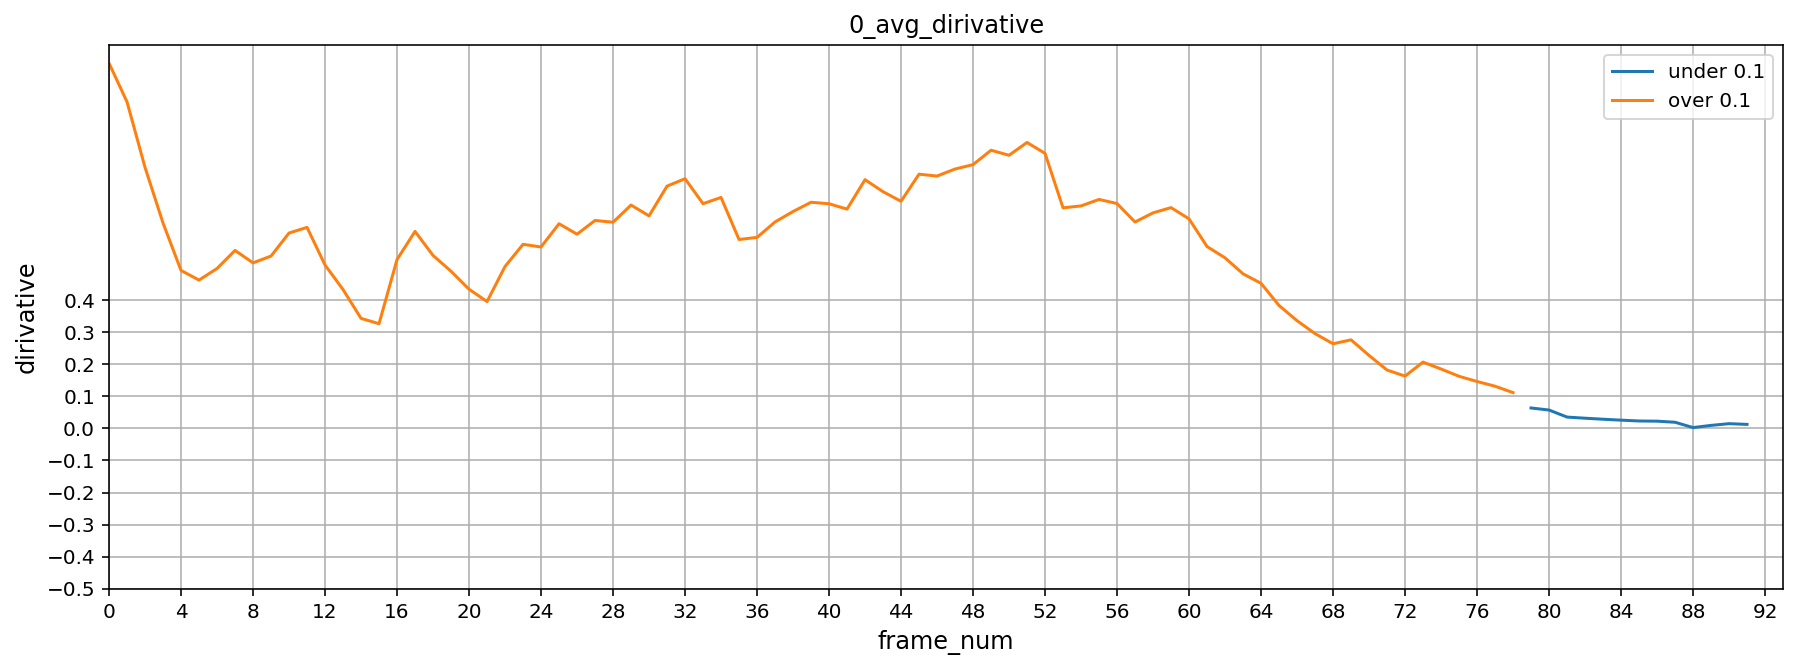

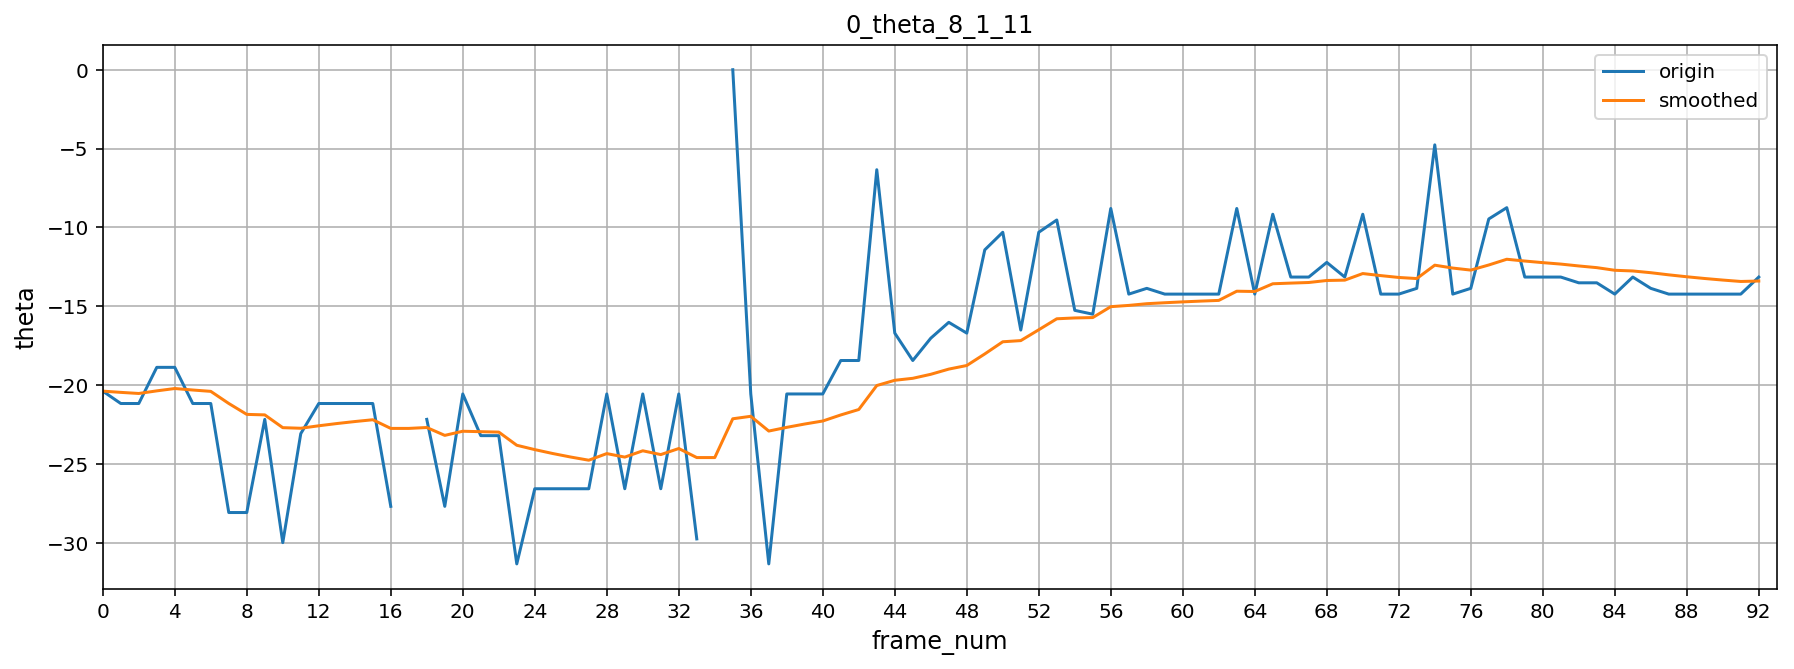

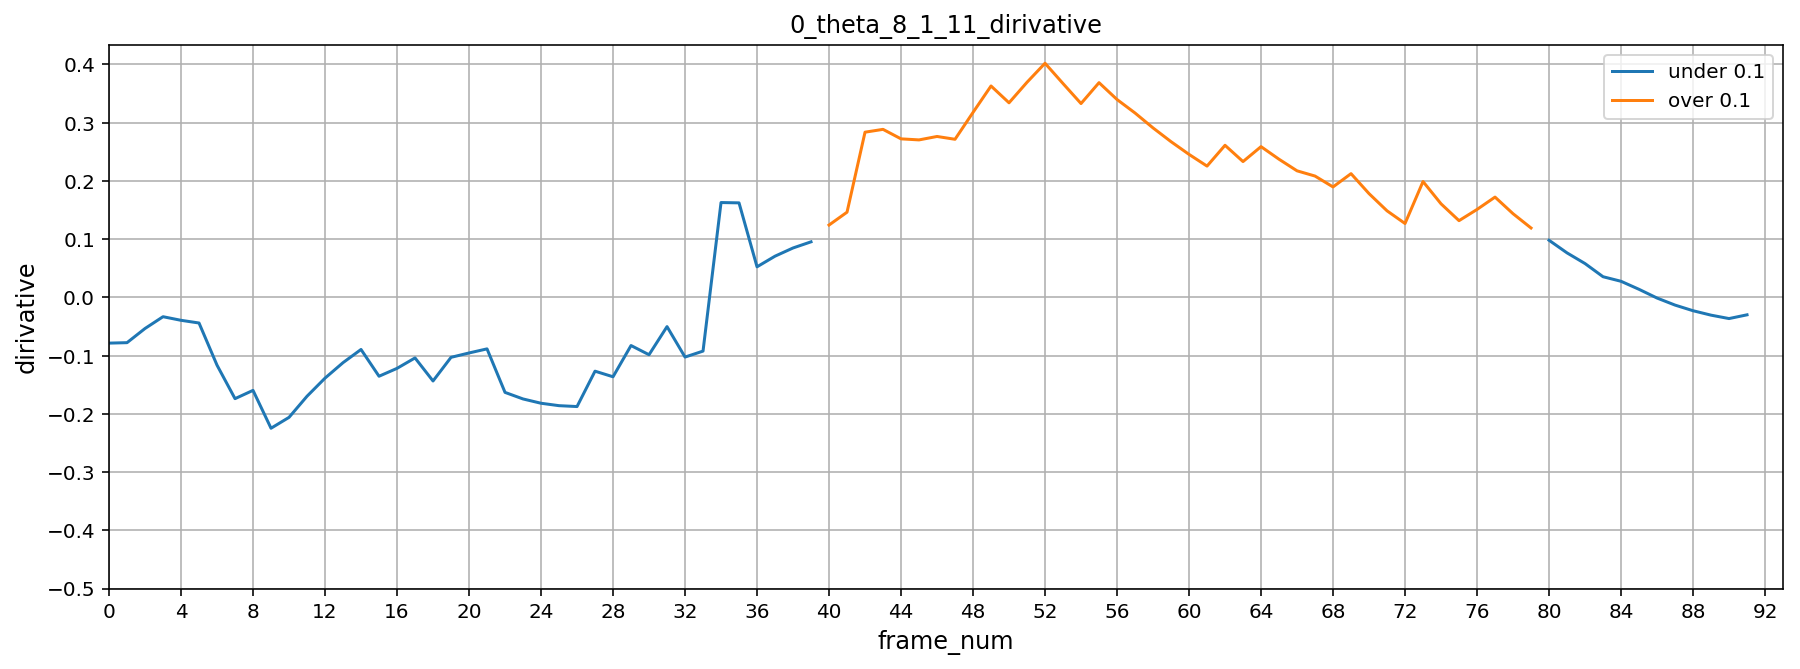

In [21]:
video_name = "stand_right_1"
key = '{}_result'.format(video_name)
utils.draw_curves(video_name, result_json[key], oriented=oriented, smooth_rate=0.1, threshold = 0.1)

#### draw figures of sit

sit_front_1

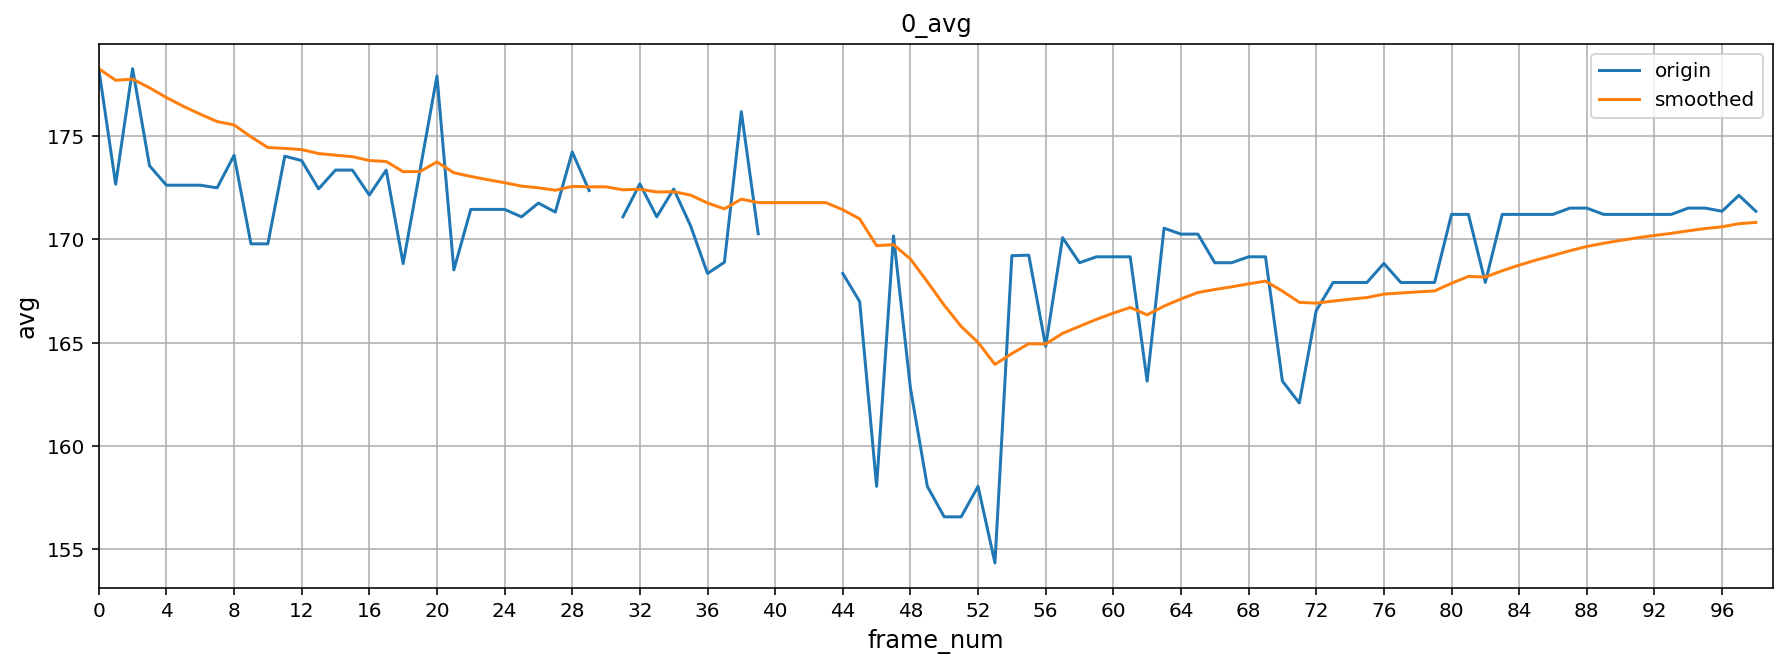

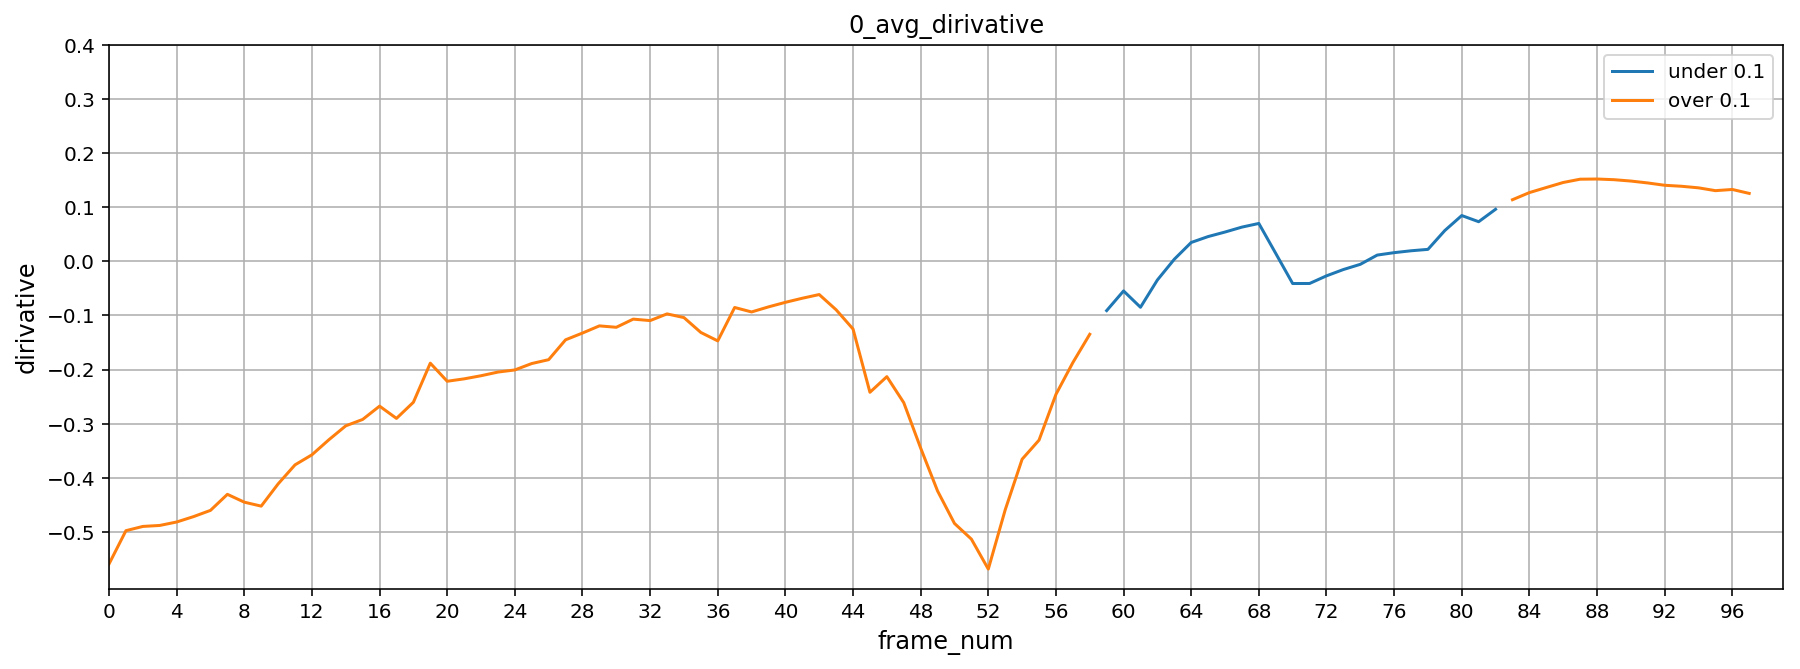

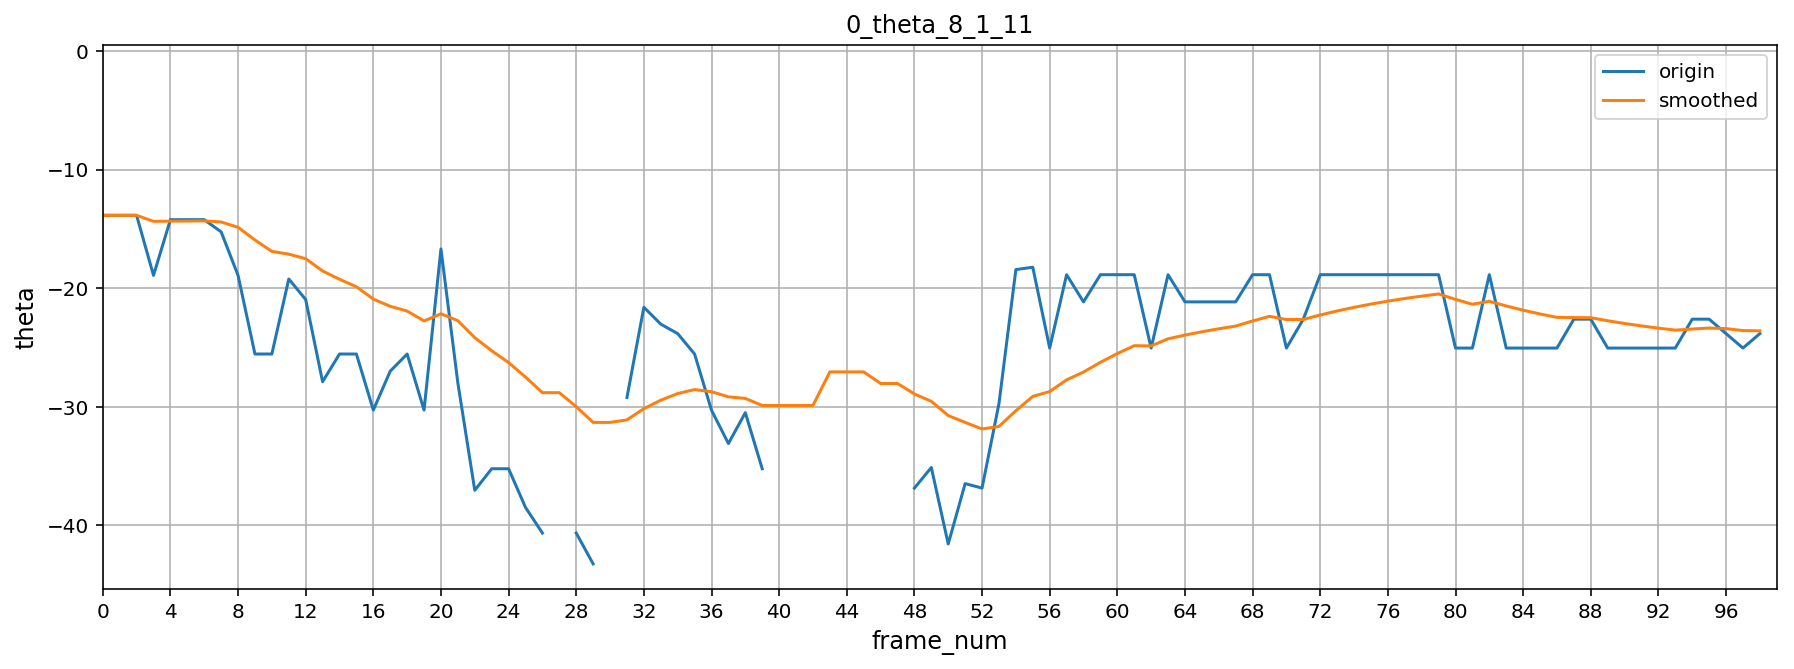

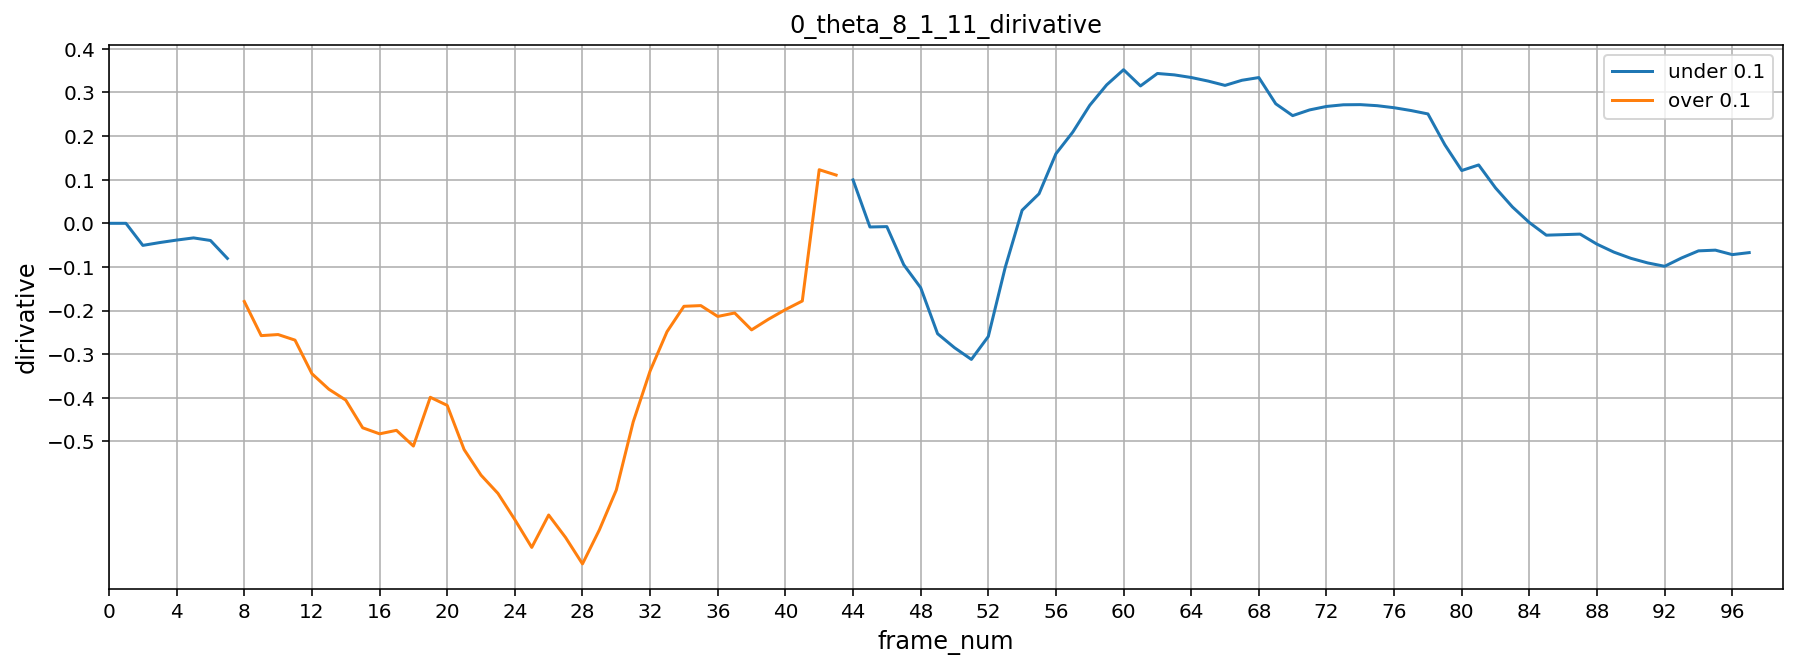

In [22]:
video_name = "sit_front_1"
key = '{}_result'.format(video_name)
utils.draw_curves(video_name, result_json[key], oriented=oriented, smooth_rate=0.1, threshold = 0.1)

sit_left_1

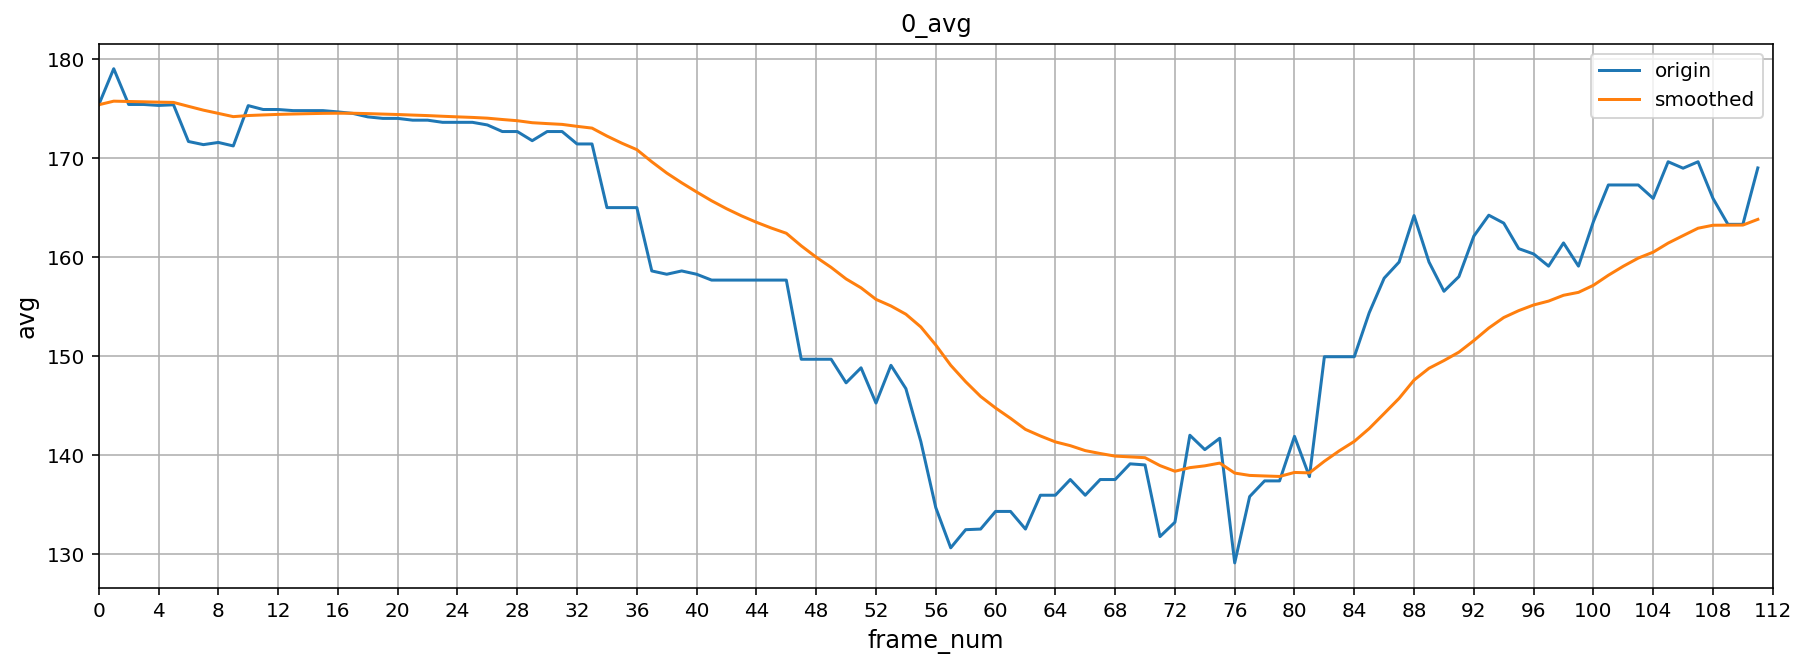

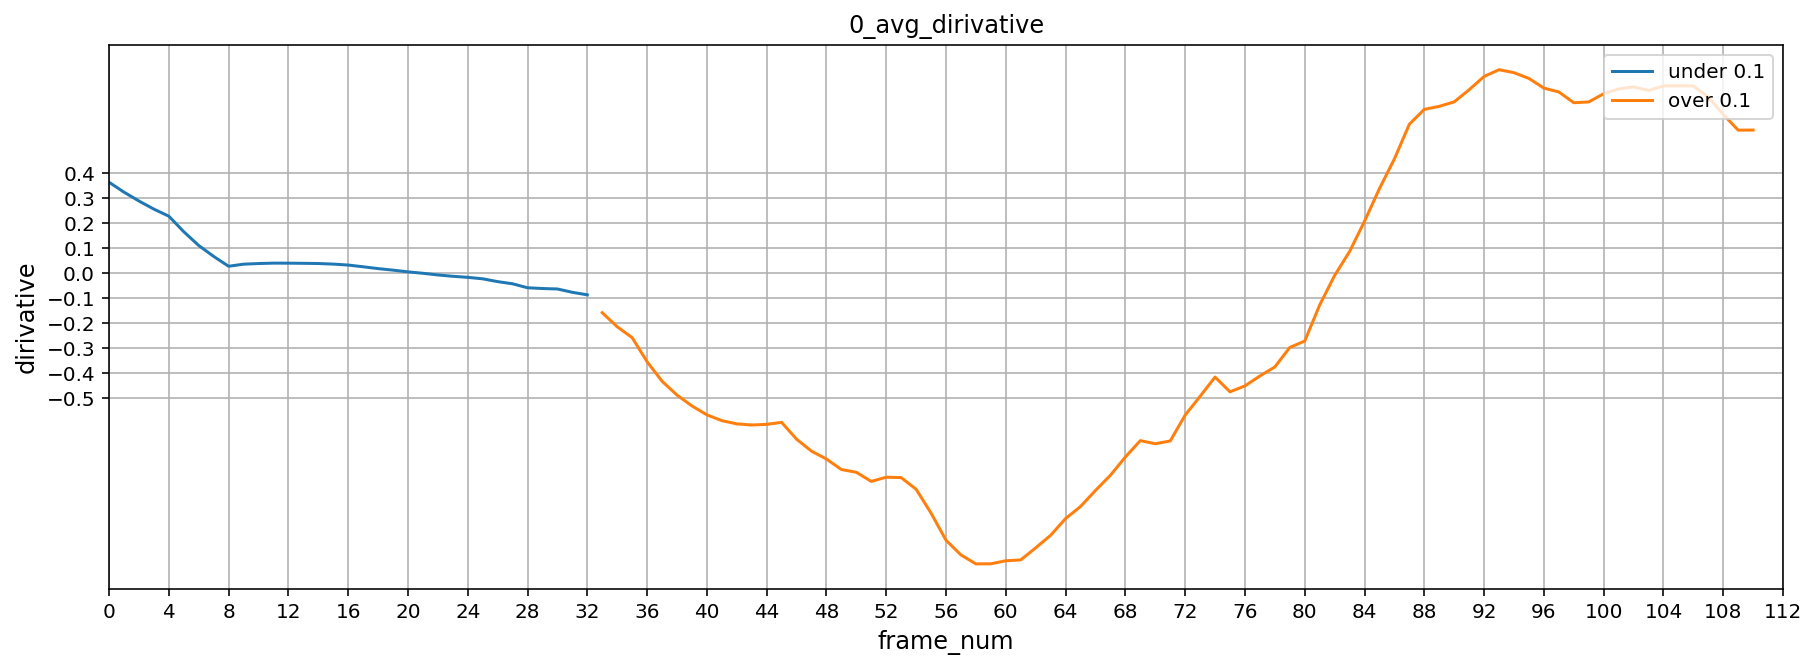

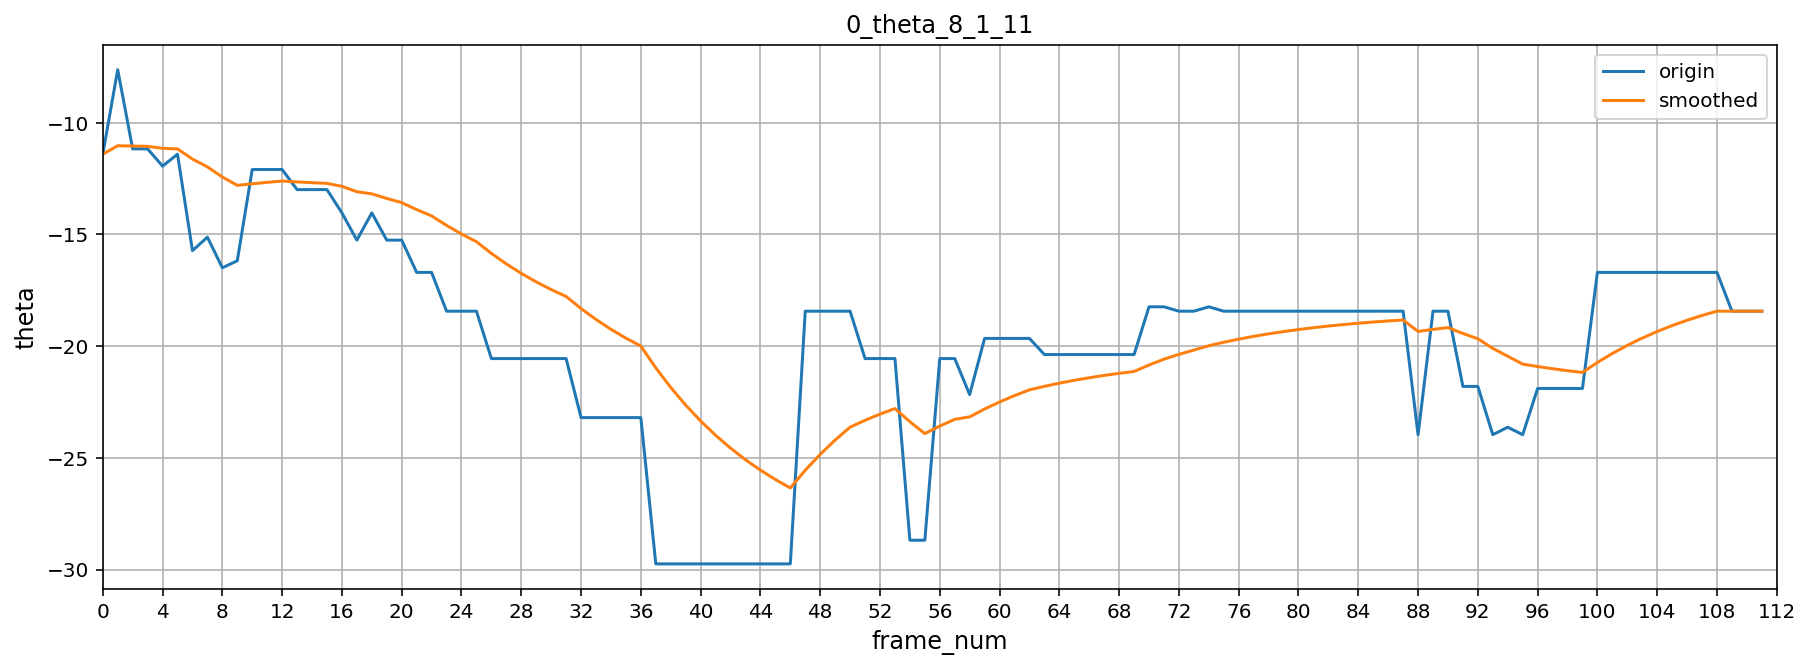

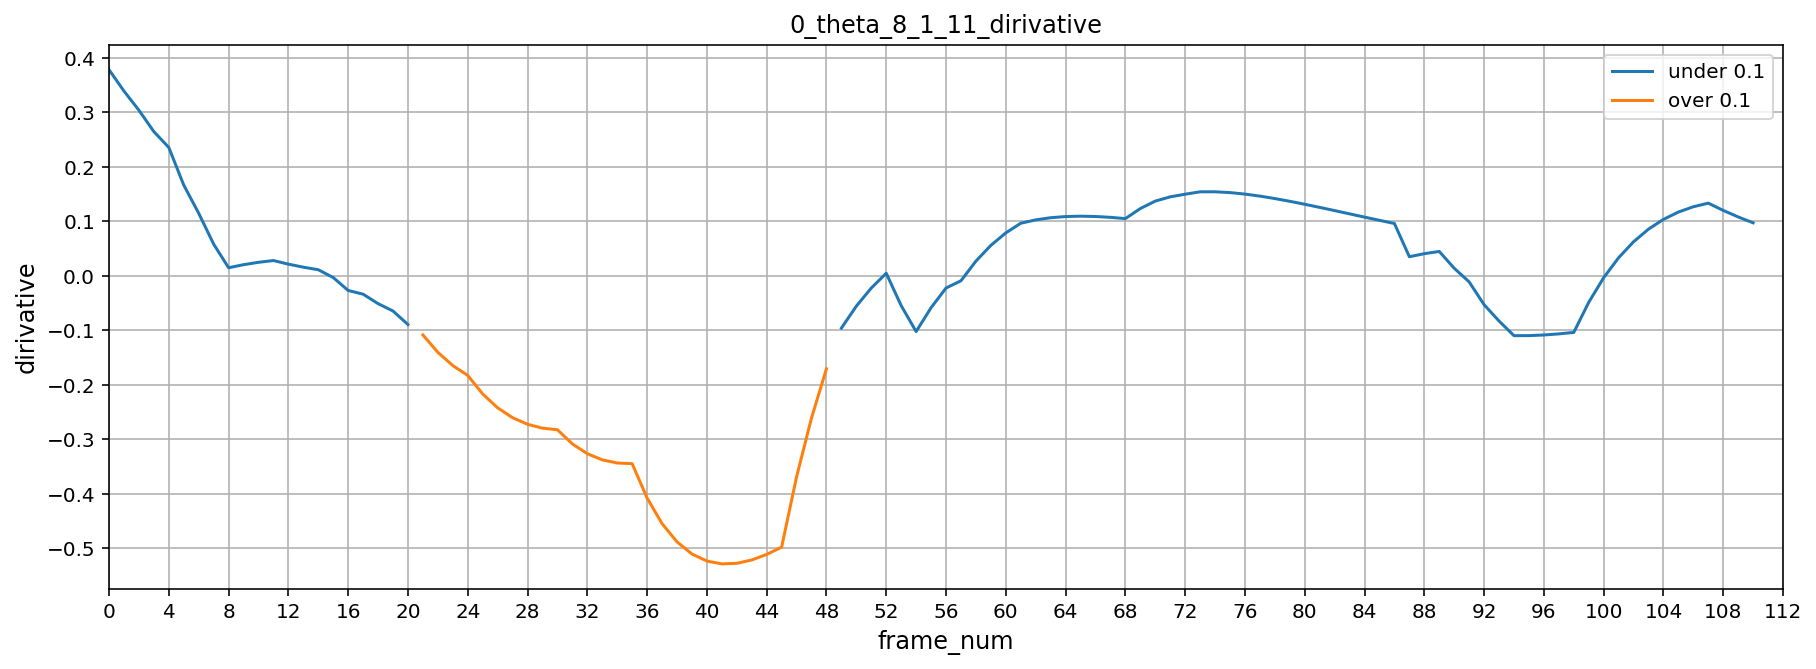

In [23]:
video_name = "sit_left_1"
key = '{}_result'.format(video_name)
utils.draw_curves(video_name, result_json[key], oriented=oriented, smooth_rate=0.1, threshold = 0.1)

sit_right_1

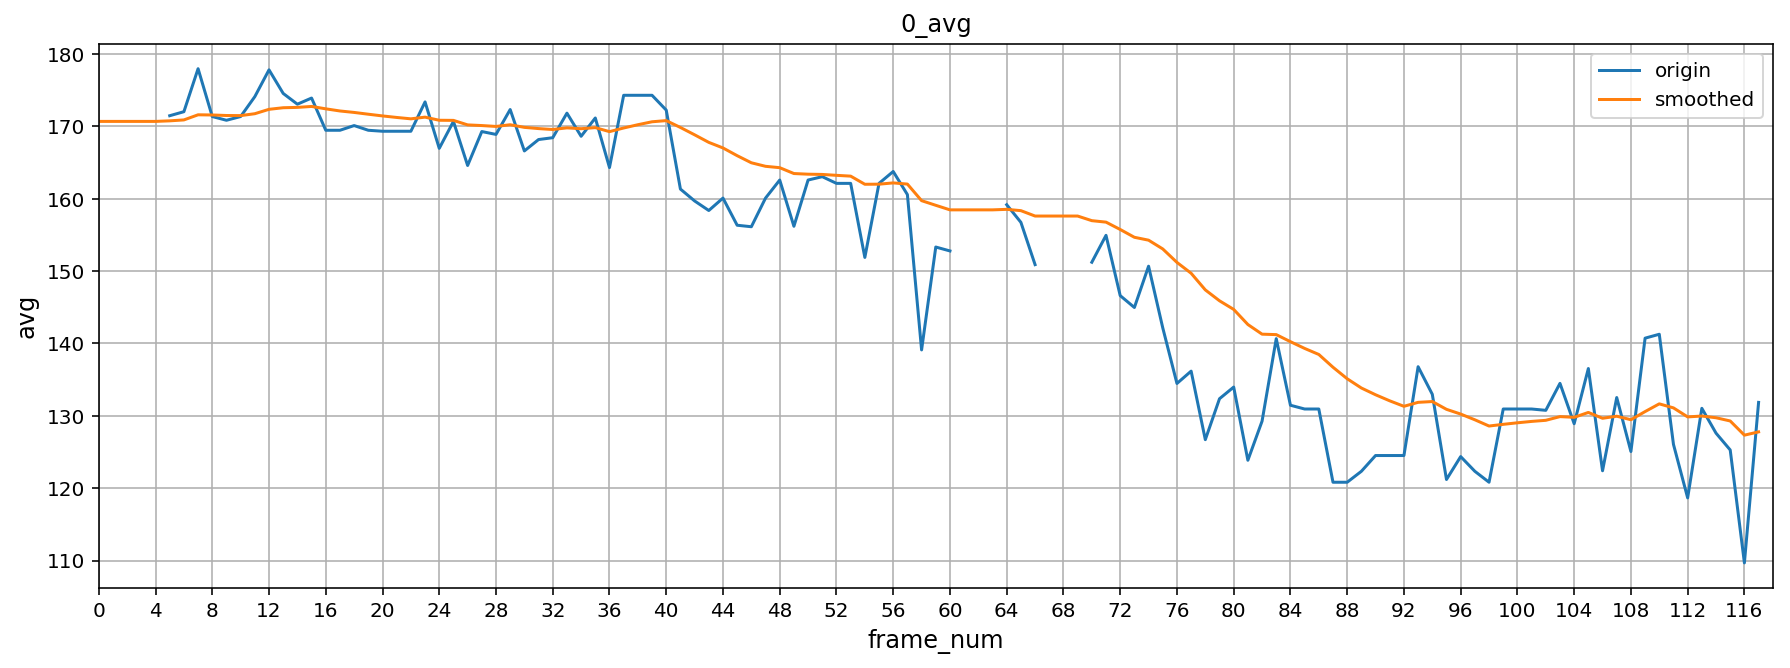

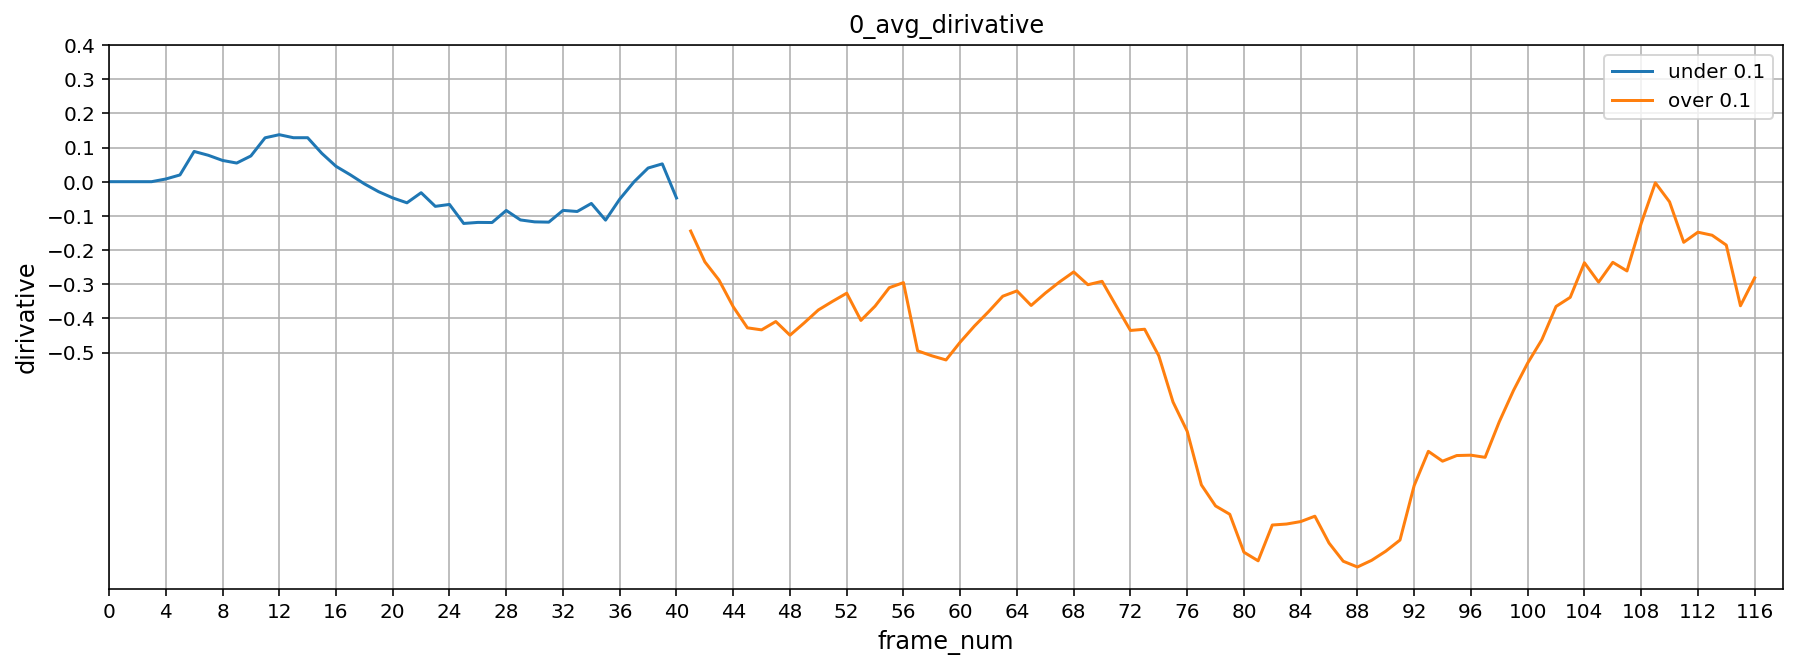

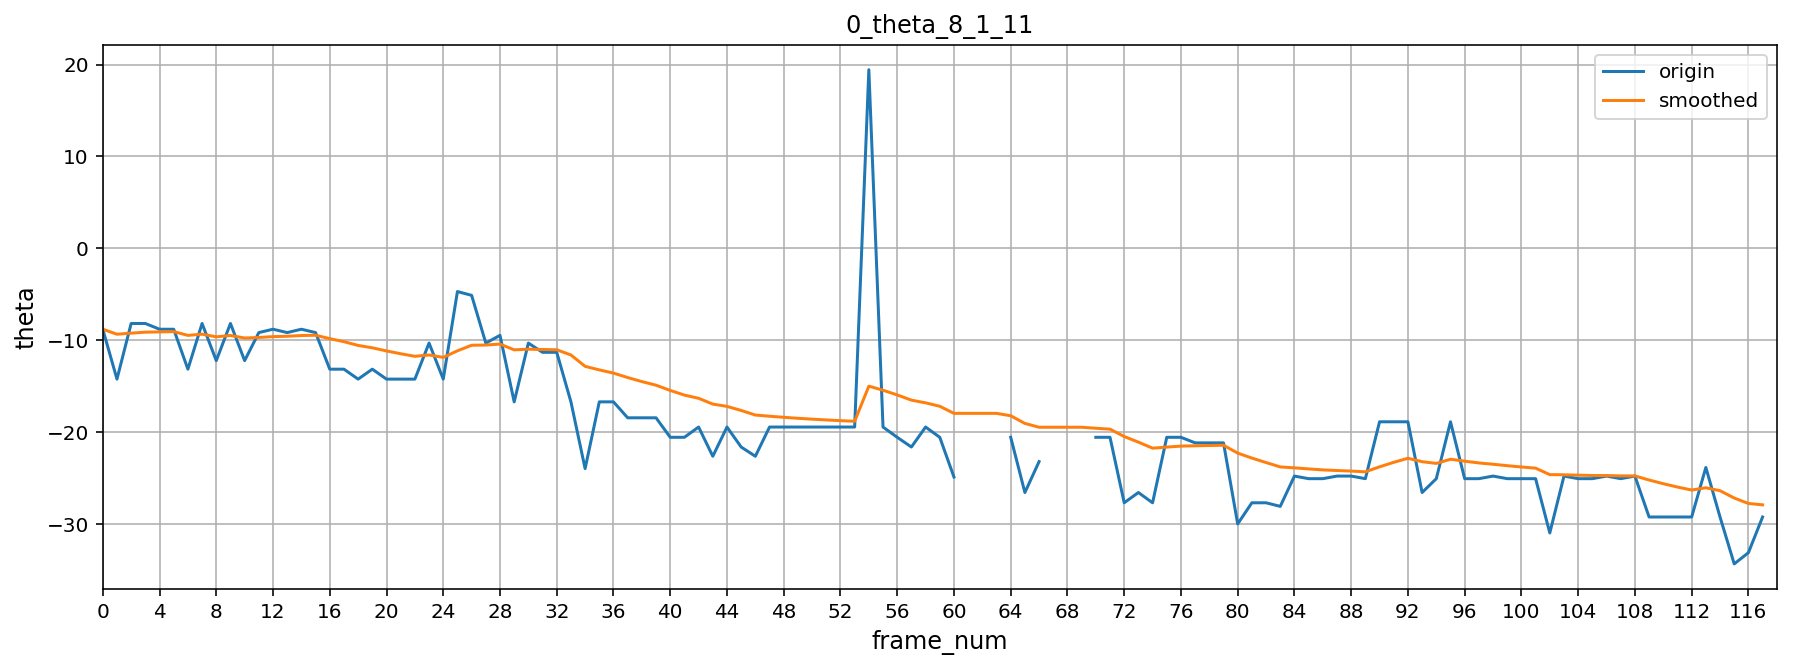

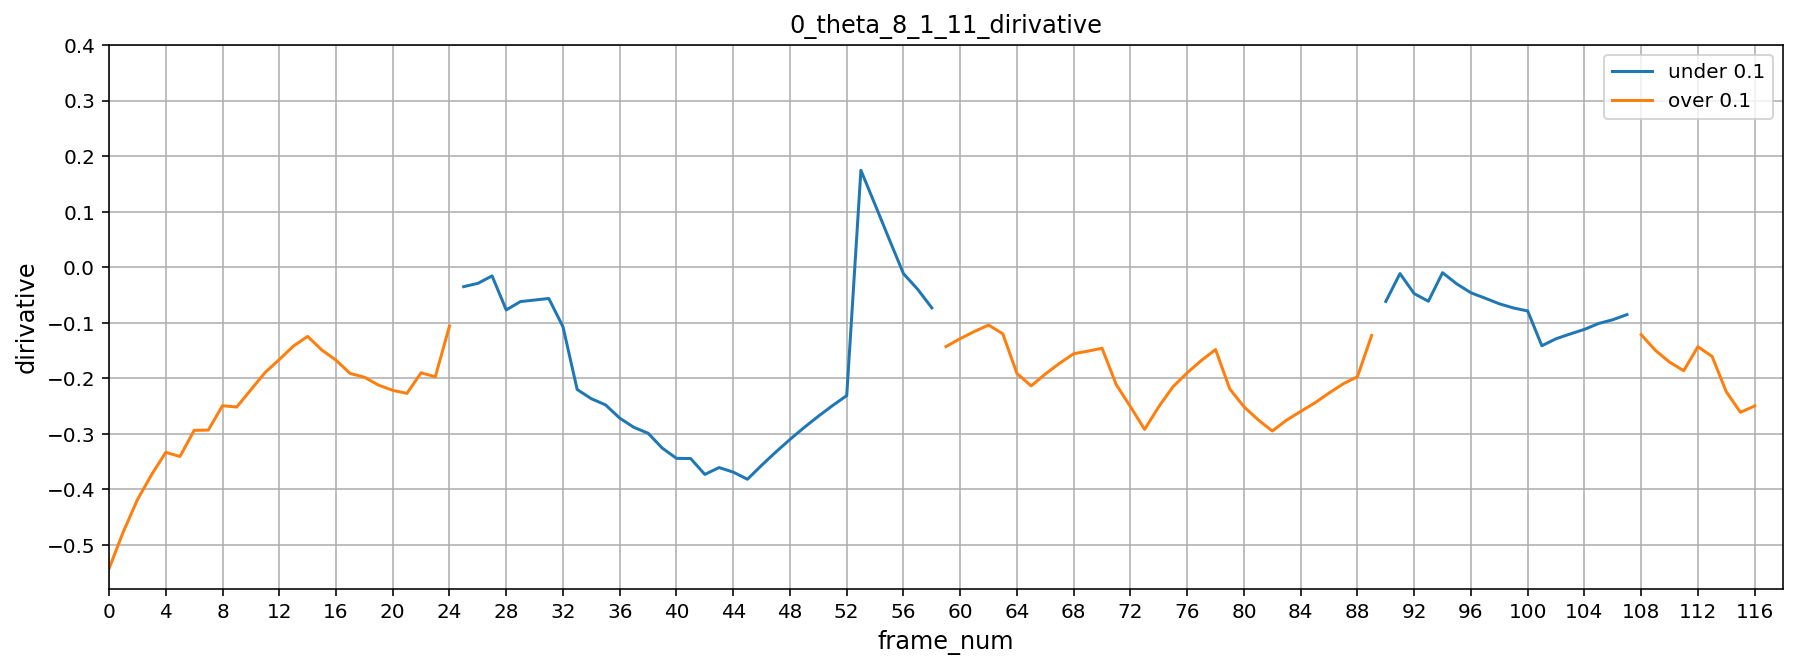

In [24]:
video_name = "sit_right_1"
key = '{}_result'.format(video_name)
utils.draw_curves(video_name, result_json[key], oriented=oriented, smooth_rate=0.1, threshold = 0.1)